<a href="https://colab.research.google.com/github/harmansingh25/Political-Bias-In-Hate-Speech/blob/main/BiLSTM_Pol_Bias_India_BeforeCNMidsem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install numpy
!pip install pickle
!pip install sys
!pip install sklearn
!pip install nltk
!pip install string
!pip install re
!pip install os
!pip install vanderSentiment
!pip install textstat
!pip install tweet_preprocess

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle
ERROR: Could not find a version that satisfies the requirement sys (from versions: none)
ERROR: No matching distribution found for sys
ERROR: Could not find a version that satisfies the requirement string (from versions: none)
ERROR: No matching distribution found for string
ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re
ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
ERROR: Could not find a version that satisfies the requirement vanderSentiment (from versions: none)
ERROR: No matching distribution found for vanderSentiment
     |████████████████████████████████| 101 kB 4.8 MB/s 
     |████████████████████████████████| 2.0 MB 53.5 MB/s 
ERROR: Could not find a version that satisf

In [ ]:
!pip install vaderSentiment
!pip install tweet-preprocessor
!pip install importlib


     |████████████████████████████████| 125 kB 5.5 MB/s 
  Created wheel for importlib: filename=importlib-1.0.4-py3-none-any.whl size=5874 sha256=6c2bf90b7b8b1f2cfaa8e0e6115d57897d3e6ec98d768c74d95847e5401d2514
  Stored in directory: /root/.cache/pip/wheels/86/e4/cb/62b0e9efd7da1e984baec0c0ded0b727a7ed25e1904ed51fca
Successfully built importlib


In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
import preprocessor as p


In [ ]:
import pandas as pd
import numpy as np
import pickle
import sys
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.stem.porter import *
import string
import re
import os
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as VS
from textstat.textstat import *
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

In [ ]:
import tensorflow as tf

from tensorflow import keras

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
import tensorflow.keras.backend as K

from sklearn.model_selection import KFold

import gc

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
from collections import Counter

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
dfr1 = pd.read_csv("/content/drive/MyDrive/BTP/Indian_pol_stance - India_pol_stance.csv")

In [ ]:
dfr1.head()

,S.No. in CSV,text,pol_stance,Hate/Non-hate/Offesnive,Sub-category,Point # from taxonomy
0,5485,Dear PM \n@narendramodi\nOpposition is against...,1,Non-hate,NaN,NaN
1,5492,#ISupportCAA_NRC\n#IsupportCAA\nJust for the t...,6,Non-hate,NaN,NaN
2,5535,Dear PM @narendramodi\n\nOpposition is against...,1,Non-hate,NaN,NaN
3,5536,Dear PM @narendramodi\n\nOpposition is against...,1,Non-hate,NaN,NaN
4,5567,#thankuamitsah\n#ISupportCAA_NRC\n#JamiaMillia...,1,Non-hate,NaN,NaN


In [ ]:
tweets = dfr1['text'].tolist()


In [ ]:
labels_data = dfr1['Hate/Non-hate/Offesnive'].tolist()

In [ ]:
pol_stance = dfr1['pol_stance'].tolist()

In [ ]:
labels = []
 
for i in labels_data:
  if(i=='Hate' or i=='Offensive'):
    labels.append(1)
  else:
    labels.append(0)

In [ ]:
data = pd.DataFrame()

In [ ]:
data['label'] = labels
data['tweet'] = tweets
data['stance'] = pol_stance

In [ ]:
data.head()

,label,tweet,stance
0,0,Dear PM \n@narendramodi\nOpposition is against...,1
1,0,#ISupportCAA_NRC\n#IsupportCAA\nJust for the t...,6
2,0,Dear PM @narendramodi\n\nOpposition is against...,1
3,0,Dear PM @narendramodi\n\nOpposition is against...,1
4,0,#thankuamitsah\n#ISupportCAA_NRC\n#JamiaMillia...,1


In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
def clean_text(text):
  delete_dict = {sp_character: '' for sp_character in string.punctuation}
  delete_dict[' '] = ' '
  table = str.maketrans(delete_dict)
  text1 = text.translate(table)
  textArr = text1.split()
  text2 = ' '.join([w for w in textArr if (not w.isdigit() and (not w.isdigit() and len(w)>3))])
  return text2.lower()

In [ ]:
#Preprocessing dataset
data['tweet'] = data['tweet'].apply(remove_emoji)
data['tweet'] = data['tweet'].apply(clean_text)
data['Num_words_text'] = data['tweet'].apply(lambda x: len(str(x).split()))

In [ ]:
#Getting stance wise dataframes
data_0 = data.loc[data['stance'] == 0]
data_1 = data.loc[data['stance'] == 1]
data_2 = data.loc[data['stance'] == 2]
data_3 = data.loc[data['stance'] == 3]
data_4 = data.loc[data['stance'] == 4]
data_5 = data.loc[data['stance'] == 5]
data_6 = data.loc[data['stance'] == 6]

In [ ]:
data_0_train, data_0_test = train_test_split(data_0, test_size = 0.2, stratify = data_0['label'].tolist(), random_state = 0)

In [ ]:
data_1_train, data_1_test = train_test_split(data_1, test_size = 0.2, stratify = data_1['label'].tolist(), random_state = 0)

In [ ]:
data_2_train, data_2_test = train_test_split(data_2, test_size = 0.2, stratify = data_2['label'].tolist(), random_state = 0)

In [ ]:
data_3_train, data_3_test = train_test_split(data_3, test_size = 0.2, stratify = data_3['label'].tolist(), random_state = 0)

In [ ]:
data_4_train, data_4_test = train_test_split(data_4, test_size = 0.2, stratify = data_4['label'].tolist(), random_state = 0)

In [ ]:
data_5_train, data_5_test = train_test_split(data_5, test_size = 0.2, stratify = data_5['label'].tolist(), random_state = 0)

In [ ]:
data_6_train, data_6_test = train_test_split(data_6, test_size = 0.2, stratify = data_6['label'].tolist(), random_state = 0)

In [ ]:
#BASE TRAINING MODEL
frames_train = [data_0_train,data_1_train,data_2_train,data_3_train,data_4_train,data_5_train,data_6_train]
train_base = pd.concat(frames_train)

In [ ]:
#BASE TESTING MODEL
frames_test = [data_0_test,data_1_test,data_2_test,data_3_test,data_4_test,data_5_test,data_6_test]
test_base = pd.concat(frames_test)

In [ ]:
train_base = train_base.sample(frac = 1, random_state = 0)

In [ ]:
test_base = test_base.sample(frac = 1, random_state = 0)

In [ ]:
train_base.head()

,label,tweet,stance,Num_words_text
1405,1,deepikapadukone madam great solidarity with st...,6,25
3314,0,this fake twitterati only going vote every com...,5,26
4629,0,this last final call delhiets smooth landing c...,6,22
2953,0,leaders dont want waste there time debate agai...,1,25
4224,0,youth palam impressed with aaps focus educatio...,5,20


In [ ]:
test_base.head()

,label,tweet,stance,Num_words_text
2694,0,willing protests anyone that only means take a...,2,26
1844,0,list films that bhakts tried boycott padmavat ...,0,20
1276,0,kash twinclekhanna rahi sach hota students shu...,6,14
3580,0,interacted with opinion makers from hawkers au...,1,26
3529,0,vote definately always thought visiting yamuna...,1,23


In [ ]:
X_train = train_base['tweet'].tolist()
Y_train = train_base['label'].tolist()
X_test = test_base['tweet'].tolist()
Y_test = test_base['label'].tolist()

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
num_words = 50000
tokenizer = Tokenizer(num_words=num_words, oov_token ="unk")
tokenizer.fit_on_texts(X_train)

In [ ]:
x_train = np.array(tokenizer.texts_to_sequences(X_train))
x_test = np.array(tokenizer.texts_to_sequences(X_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [ ]:
maxlen = 70
x_train = pad_sequences(x_train, padding='post', maxlen = maxlen)
x_test = pad_sequences(x_test, padding='post', maxlen = maxlen)

In [ ]:
train_labels = np.asarray(Y_train)
test_labels = np.asarray(Y_test)

In [ ]:
#Tensorflow dataset
train_ds = tf.data.Dataset.from_tensor_slices((x_train, train_labels))
test_ds = tf.data.Dataset.from_tensor_slices((x_test, test_labels))

In [ ]:
max_features = 50000
model = tf.keras.Sequential()
model.add(keras.layers.Embedding(max_features+1, 50, mask_zero=True))
model.add(Bidirectional(LSTM(64)))
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['acc'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 50)          2500050   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              58880     
 l)                                                              
                                                                 
 dense (Dense)               (None, 16)                2064      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2,561,011
Trainable params: 2,561,011
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(type(train_ds))

<class 'tensorflow.python.data.ops.dataset_ops.TensorSliceDataset'>


In [ ]:
epochs = 15
model.fit(train_ds.shuffle(5000).batch(1024), epochs = epochs, verbose=1)

Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6839 - acc: 0.7702
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6454 - acc: 0.8388
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5758 - acc: 0.8388
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4572 - acc: 0.8388
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.4296 - acc: 0.8388
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3864 - acc: 0.8388
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.3641 - acc: 0.8388
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3302 - acc: 0.8390
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.2866 - acc: 0.8417
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.2406 - acc: 0.8562
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.1885 - acc: 0.8958
Epoch 1

In [ ]:
Y_pred_prob = model.predict(x_test)

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt


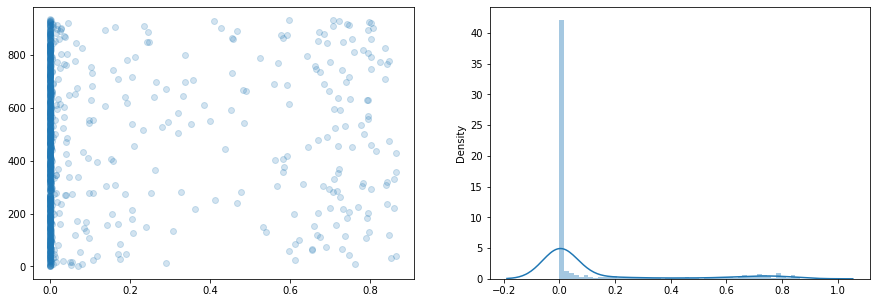

In [ ]:
f, (ax1, ax2) = plt.subplots(1,2,figsize = (15,5))
ax1.scatter(Y_pred_prob, range(0,len(Y_pred_prob)), alpha = 0.2)
ax2 = sns.distplot(Y_pred_prob) 

In [ ]:
import matplotlib as mp1

In [ ]:
import sklearn

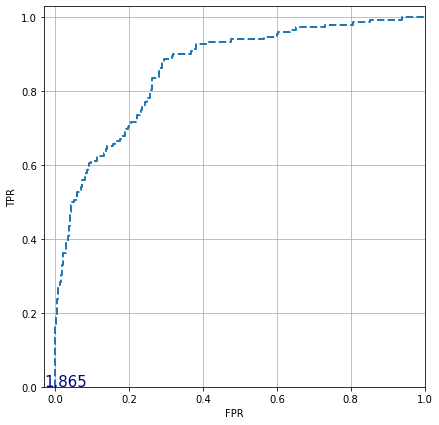

In [ ]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, thresholds = sklearn.metrics.roc_curve(labels, predictions)
  plt.plot(fp, tp, label = name, linewidth = 2, **kwargs)
  plt.xlabel("FPR")
  plt.ylabel("TPR")
  plt.xlim([-0.03, 1.0])
  plt.ylim([0.0, 1.03])
  plt.grid(True)
  thresholdsLength = len(thresholds)
  thresholds_every = 1000
  colorMap = plt.get_cmap('jet', thresholdsLength)
  for i in range(0, thresholdsLength, thresholds_every):
    threshold_value_with_max_four_decimals = str(thresholds[i])[:5]
    plt.text(fp[i]-0.03, tp[i]+0.001,threshold_value_with_max_four_decimals, fontdict={'size':15}, color=colorMap(i/thresholdsLength) )
  ax = plt.gca()
  ax.set_aspect('equal')
mp1.rcParams['figure.figsize'] = (7,7)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plot_roc("valid_baseline", test_labels, Y_pred_prob, color=colors[0], linestyle = '--')



In [ ]:
from sklearn.metrics import classification_report

In [ ]:
test_data = test_base.copy()

In [ ]:
cutoff = 0.7
test_data['pred_sentiment'] = Y_pred_prob
test_data['pred_sentiment'] = np.where((test_data.pred_sentiment>=cutoff), 1 ,test_data.pred_sentiment)
test_data['pred_sentiment'] = np.where((test_data.pred_sentiment<cutoff),0,test_data.pred_sentiment)
labels = [0,1]
print(classification_report(test_data['label'].tolist(), test_data['pred_sentiment'].tolist(), labels = labels))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       785
           1       0.74      0.36      0.49       152

    accuracy                           0.88       937
   macro avg       0.82      0.67      0.71       937
weighted avg       0.86      0.88      0.86       937



In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(test_data['label'].tolist(), test_data['pred_sentiment'].tolist()))

0.8762006403415155


In [ ]:
test_data.head()

,label,tweet,stance,Num_words_text,pred_sentiment
2694,0,willing protests anyone that only means take a...,2,26,0.0
1844,0,list films that bhakts tried boycott padmavat ...,0,20,0.0
1276,0,kash twinclekhanna rahi sach hota students shu...,6,14,0.0
3580,0,interacted with opinion makers from hawkers au...,1,26,0.0
3529,0,vote definately always thought visiting yamuna...,1,23,0.0


In [ ]:
test_base.head()

,label,tweet,stance,Num_words_text
2694,0,willing protests anyone that only means take a...,2,26
1844,0,list films that bhakts tried boycott padmavat ...,0,20
1276,0,kash twinclekhanna rahi sach hota students shu...,6,14
3580,0,interacted with opinion makers from hawkers au...,1,26
3529,0,vote definately always thought visiting yamuna...,1,23


In [ ]:
def stance_accuracy_score(stance, test):
  y_pred = 0
  y_tot = 0
  for index, row in test.iterrows():
    if(row['stance']==stance):
      if((row['label']==0 and row['pred_sentiment']==0) or (row['label']==1 and row['pred_sentiment']==1)):
        y_pred+=1
      y_tot+=1  

  return y_pred/y_tot


In [ ]:
stance = [0,1,2,3,4,5,6]
acc_stance = []
for i in stance:
  print(f"{i}: acc={stance_accuracy_score(i, test_data)}")
  acc_stance.append(stance_accuracy_score(i, test_data))

0: acc=0.8582677165354331
1: acc=0.91015625
2: acc=0.7843137254901961
3: acc=0.6
4: acc=0.9016393442622951
5: acc=0.9801980198019802
6: acc=0.8392857142857143


In [ ]:
from sklearn.metrics import f1_score

In [ ]:
test_data['label'].tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
def stance_f1_score(stance, test):
  Y_true = []

 

  Y_pred = []
  for index, row in test.iterrows():
    if(row['stance']==stance):
      Y_pred.append(row['pred_sentiment'])
      Y_true.append(row['label'])
  return sklearn.metrics.f1_score(Y_true, Y_pred)  


In [ ]:
f1_stance = []
for i in stance:
  print(f"{i}: f1={stance_f1_score(i, test_data)}")
  f1_stance.append(stance_f1_score(i, test_data))

0: f1=0.4705882352941176
1: f1=0.6101694915254238
2: f1=0.15384615384615385
3: f1=0.0
4: f1=0.75
5: f1=0.5
6: f1=0.4


In [ ]:
dataf2 = {'Accuracy': acc_stance, 'f1-score': f1_stance
        }

In [ ]:
df_stat_2 = pd.DataFrame(dataf2, index =['Anti-BJP', 'Pro-BJP','Anti-Congress', 'Pro-Congress', 'Anti-AAP', 'Pro-AAP', 'Other'])

In [ ]:
df_stat_2

,Accuracy,f1-score
Anti-BJP,0.858268,0.470588
Pro-BJP,0.910156,0.610169
Anti-Congress,0.784314,0.153846
Pro-Congress,0.600000,0.000000
Anti-AAP,0.901639,0.750000
Pro-AAP,0.980198,0.500000
Other,0.839286,0.400000


# Analysis Party-wise

In [ ]:
def fit_and_pred(fraction, pol_stance_combine, rs):
  #Copying training data
  train_data = train_base.copy()
  test_data = test_base.copy()

  #Getting 2 sets of data (with and without pol_stance_combine)

  train_set_1 = train_data.loc[train_data['stance'].isin(pol_stance_combine)]
  
  train_set_2 = train_data.loc[~train_data['stance'].isin(pol_stance_combine)]

  #Fraction to add
  train_set_frac = train_set_1.sample(frac = fraction, random_state = rs)

  frames_analysis = [train_set_2, train_set_frac]

  #Concatenating
  train_final_analysis = pd.concat(frames_analysis)

  train_final_analysis = train_final_analysis.sample(frac = 1, random_state = 0)

  print("Shape", train_final_analysis.shape)

  #Model training

  X_train = train_final_analysis['tweet'].tolist()
  Y_train = train_final_analysis['label'].tolist()
  X_test = test_data['tweet'].tolist()
  Y_test = test_data['label'].tolist()

  num_words = 50000
  tokenizer = Tokenizer(num_words=num_words, oov_token ="unk")
  tokenizer.fit_on_texts(X_train)

  x_train = np.array(tokenizer.texts_to_sequences(X_train))
  x_test = np.array(tokenizer.texts_to_sequences(X_test))

  maxlen = 70
  x_train = pad_sequences(x_train, padding='post', maxlen = maxlen)
  x_test = pad_sequences(x_test, padding='post', maxlen = maxlen)

  train_labels = np.asarray(Y_train)
  test_labels = np.asarray(Y_test)

  #Tensorflow dataset
  train_ds = tf.data.Dataset.from_tensor_slices((x_train, train_labels))
  test_ds = tf.data.Dataset.from_tensor_slices((x_test, test_labels))

  max_features = 50000
  model = tf.keras.Sequential()
  model.add(keras.layers.Embedding(max_features+1, 50, mask_zero=True))
  model.add(Bidirectional(LSTM(64)))
  model.add(keras.layers.Dense(16, activation=tf.nn.relu))
  model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

  model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['acc'])
  epochs = 15
  model.fit(train_ds.shuffle(5000).batch(1024), epochs = epochs, verbose=1)


  #Predicting
  Y_pred_prob = model.predict(x_test)

  #Confusion matrices

  return Y_pred_prob


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
def pred_cutoff(cutoff, Y_pred_prob1):
  test_data1 = test_base.copy()
  test_data1['pred_sentiment'] = Y_pred_prob1
  test_data1['pred_sentiment'] = np.where((test_data1.pred_sentiment>=cutoff), 1 ,test_data1.pred_sentiment)
  test_data1['pred_sentiment'] = np.where((test_data1.pred_sentiment<cutoff),0,test_data1.pred_sentiment)
  labels = [0,1]
  print(classification_report(test_data1['label'].tolist(), test_data1['pred_sentiment'].tolist(), labels = labels))
  cm = confusion_matrix(test_data1['label'].tolist(), test_data1['pred_sentiment'].tolist())
  print("Conf matrix", cm)
  return test_data1

In [ ]:
def acc_array(test_data2):
  stance = [0,1,2,3,4,5,6]
  acc_stance = []
  for i in stance:
    print(f"{i}: acc={stance_accuracy_score(i, test_data2)}")
    acc_stance.append(stance_accuracy_score(i, test_data2))
  return acc_stance  

In [ ]:
def f1_array(test_data2):
  stance = [0,1,2,3,4,5,6]
  f1_stance = []
  for i in stance:
    print(f"{i}: f1={stance_f1_score(i, test_data2)}")
    f1_stance.append(stance_f1_score(i, test_data2))
  return f1_stance

In [ ]:
def get_dataF(acc_arr, f1_arr):
  dataf2 = {'Accuracy': acc_arr, 'f1-score': f1_arr}
  df_stat_2 = pd.DataFrame(dataf2, index =['Anti-BJP', 'Pro-BJP','Anti-Congress', 'Pro-Congress', 'Anti-AAP', 'Pro-AAP', 'Other'])
  return df_stat_2


In [ ]:
def get_dataF_party(acc_arr, f1_arr):
  dataf2 = {'Accuracy': acc_arr, 'f1-score': f1_arr}
  df_stat_2 = pd.DataFrame(dataf2, index =['BJP', 'Congress', 'AAP', 'Other'])
  return df_stat_2


In [ ]:
def party_accuracy_score(party, test):
  y_pred = 0
  y_tot = 0
  for index, row in test.iterrows():
    if(row['stance'] in party):
      if((row['label']==0 and row['pred_sentiment']==0) or (row['label']==1 and row['pred_sentiment']==1)):
        y_pred+=1
      y_tot+=1  

  return y_pred/y_tot

In [ ]:
def party_f1_score(party, test):
  Y_true = []
  Y_pred = []
  for index, row in test.iterrows():
    if(row['stance'] in party):
      Y_pred.append(row['pred_sentiment'])
      Y_true.append(row['label'])
  return sklearn.metrics.f1_score(Y_true, Y_pred)  


In [ ]:
def acc_array_party(test_data3, party_array):
#  [[0,1], [2,3], [4,5], 6]
  acc_stance = []
  for i in party_array:
   
    acc_stance.append(party_accuracy_score(i, test_data3))
  return acc_stance  

In [ ]:
def f1_array_party(test_data3, party_array):
#  [[0,1], [2,3], [4,5], 6]

  f1_stance = []
  for i in party_array:
    f1_stance.append(party_f1_score(i, test_data3))
  return f1_stance
 

# BJP (Anti-BJP (0) + Pro-BJP(1))

In [ ]:
def plot_analysis_india_party_acc(dfs):
  acc_dfs = []
  f1_dfs = []


  BJP_acc = []
  Cong_acc = []
  AAP_acc = []
  other_acc = []

  BJP_f1 = []
  Cong_f1 = []
  AAP_f1 = []
  other_f1 = []

  for df in dfs:
    acc_dfs.append(list(df['Accuracy']))
    f1_dfs.append(list(df['f1-score']))

  
  for acc_list in acc_dfs:
    BJP_acc.append(acc_list[0])

  for acc_list in acc_dfs:
    Cong_acc.append(acc_list[1])

  for acc_list in acc_dfs:
    AAP_acc.append(acc_list[2])

  for acc_list in acc_dfs:
    other_acc.append(acc_list[3])

  

  for f1_list in f1_dfs:
    BJP_f1.append(f1_list[0])

  for f1_list in f1_dfs:
    Cong_f1.append(f1_list[1])

  for f1_list in f1_dfs:
    AAP_f1.append(f1_list[2])

  for f1_list in f1_dfs:
    other_f1.append(f1_list[3])

  x = [0.0, 0.2, 0.4, 0.6, 0.8]

  plt.title("Accuracy")
  plt.plot(x, BJP_acc, label = "BJP")
  plt.xlabel("% training data")
  plt.ylabel("Accuracy")
  plt.plot(x, Cong_acc, label = "Congress")
  plt.plot(x, AAP_acc, label = "AAP")
  plt.plot(x, other_acc, label = "Other")
  plt.legend()
  plt.show()


In [ ]:
def plot_analysis_india_party_f1(dfs):
  acc_dfs = []
  f1_dfs = []


  BJP_acc = []
  Cong_acc = []
  AAP_acc = []
  other_acc = []

  BJP_f1 = []
  Cong_f1 = []
  AAP_f1 = []
  other_f1 = []

  for df in dfs:
    acc_dfs.append(list(df['Accuracy']))
    f1_dfs.append(list(df['f1-score']))

  
  for acc_list in acc_dfs:
    BJP_acc.append(acc_list[0])

  for acc_list in acc_dfs:
    Cong_acc.append(acc_list[1])

  for acc_list in acc_dfs:
    AAP_acc.append(acc_list[2])

  for acc_list in acc_dfs:
    other_acc.append(acc_list[3])

  

  for f1_list in f1_dfs:
    BJP_f1.append(f1_list[0])

  for f1_list in f1_dfs:
    Cong_f1.append(f1_list[1])

  for f1_list in f1_dfs:
    AAP_f1.append(f1_list[2])

  for f1_list in f1_dfs:
    other_f1.append(f1_list[3])

  x = [0.0, 0.2, 0.4, 0.6, 0.8]

  plt.title("f1-score")
  
  plt.plot(x, BJP_f1, label = "BJP")
  plt.plot(x, Cong_f1, label = "Congress")
  plt.plot(x, AAP_f1, label = "AAP")
  plt.plot(x, other_f1, label = "Other")
  plt.xlabel("% training data")
  plt.ylabel("f1-score")
  plt.legend()
  plt.show()


In [ ]:
def plot_analysis_india_stance_acc(dfs):
  acc_dfs = []
  f1_dfs = []


  anti_BJP_acc = []
  pro_BJP_acc = []
  anti_Cong_acc = []
  pro_Cong_acc = []
  anti_AAP_acc = []
  pro_AAP_acc = []
  other_acc = []

  anti_BJP_f1 = []
  pro_BJP_f1 = []
  anti_Cong_f1 = []
  pro_Cong_f1 = []
  anti_AAP_f1 = []
  pro_AAP_f1 = []
  other_f1 = []



  for df in dfs:
    acc_dfs.append(list(df['Accuracy']))
    f1_dfs.append(list(df['f1-score']))

  
  for acc_list in acc_dfs:
    anti_BJP_acc.append(acc_list[0])

  for acc_list in acc_dfs:
    pro_BJP_acc.append(acc_list[1])

  for acc_list in acc_dfs:
    anti_Cong_acc.append(acc_list[2])

  for acc_list in acc_dfs:
    pro_Cong_acc.append(acc_list[3])

  for acc_list in acc_dfs:
    anti_AAP_acc.append(acc_list[4])

  for acc_list in acc_dfs:
    pro_AAP_acc.append(acc_list[5])

  for acc_list in acc_dfs:
    other_acc.append(acc_list[6])




  for f1_list in f1_dfs:
    anti_BJP_f1.append(f1_list[0])

  for acc_list in acc_dfs:
    pro_BJP_f1.append(f1_list[1])

  for acc_list in acc_dfs:
    anti_Cong_f1.append(f1_list[2])

  for acc_list in acc_dfs:
    pro_Cong_f1.append(f1_list[3])

  for acc_list in acc_dfs:
    anti_AAP_f1.append(f1_list[4])

  for acc_list in acc_dfs:
    pro_AAP_f1.append(f1_list[5])

  for acc_list in acc_dfs:
    other_f1.append(f1_list[6])

  
  x = [0.0, 0.2, 0.4, 0.6, 0.8]
  plt.title("Accuracy")
  plt.plot(x, anti_BJP_acc, label = "Anti-BJP")
  plt.xlabel("% training data")
  plt.ylabel("Accuracy")
  plt.plot(x, pro_BJP_acc, label = "Pro-BJP")
  plt.plot(x, anti_Cong_acc, label = "Anti-Congress")
  plt.plot(x, pro_Cong_acc, label = "Pro-Congress")
  plt.plot(x, anti_AAP_acc, label = "Anti-AAP")
  plt.plot(x, pro_AAP_acc, label = "Pro-AAP")
  plt.plot(x, other_acc, label = "Other")
  plt.legend()
  plt.show()


In [ ]:
def plot_analysis_india_stance_f1(dfs):
  acc_dfs = []
  f1_dfs = []


  anti_BJP_acc = []
  pro_BJP_acc = []
  anti_Cong_acc = []
  pro_Cong_acc = []
  anti_AAP_acc = []
  pro_AAP_acc = []
  other_acc = []

  anti_BJP_f1 = []
  pro_BJP_f1 = []
  anti_Cong_f1 = []
  pro_Cong_f1 = []
  anti_AAP_f1 = []
  pro_AAP_f1 = []
  other_f1 = []



  for df in dfs:
    acc_dfs.append(list(df['Accuracy']))
    f1_dfs.append(list(df['f1-score']))

  
  for acc_list in acc_dfs:
    anti_BJP_acc.append(acc_list[0])

  for acc_list in acc_dfs:
    pro_BJP_acc.append(acc_list[1])

  for acc_list in acc_dfs:
    anti_Cong_acc.append(acc_list[2])

  for acc_list in acc_dfs:
    pro_Cong_acc.append(acc_list[3])

  for acc_list in acc_dfs:
    anti_AAP_acc.append(acc_list[4])

  for acc_list in acc_dfs:
    pro_AAP_acc.append(acc_list[5])

  for acc_list in acc_dfs:
    other_acc.append(acc_list[6])




  for f1_list in f1_dfs:
    anti_BJP_f1.append(f1_list[0])

  for acc_list in acc_dfs:
    pro_BJP_f1.append(f1_list[1])

  for acc_list in acc_dfs:
    anti_Cong_f1.append(f1_list[2])

  for acc_list in acc_dfs:
    pro_Cong_f1.append(f1_list[3])

  for acc_list in acc_dfs:
    anti_AAP_f1.append(f1_list[4])

  for acc_list in acc_dfs:
    pro_AAP_f1.append(f1_list[5])

  for acc_list in acc_dfs:
    other_f1.append(f1_list[6])

  

  plt.title("f1-score")
  x = [0.0, 0.2, 0.4, 0.6, 0.8]
  plt.plot(x, anti_BJP_f1, label = "Anti-BJP")
  plt.xlabel("% training data")
  plt.ylabel("Accuracy")
  plt.plot(x, pro_BJP_f1, label = "Pro-BJP")
  plt.plot(x, anti_Cong_f1, label = "Anti-Congress")
  plt.plot(x, pro_Cong_f1, label = "Pro-Congress")
  plt.plot(x, anti_AAP_f1, label = "Anti-AAP")
  plt.plot(x, pro_AAP_f1, label = "Pro-AAP")
  plt.plot(x, other_f1, label = "Other")
  plt.legend()
  plt.show()


In [ ]:
def avg_arr(acc_arr):
  avgArr = []
  for i in range(len(acc_arr[0])):
    sum = 0
    for j in acc_arr:
      sum+=j[i]
    avgArr.append(sum/len(acc_arr)) 
  return avgArr   


In [ ]:
def analysis_dfs_party(pol_stance_array):
  dfs = []
  fractions = [0.0, 0.2, 0.4, 0.6, 0.8]

  
  for frac in fractions:
    avg_acc = []
    avg_f1 = []
    for k in range(0,5):
      Y_pred = fit_and_pred(frac, pol_stance_array,k)
      test  = pred_cutoff(0.7, Y_pred)
      t_acc = acc_array_party(test, [[0,1], [2,3],[4,5],[6]])
      t_f1 = f1_array_party(test, [[0,1], [2,3],[4,5],[6]])
      avg_acc.append(t_acc)
      avg_f1.append(t_f1)
      # print("k loop",avg_acc)
      # print(avg_f1)
    acc2 = avg_arr(avg_acc)
    # print("outside k loop",acc2)
    af12 = avg_arr(avg_f1)
    c_df = get_dataF_party(acc2, af12)
    dfs.append(c_df)
  return dfs  




In [ ]:
def analysis_dfs_stance(pol_stance_array):
  dfs = []
  fractions = [0.0, 0.2, 0.4, 0.6, 0.8]

  for frac in fractions:
    avg_acc = []
    avg_f1 = []
    for k in range(0,5):
      Y_pred = fit_and_pred(frac, pol_stance_array,k)
      test  = pred_cutoff(0.7, Y_pred)
      t_acc = acc_array(test)
      t_f1 = f1_array(test)
      avg_acc.append(t_acc)
      avg_f1.append(t_f1)
    acc2 = avg_arr(avg_acc)
    af12 = avg_arr(avg_f1)  
    c_df = get_dataF(t_acc, t_f1)
    dfs.append(c_df)
    
  return dfs 


In [ ]:
hiffmmafeadnmcsmccdm

In [ ]:
bjp_dfs = analysis_dfs_party([0,1])

Shape (2207, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 10s 730ms/step - loss: 0.6898 - acc: 0.6543
Epoch 2/15
3/3 [==============================] - 3s 734ms/step - loss: 0.6647 - acc: 0.8346
Epoch 3/15
3/3 [==============================] - 3s 725ms/step - loss: 0.6248 - acc: 0.8346
Epoch 4/15
3/3 [==============================] - 3s 718ms/step - loss: 0.5610 - acc: 0.8346
Epoch 5/15
3/3 [==============================] - 3s 733ms/step - loss: 0.4653 - acc: 0.8346
Epoch 6/15
3/3 [==============================] - 3s 729ms/step - loss: 0.4237 - acc: 0.8346
Epoch 7/15
3/3 [==============================] - 3s 747ms/step - loss: 0.4090 - acc: 0.8346
Epoch 8/15
3/3 [==============================] - 3s 722ms/step - loss: 0.3666 - acc: 0.8346
Epoch 9/15
3/3 [==============================] - 3s 715ms/step - loss: 0.3545 - acc: 0.8346
Epoch 10/15
3/3 [==============================] - 3s 741ms/step - loss: 0.3281 - acc: 0.8369
Epoch 11/15
3/3 [==============================] - 3s 731ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 10s 722ms/step - loss: 0.6902 - acc: 0.6271
Epoch 2/15
3/3 [==============================] - 3s 727ms/step - loss: 0.6681 - acc: 0.8346
Epoch 3/15
3/3 [==============================] - 3s 738ms/step - loss: 0.6333 - acc: 0.8346
Epoch 4/15
3/3 [==============================] - 3s 721ms/step - loss: 0.5758 - acc: 0.8346
Epoch 5/15
3/3 [==============================] - 3s 728ms/step - loss: 0.4819 - acc: 0.8346
Epoch 6/15
3/3 [==============================] - 3s 727ms/step - loss: 0.4310 - acc: 0.8346
Epoch 7/15
3/3 [==============================] - 3s 729ms/step - loss: 0.4254 - acc: 0.8346
Epoch 8/15
3/3 [==============================] - 3s 734ms/step - loss: 0.3821 - acc: 0.8346
Epoch 9/15
3/3 [==============================] - 3s 738ms/step - loss: 0.3683 - acc: 0.8346
Epoch 10/15
3/3 [==============================] - 3s 744ms/step - loss: 0.3440 - acc: 0.8360
Epoch 11/15
3/3 [==============================] - 3s 743ms/step - l

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.84      1.00      0.91       785
           1       0.00      0.00      0.00       152

    accuracy                           0.84       937
   macro avg       0.42      0.50      0.46       937
weighted avg       0.70      0.84      0.76       937

Conf matrix [[785   0]
 [152   0]]
Shape (2207, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 10s 727ms/step - loss: 0.6899 - acc: 0.6787
Epoch 2/15
3/3 [==============================] - 3s 735ms/step - loss: 0.6705 - acc: 0.8346
Epoch 3/15
3/3 [==============================] - 3s 721ms/step - loss: 0.6407 - acc: 0.8346
Epoch 4/15
3/3 [==============================] - 3s 719ms/step - loss: 0.5933 - acc: 0.8346
Epoch 5/15
3/3 [==============================] - 3s 749ms/step - loss: 0.5187 - acc: 0.8346
Epoch 6/15
3/3 [==============================] - 3s 728ms/step - loss: 0.4284 - acc: 0.8346
Epoch 7/15
3/3 [==============================] - 3s 717ms/step - loss: 0.4357 - acc: 0.8346
Epoch 8/15
3/3 [==============================] - 3s 719ms/step - loss: 0.3988 - acc: 0.8346
Epoch 9/15
3/3 [==============================] - 3s 717ms/step - loss: 0.3666 - acc: 0.8346
Epoch 10/15
3/3 [==============================] - 3s 708ms/step - loss: 0.3485 - acc: 0.8346
Epoch 11/15
3/3 [==============================] - 3s 733ms/step - l

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.84      1.00      0.91       785
           1       0.00      0.00      0.00       152

    accuracy                           0.84       937
   macro avg       0.42      0.50      0.46       937
weighted avg       0.70      0.84      0.76       937

Conf matrix [[785   0]
 [152   0]]
Shape (2207, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 10s 734ms/step - loss: 0.6875 - acc: 0.7730
Epoch 2/15
3/3 [==============================] - 3s 728ms/step - loss: 0.6620 - acc: 0.8346
Epoch 3/15
3/3 [==============================] - 3s 729ms/step - loss: 0.6220 - acc: 0.8346
Epoch 4/15
3/3 [==============================] - 3s 726ms/step - loss: 0.5602 - acc: 0.8346
Epoch 5/15
3/3 [==============================] - 3s 728ms/step - loss: 0.4666 - acc: 0.8346
Epoch 6/15
3/3 [==============================] - 3s 731ms/step - loss: 0.4225 - acc: 0.8346
Epoch 7/15
3/3 [==============================] - 3s 727ms/step - loss: 0.4203 - acc: 0.8346
Epoch 8/15
3/3 [==============================] - 3s 736ms/step - loss: 0.3736 - acc: 0.8346
Epoch 9/15
3/3 [==============================] - 3s 724ms/step - loss: 0.3583 - acc: 0.8346
Epoch 10/15
3/3 [==============================] - 3s 731ms/step - loss: 0.3339 - acc: 0.8360
Epoch 11/15
3/3 [==============================] - 3s 721ms/step - l

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.84      1.00      0.91       785
           1       0.00      0.00      0.00       152

    accuracy                           0.84       937
   macro avg       0.42      0.50      0.46       937
weighted avg       0.70      0.84      0.76       937

Conf matrix [[785   0]
 [152   0]]
Shape (2207, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 10s 727ms/step - loss: 0.6885 - acc: 0.7522
Epoch 2/15
3/3 [==============================] - 3s 728ms/step - loss: 0.6678 - acc: 0.8346
Epoch 3/15
3/3 [==============================] - 3s 747ms/step - loss: 0.6357 - acc: 0.8346
Epoch 4/15
3/3 [==============================] - 3s 726ms/step - loss: 0.5829 - acc: 0.8346
Epoch 5/15
3/3 [==============================] - 3s 725ms/step - loss: 0.4981 - acc: 0.8346
Epoch 6/15
3/3 [==============================] - 3s 722ms/step - loss: 0.4175 - acc: 0.8346
Epoch 7/15
3/3 [==============================] - 3s 725ms/step - loss: 0.4290 - acc: 0.8346
Epoch 8/15
3/3 [==============================] - 3s 729ms/step - loss: 0.3801 - acc: 0.8346
Epoch 9/15
3/3 [==============================] - 3s 711ms/step - loss: 0.3614 - acc: 0.8346
Epoch 10/15
3/3 [==============================] - 3s 731ms/step - loss: 0.3436 - acc: 0.8351
Epoch 11/15
3/3 [==============================] - 3s 725ms/step - l

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.84      1.00      0.91       785
           1       0.00      0.00      0.00       152

    accuracy                           0.84       937
   macro avg       0.42      0.50      0.46       937
weighted avg       0.70      0.84      0.76       937

Conf matrix [[785   0]
 [152   0]]
Shape (2512, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 11s 947ms/step - loss: 0.6885 - acc: 0.7010
Epoch 2/15
3/3 [==============================] - 3s 944ms/step - loss: 0.6665 - acc: 0.8388
Epoch 3/15
3/3 [==============================] - 3s 937ms/step - loss: 0.6314 - acc: 0.8388
Epoch 4/15
3/3 [==============================] - 3s 943ms/step - loss: 0.5743 - acc: 0.8388
Epoch 5/15
3/3 [==============================] - 3s 952ms/step - loss: 0.4836 - acc: 0.8388
Epoch 6/15
3/3 [==============================] - 3s 932ms/step - loss: 0.4163 - acc: 0.8388
Epoch 7/15
3/3 [==============================] - 3s 972ms/step - loss: 0.4280 - acc: 0.8388
Epoch 8/15
3/3 [==============================] - 3s 941ms/step - loss: 0.3763 - acc: 0.8388
Epoch 9/15
3/3 [==============================] - 3s 951ms/step - loss: 0.3567 - acc: 0.8388
Epoch 10/15
3/3 [==============================] - 3s 946ms/step - loss: 0.3377 - acc: 0.8392
Epoch 11/15
3/3 [==============================] - 3s 957ms/step - l

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.84      1.00      0.91       785
           1       0.00      0.00      0.00       152

    accuracy                           0.84       937
   macro avg       0.42      0.50      0.46       937
weighted avg       0.70      0.84      0.76       937

Conf matrix [[785   0]
 [152   0]]
Shape (2512, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 11s 956ms/step - loss: 0.6894 - acc: 0.6911
Epoch 2/15
3/3 [==============================] - 3s 947ms/step - loss: 0.6694 - acc: 0.8396
Epoch 3/15
3/3 [==============================] - 3s 945ms/step - loss: 0.6372 - acc: 0.8396
Epoch 4/15
3/3 [==============================] - 3s 950ms/step - loss: 0.5857 - acc: 0.8396
Epoch 5/15
3/3 [==============================] - 3s 962ms/step - loss: 0.4998 - acc: 0.8396
Epoch 6/15
3/3 [==============================] - 3s 952ms/step - loss: 0.4235 - acc: 0.8396
Epoch 7/15
3/3 [==============================] - 3s 958ms/step - loss: 0.4380 - acc: 0.8396
Epoch 8/15
3/3 [==============================] - 3s 945ms/step - loss: 0.3872 - acc: 0.8396
Epoch 9/15
3/3 [==============================] - 3s 942ms/step - loss: 0.3668 - acc: 0.8396
Epoch 10/15
3/3 [==============================] - 3s 954ms/step - loss: 0.3517 - acc: 0.8400
Epoch 11/15
3/3 [==============================] - 3s 950ms/step - l

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.84      1.00      0.91       785
           1       0.00      0.00      0.00       152

    accuracy                           0.84       937
   macro avg       0.42      0.50      0.46       937
weighted avg       0.70      0.84      0.76       937

Conf matrix [[785   0]
 [152   0]]
Shape (2512, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 11s 967ms/step - loss: 0.6916 - acc: 0.5848
Epoch 2/15
3/3 [==============================] - 3s 936ms/step - loss: 0.6760 - acc: 0.8356
Epoch 3/15
3/3 [==============================] - 3s 939ms/step - loss: 0.6521 - acc: 0.8356
Epoch 4/15
3/3 [==============================] - 3s 938ms/step - loss: 0.6152 - acc: 0.8356
Epoch 5/15
3/3 [==============================] - 3s 970ms/step - loss: 0.5518 - acc: 0.8356
Epoch 6/15
3/3 [==============================] - 3s 949ms/step - loss: 0.4540 - acc: 0.8356
Epoch 7/15
3/3 [==============================] - 3s 957ms/step - loss: 0.4326 - acc: 0.8356
Epoch 8/15
3/3 [==============================] - 3s 945ms/step - loss: 0.4110 - acc: 0.8356
Epoch 9/15
3/3 [==============================] - 3s 929ms/step - loss: 0.3741 - acc: 0.8356
Epoch 10/15
3/3 [==============================] - 3s 953ms/step - loss: 0.3631 - acc: 0.8356
Epoch 11/15
3/3 [==============================] - 3s 949ms/step - l

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.84      1.00      0.91       785
           1       0.00      0.00      0.00       152

    accuracy                           0.84       937
   macro avg       0.42      0.50      0.46       937
weighted avg       0.70      0.84      0.76       937

Conf matrix [[785   0]
 [152   0]]
Shape (2512, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 11s 953ms/step - loss: 0.6880 - acc: 0.7687
Epoch 2/15
3/3 [==============================] - 3s 943ms/step - loss: 0.6671 - acc: 0.8336
Epoch 3/15
3/3 [==============================] - 3s 946ms/step - loss: 0.6327 - acc: 0.8336
Epoch 4/15
3/3 [==============================] - 3s 944ms/step - loss: 0.5764 - acc: 0.8336
Epoch 5/15
3/3 [==============================] - 3s 952ms/step - loss: 0.4879 - acc: 0.8336
Epoch 6/15
3/3 [==============================] - 3s 973ms/step - loss: 0.4306 - acc: 0.8336
Epoch 7/15
3/3 [==============================] - 3s 941ms/step - loss: 0.4312 - acc: 0.8336
Epoch 8/15
3/3 [==============================] - 3s 942ms/step - loss: 0.3863 - acc: 0.8336
Epoch 9/15
3/3 [==============================] - 3s 945ms/step - loss: 0.3703 - acc: 0.8336
Epoch 10/15
3/3 [==============================] - 3s 953ms/step - loss: 0.3456 - acc: 0.8344
Epoch 11/15
3/3 [==============================] - 3s 952ms/step - l

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.84      1.00      0.91       785
           1       0.00      0.00      0.00       152

    accuracy                           0.84       937
   macro avg       0.42      0.50      0.46       937
weighted avg       0.70      0.84      0.76       937

Conf matrix [[785   0]
 [152   0]]
Shape (2512, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 11s 949ms/step - loss: 0.6901 - acc: 0.6561
Epoch 2/15
3/3 [==============================] - 3s 947ms/step - loss: 0.6708 - acc: 0.8360
Epoch 3/15
3/3 [==============================] - 3s 941ms/step - loss: 0.6405 - acc: 0.8360
Epoch 4/15
3/3 [==============================] - 3s 952ms/step - loss: 0.5907 - acc: 0.8360
Epoch 5/15
3/3 [==============================] - 3s 942ms/step - loss: 0.5102 - acc: 0.8360
Epoch 6/15
3/3 [==============================] - 3s 939ms/step - loss: 0.4269 - acc: 0.8360
Epoch 7/15
3/3 [==============================] - 3s 956ms/step - loss: 0.4332 - acc: 0.8360
Epoch 8/15
3/3 [==============================] - 3s 945ms/step - loss: 0.3881 - acc: 0.8360
Epoch 9/15
3/3 [==============================] - 3s 947ms/step - loss: 0.3635 - acc: 0.8360
Epoch 10/15
3/3 [==============================] - 3s 947ms/step - loss: 0.3455 - acc: 0.8372
Epoch 11/15
3/3 [==============================] - 3s 940ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 11s 1s/step - loss: 0.6887 - acc: 0.6721
Epoch 2/15
3/3 [==============================] - 3s 1s/step - loss: 0.6643 - acc: 0.8428
Epoch 3/15
3/3 [==============================] - 3s 1s/step - loss: 0.6254 - acc: 0.8428
Epoch 4/15
3/3 [==============================] - 3s 1s/step - loss: 0.5618 - acc: 0.8428
Epoch 5/15
3/3 [==============================] - 3s 1s/step - loss: 0.4648 - acc: 0.8428
Epoch 6/15
3/3 [==============================] - 3s 1s/step - loss: 0.4175 - acc: 0.8428
Epoch 7/15
3/3 [==============================] - 3s 1s/step - loss: 0.4104 - acc: 0.8428
Epoch 8/15
3/3 [==============================] - 3s 1s/step - loss: 0.3669 - acc: 0.8428
Epoch 9/15
3/3 [==============================] - 3s 1s/step - loss: 0.3541 - acc: 0.8428
Epoch 10/15
3/3 [==============================] - 3s 1s/step - loss: 0.3280 - acc: 0.8439
Epoch 11/15
3/3 [==============================] - 3s 1s/step - loss: 0.2887 - acc: 0.8449
Epoch 1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.84      1.00      0.91       785
           1       0.00      0.00      0.00       152

    accuracy                           0.84       937
   macro avg       0.42      0.50      0.46       937
weighted avg       0.70      0.84      0.76       937

Conf matrix [[785   0]
 [152   0]]
Shape (2818, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 11s 1s/step - loss: 0.6874 - acc: 0.7750
Epoch 2/15
3/3 [==============================] - 3s 1s/step - loss: 0.6669 - acc: 0.8392
Epoch 3/15
3/3 [==============================] - 3s 1s/step - loss: 0.6335 - acc: 0.8392
Epoch 4/15
3/3 [==============================] - 3s 1s/step - loss: 0.5791 - acc: 0.8392
Epoch 5/15
3/3 [==============================] - 3s 1s/step - loss: 0.4922 - acc: 0.8392
Epoch 6/15
3/3 [==============================] - 3s 1s/step - loss: 0.4183 - acc: 0.8392
Epoch 7/15
3/3 [==============================] - 3s 1s/step - loss: 0.4237 - acc: 0.8392
Epoch 8/15
3/3 [==============================] - 3s 1s/step - loss: 0.3757 - acc: 0.8392
Epoch 9/15
3/3 [==============================] - 3s 1s/step - loss: 0.3592 - acc: 0.8392
Epoch 10/15
3/3 [==============================] - 3s 1s/step - loss: 0.3416 - acc: 0.8396
Epoch 11/15
3/3 [==============================] - 3s 1s/step - loss: 0.3067 - acc: 0.8417
Epoch 1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.84      1.00      0.91       785
           1       0.00      0.00      0.00       152

    accuracy                           0.84       937
   macro avg       0.42      0.50      0.46       937
weighted avg       0.70      0.84      0.76       937

Conf matrix [[785   0]
 [152   0]]
Shape (2818, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 11s 1s/step - loss: 0.6887 - acc: 0.7062
Epoch 2/15
3/3 [==============================] - 3s 1s/step - loss: 0.6681 - acc: 0.8339
Epoch 3/15
3/3 [==============================] - 3s 1s/step - loss: 0.6344 - acc: 0.8339
Epoch 4/15
3/3 [==============================] - 3s 1s/step - loss: 0.5795 - acc: 0.8339
Epoch 5/15
3/3 [==============================] - 3s 1s/step - loss: 0.4907 - acc: 0.8339
Epoch 6/15
3/3 [==============================] - 3s 1s/step - loss: 0.4266 - acc: 0.8339
Epoch 7/15
3/3 [==============================] - 3s 1s/step - loss: 0.4339 - acc: 0.8339
Epoch 8/15
3/3 [==============================] - 3s 1s/step - loss: 0.3848 - acc: 0.8339
Epoch 9/15
3/3 [==============================] - 3s 1s/step - loss: 0.3690 - acc: 0.8339
Epoch 10/15
3/3 [==============================] - 3s 1s/step - loss: 0.3465 - acc: 0.8353
Epoch 11/15
3/3 [==============================] - 3s 1s/step - loss: 0.3073 - acc: 0.8375
Epoch 1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.84      1.00      0.91       785
           1       0.00      0.00      0.00       152

    accuracy                           0.84       937
   macro avg       0.42      0.50      0.46       937
weighted avg       0.70      0.84      0.76       937

Conf matrix [[785   0]
 [152   0]]
Shape (2818, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 11s 1s/step - loss: 0.6882 - acc: 0.7016
Epoch 2/15
3/3 [==============================] - 3s 1s/step - loss: 0.6668 - acc: 0.8329
Epoch 3/15
3/3 [==============================] - 3s 1s/step - loss: 0.6331 - acc: 0.8329
Epoch 4/15
3/3 [==============================] - 3s 1s/step - loss: 0.5805 - acc: 0.8329
Epoch 5/15
3/3 [==============================] - 3s 1s/step - loss: 0.5000 - acc: 0.8329
Epoch 6/15
3/3 [==============================] - 3s 1s/step - loss: 0.4305 - acc: 0.8329
Epoch 7/15
3/3 [==============================] - 3s 1s/step - loss: 0.4257 - acc: 0.8329
Epoch 8/15
3/3 [==============================] - 3s 1s/step - loss: 0.3846 - acc: 0.8329
Epoch 9/15
3/3 [==============================] - 3s 1s/step - loss: 0.3657 - acc: 0.8329
Epoch 10/15
3/3 [==============================] - 3s 1s/step - loss: 0.3429 - acc: 0.8336
Epoch 11/15
3/3 [==============================] - 3s 1s/step - loss: 0.3055 - acc: 0.8378
Epoch 1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.84      1.00      0.91       785
           1       0.00      0.00      0.00       152

    accuracy                           0.84       937
   macro avg       0.42      0.50      0.46       937
weighted avg       0.70      0.84      0.76       937

Conf matrix [[785   0]
 [152   0]]
Shape (2818, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 11s 1s/step - loss: 0.6843 - acc: 0.7693
Epoch 2/15
3/3 [==============================] - 3s 1s/step - loss: 0.6498 - acc: 0.8392
Epoch 3/15
3/3 [==============================] - 3s 1s/step - loss: 0.5943 - acc: 0.8392
Epoch 4/15
3/3 [==============================] - 3s 1s/step - loss: 0.5098 - acc: 0.8392
Epoch 5/15
3/3 [==============================] - 3s 1s/step - loss: 0.4245 - acc: 0.8392
Epoch 6/15
3/3 [==============================] - 3s 1s/step - loss: 0.4294 - acc: 0.8392
Epoch 7/15
3/3 [==============================] - 3s 1s/step - loss: 0.3855 - acc: 0.8392
Epoch 8/15
3/3 [==============================] - 3s 1s/step - loss: 0.3604 - acc: 0.8392
Epoch 9/15
3/3 [==============================] - 3s 1s/step - loss: 0.3451 - acc: 0.8396
Epoch 10/15
3/3 [==============================] - 3s 1s/step - loss: 0.3160 - acc: 0.8403
Epoch 11/15
3/3 [==============================] - 3s 1s/step - loss: 0.2786 - acc: 0.8428
Epoch 1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.84      1.00      0.91       785
           1       0.00      0.00      0.00       152

    accuracy                           0.84       937
   macro avg       0.42      0.50      0.46       937
weighted avg       0.70      0.84      0.76       937

Conf matrix [[785   0]
 [152   0]]
Shape (3123, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 11s 849ms/step - loss: 0.6899 - acc: 0.6683
Epoch 2/15
4/4 [==============================] - 4s 867ms/step - loss: 0.6658 - acc: 0.8393
Epoch 3/15
4/4 [==============================] - 4s 847ms/step - loss: 0.6238 - acc: 0.8393
Epoch 4/15
4/4 [==============================] - 4s 838ms/step - loss: 0.5420 - acc: 0.8393
Epoch 5/15
4/4 [==============================] - 4s 839ms/step - loss: 0.4304 - acc: 0.8393
Epoch 6/15
4/4 [==============================] - 4s 843ms/step - loss: 0.4382 - acc: 0.8393
Epoch 7/15
4/4 [==============================] - 4s 835ms/step - loss: 0.3867 - acc: 0.8393
Epoch 8/15
4/4 [==============================] - 4s 847ms/step - loss: 0.3767 - acc: 0.8396
Epoch 9/15
4/4 [==============================] - 4s 845ms/step - loss: 0.3410 - acc: 0.8396
Epoch 10/15
4/4 [==============================] - 4s 851ms/step - loss: 0.3035 - acc: 0.8415
Epoch 11/15
4/4 [==============================] - 4s 838ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 11s 853ms/step - loss: 0.6894 - acc: 0.6417
Epoch 2/15
4/4 [==============================] - 4s 846ms/step - loss: 0.6590 - acc: 0.8389
Epoch 3/15
4/4 [==============================] - 4s 846ms/step - loss: 0.6058 - acc: 0.8389
Epoch 4/15
4/4 [==============================] - 4s 851ms/step - loss: 0.5066 - acc: 0.8389
Epoch 5/15
4/4 [==============================] - 4s 851ms/step - loss: 0.4180 - acc: 0.8389
Epoch 6/15
4/4 [==============================] - 4s 861ms/step - loss: 0.4116 - acc: 0.8389
Epoch 7/15
4/4 [==============================] - 4s 852ms/step - loss: 0.3704 - acc: 0.8389
Epoch 8/15
4/4 [==============================] - 4s 850ms/step - loss: 0.3451 - acc: 0.8402
Epoch 9/15
4/4 [==============================] - 4s 843ms/step - loss: 0.3021 - acc: 0.8441
Epoch 10/15
4/4 [==============================] - 4s 846ms/step - loss: 0.2558 - acc: 0.8617
Epoch 11/15
4/4 [==============================] - 4s 874ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 11s 863ms/step - loss: 0.6910 - acc: 0.6459
Epoch 2/15
4/4 [==============================] - 4s 846ms/step - loss: 0.6733 - acc: 0.8383
Epoch 3/15
4/4 [==============================] - 4s 853ms/step - loss: 0.6415 - acc: 0.8383
Epoch 4/15
4/4 [==============================] - 4s 849ms/step - loss: 0.5768 - acc: 0.8383
Epoch 5/15
4/4 [==============================] - 4s 846ms/step - loss: 0.4525 - acc: 0.8383
Epoch 6/15
4/4 [==============================] - 4s 842ms/step - loss: 0.4488 - acc: 0.8383
Epoch 7/15
4/4 [==============================] - 4s 845ms/step - loss: 0.4018 - acc: 0.8383
Epoch 8/15
4/4 [==============================] - 4s 849ms/step - loss: 0.3798 - acc: 0.8383
Epoch 9/15
4/4 [==============================] - 4s 845ms/step - loss: 0.3565 - acc: 0.8383
Epoch 10/15
4/4 [==============================] - 4s 845ms/step - loss: 0.3158 - acc: 0.8409
Epoch 11/15
4/4 [==============================] - 4s 847ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 11s 864ms/step - loss: 0.6787 - acc: 0.8329
Epoch 2/15
4/4 [==============================] - 4s 859ms/step - loss: 0.6212 - acc: 0.8364
Epoch 3/15
4/4 [==============================] - 4s 849ms/step - loss: 0.5198 - acc: 0.8364
Epoch 4/15
4/4 [==============================] - 4s 860ms/step - loss: 0.4213 - acc: 0.8364
Epoch 5/15
4/4 [==============================] - 4s 848ms/step - loss: 0.4285 - acc: 0.8364
Epoch 6/15
4/4 [==============================] - 4s 835ms/step - loss: 0.3739 - acc: 0.8364
Epoch 7/15
4/4 [==============================] - 4s 856ms/step - loss: 0.3544 - acc: 0.8364
Epoch 8/15
4/4 [==============================] - 4s 855ms/step - loss: 0.3208 - acc: 0.8370
Epoch 9/15
4/4 [==============================] - 4s 852ms/step - loss: 0.2790 - acc: 0.8412
Epoch 10/15
4/4 [==============================] - 4s 862ms/step - loss: 0.2368 - acc: 0.8591
Epoch 11/15
4/4 [==============================] - 4s 867ms/step - l

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.84      1.00      0.91       785
           1       0.00      0.00      0.00       152

    accuracy                           0.84       937
   macro avg       0.42      0.50      0.46       937
weighted avg       0.70      0.84      0.76       937

Conf matrix [[785   0]
 [152   0]]
Shape (3123, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 11s 863ms/step - loss: 0.6876 - acc: 0.7205
Epoch 2/15
4/4 [==============================] - 4s 850ms/step - loss: 0.6546 - acc: 0.8447
Epoch 3/15
4/4 [==============================] - 4s 849ms/step - loss: 0.5949 - acc: 0.8447
Epoch 4/15
4/4 [==============================] - 4s 841ms/step - loss: 0.4857 - acc: 0.8447
Epoch 5/15
4/4 [==============================] - 4s 856ms/step - loss: 0.4340 - acc: 0.8447
Epoch 6/15
4/4 [==============================] - 4s 846ms/step - loss: 0.4011 - acc: 0.8447
Epoch 7/15
4/4 [==============================] - 4s 866ms/step - loss: 0.3752 - acc: 0.8447
Epoch 8/15
4/4 [==============================] - 4s 845ms/step - loss: 0.3631 - acc: 0.8447
Epoch 9/15
4/4 [==============================] - 4s 849ms/step - loss: 0.3276 - acc: 0.8447
Epoch 10/15
4/4 [==============================] - 4s 850ms/step - loss: 0.2910 - acc: 0.8460
Epoch 11/15
4/4 [==============================] - 4s 849ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 992ms/step - loss: 0.6884 - acc: 0.6594
Epoch 2/15
4/4 [==============================] - 4s 972ms/step - loss: 0.6570 - acc: 0.8393
Epoch 3/15
4/4 [==============================] - 4s 990ms/step - loss: 0.6014 - acc: 0.8393
Epoch 4/15
4/4 [==============================] - 4s 988ms/step - loss: 0.4945 - acc: 0.8393
Epoch 5/15
4/4 [==============================] - 4s 982ms/step - loss: 0.4309 - acc: 0.8393
Epoch 6/15
4/4 [==============================] - 4s 985ms/step - loss: 0.4016 - acc: 0.8393
Epoch 7/15
4/4 [==============================] - 4s 996ms/step - loss: 0.3744 - acc: 0.8393
Epoch 8/15
4/4 [==============================] - 4s 977ms/step - loss: 0.3536 - acc: 0.8399
Epoch 9/15
4/4 [==============================] - 4s 980ms/step - loss: 0.3103 - acc: 0.8428
Epoch 10/15
4/4 [==============================] - 4s 981ms/step - loss: 0.2705 - acc: 0.8513
Epoch 11/15
4/4 [==============================] - 4s 989ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 983ms/step - loss: 0.6913 - acc: 0.6104
Epoch 2/15
4/4 [==============================] - 4s 991ms/step - loss: 0.6722 - acc: 0.8411
Epoch 3/15
4/4 [==============================] - 4s 981ms/step - loss: 0.6377 - acc: 0.8411
Epoch 4/15
4/4 [==============================] - 4s 993ms/step - loss: 0.5620 - acc: 0.8411
Epoch 5/15
4/4 [==============================] - 4s 978ms/step - loss: 0.4446 - acc: 0.8411
Epoch 6/15
4/4 [==============================] - 4s 982ms/step - loss: 0.4411 - acc: 0.8411
Epoch 7/15
4/4 [==============================] - 4s 983ms/step - loss: 0.3964 - acc: 0.8411
Epoch 8/15
4/4 [==============================] - 4s 984ms/step - loss: 0.3793 - acc: 0.8411
Epoch 9/15
4/4 [==============================] - 4s 983ms/step - loss: 0.3486 - acc: 0.8425
Epoch 10/15
4/4 [==============================] - 4s 987ms/step - loss: 0.3071 - acc: 0.8484
Epoch 11/15
4/4 [==============================] - 4s 979ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 991ms/step - loss: 0.6863 - acc: 0.7448
Epoch 2/15
4/4 [==============================] - 4s 982ms/step - loss: 0.6549 - acc: 0.8387
Epoch 3/15
4/4 [==============================] - 4s 986ms/step - loss: 0.5952 - acc: 0.8387
Epoch 4/15
4/4 [==============================] - 4s 980ms/step - loss: 0.4821 - acc: 0.8387
Epoch 5/15
4/4 [==============================] - 4s 986ms/step - loss: 0.4322 - acc: 0.8387
Epoch 6/15
4/4 [==============================] - 4s 996ms/step - loss: 0.4005 - acc: 0.8387
Epoch 7/15
4/4 [==============================] - 4s 999ms/step - loss: 0.3752 - acc: 0.8387
Epoch 8/15
4/4 [==============================] - 4s 986ms/step - loss: 0.3542 - acc: 0.8396
Epoch 9/15
4/4 [==============================] - 4s 989ms/step - loss: 0.3090 - acc: 0.8425
Epoch 10/15
4/4 [==============================] - 4s 992ms/step - loss: 0.2695 - acc: 0.8539
Epoch 11/15
4/4 [==============================] - 4s 988ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6876 - acc: 0.6947
Epoch 2/15
4/4 [==============================] - 4s 979ms/step - loss: 0.6570 - acc: 0.8384
Epoch 3/15
4/4 [==============================] - 4s 986ms/step - loss: 0.6009 - acc: 0.8384
Epoch 4/15
4/4 [==============================] - 4s 991ms/step - loss: 0.4963 - acc: 0.8384
Epoch 5/15
4/4 [==============================] - 4s 999ms/step - loss: 0.4275 - acc: 0.8384
Epoch 6/15
4/4 [==============================] - 4s 984ms/step - loss: 0.4085 - acc: 0.8384
Epoch 7/15
4/4 [==============================] - 4s 975ms/step - loss: 0.3744 - acc: 0.8384
Epoch 8/15
4/4 [==============================] - 4s 981ms/step - loss: 0.3500 - acc: 0.8390
Epoch 9/15
4/4 [==============================] - 4s 984ms/step - loss: 0.3047 - acc: 0.8416
Epoch 10/15
4/4 [==============================] - 4s 996ms/step - loss: 0.2609 - acc: 0.8571
Epoch 11/15
4/4 [==============================] - 4s 990ms/step - loss

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 983ms/step - loss: 0.6860 - acc: 0.7693
Epoch 2/15
4/4 [==============================] - 4s 990ms/step - loss: 0.6530 - acc: 0.8416
Epoch 3/15
4/4 [==============================] - 4s 978ms/step - loss: 0.5876 - acc: 0.8416
Epoch 4/15
4/4 [==============================] - 4s 988ms/step - loss: 0.4657 - acc: 0.8416
Epoch 5/15
4/4 [==============================] - 4s 984ms/step - loss: 0.4314 - acc: 0.8416
Epoch 6/15
4/4 [==============================] - 4s 989ms/step - loss: 0.3867 - acc: 0.8416
Epoch 7/15
4/4 [==============================] - 4s 984ms/step - loss: 0.3674 - acc: 0.8416
Epoch 8/15
4/4 [==============================] - 4s 983ms/step - loss: 0.3390 - acc: 0.8428
Epoch 9/15
4/4 [==============================] - 4s 993ms/step - loss: 0.2928 - acc: 0.8449
Epoch 10/15
4/4 [==============================] - 4s 978ms/step - loss: 0.2503 - acc: 0.8632
Epoch 11/15
4/4 [==============================] - 4s 986ms/step - l

In [ ]:
cong_df = analysis_dfs_party([2,3])

Shape (3515, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6757 - acc: 0.8324
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6104 - acc: 0.8415
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.4920 - acc: 0.8415
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4186 - acc: 0.8415
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.3977 - acc: 0.8415
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3570 - acc: 0.8415
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3314 - acc: 0.8421
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.2839 - acc: 0.8441
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.2356 - acc: 0.8643
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.1814 - acc: 0.9050
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.1393 - acc: 0.9681
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6840 - acc: 0.7536
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6404 - acc: 0.8415
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5616 - acc: 0.8415
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4408 - acc: 0.8415
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4391 - acc: 0.8415
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3786 - acc: 0.8415
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3623 - acc: 0.8415
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3328 - acc: 0.8418
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.2855 - acc: 0.8438
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2448 - acc: 0.8583
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.1968 - acc: 0.8893
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6867 - acc: 0.7420
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6556 - acc: 0.8415
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5963 - acc: 0.8415
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4867 - acc: 0.8415
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4326 - acc: 0.8415
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3979 - acc: 0.8415
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3735 - acc: 0.8415
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3479 - acc: 0.8415
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3052 - acc: 0.8430
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2661 - acc: 0.8509
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.2166 - acc: 0.8799
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6854 - acc: 0.7514
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6511 - acc: 0.8415
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5862 - acc: 0.8415
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4723 - acc: 0.8415
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4277 - acc: 0.8415
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3905 - acc: 0.8415
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3639 - acc: 0.8415
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3385 - acc: 0.8427
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.2943 - acc: 0.8478
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2516 - acc: 0.8643
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.2010 - acc: 0.8922
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6877 - acc: 0.7161
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6576 - acc: 0.8415
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5974 - acc: 0.8415
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4777 - acc: 0.8415
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4311 - acc: 0.8415
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.4094 - acc: 0.8415
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3739 - acc: 0.8415
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3504 - acc: 0.8418
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3039 - acc: 0.8464
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2579 - acc: 0.8640
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.2033 - acc: 0.8964
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6852 - acc: 0.7710
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6491 - acc: 0.8418
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5803 - acc: 0.8418
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4575 - acc: 0.8418
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4282 - acc: 0.8418
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3812 - acc: 0.8418
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3606 - acc: 0.8418
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3270 - acc: 0.8421
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.2804 - acc: 0.8488
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2358 - acc: 0.8702
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.1818 - acc: 0.9129
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6861 - acc: 0.7567
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6553 - acc: 0.8404
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5968 - acc: 0.8404
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4855 - acc: 0.8404
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4304 - acc: 0.8404
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3988 - acc: 0.8404
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3730 - acc: 0.8404
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3458 - acc: 0.8404
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3027 - acc: 0.8421
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2629 - acc: 0.8564
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.2102 - acc: 0.8865
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6869 - acc: 0.7201
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6549 - acc: 0.8410
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5951 - acc: 0.8410
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4842 - acc: 0.8410
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4321 - acc: 0.8410
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3994 - acc: 0.8410
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3708 - acc: 0.8410
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3471 - acc: 0.8410
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3025 - acc: 0.8418
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2606 - acc: 0.8547
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.2106 - acc: 0.8826
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6846 - acc: 0.7713
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6479 - acc: 0.8407
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5809 - acc: 0.8407
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4658 - acc: 0.8407
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4247 - acc: 0.8407
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3879 - acc: 0.8407
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3618 - acc: 0.8407
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3353 - acc: 0.8421
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.2873 - acc: 0.8483
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2410 - acc: 0.8668
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.1851 - acc: 0.9047
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6854 - acc: 0.7182
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6481 - acc: 0.8421
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5797 - acc: 0.8421
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4609 - acc: 0.8421
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4245 - acc: 0.8421
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3833 - acc: 0.8421
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3627 - acc: 0.8421
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3345 - acc: 0.8429
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.2882 - acc: 0.8460
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2482 - acc: 0.8612
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.1958 - acc: 0.8949
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6864 - acc: 0.7175
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6507 - acc: 0.8415
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5820 - acc: 0.8415
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4629 - acc: 0.8415
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4301 - acc: 0.8415
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3907 - acc: 0.8415
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3671 - acc: 0.8415
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3390 - acc: 0.8426
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.2928 - acc: 0.8471
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2490 - acc: 0.8657
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.1926 - acc: 0.9031
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6842 - acc: 0.7744
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6458 - acc: 0.8401
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5750 - acc: 0.8401
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4583 - acc: 0.8401
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4301 - acc: 0.8401
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3853 - acc: 0.8401
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3642 - acc: 0.8401
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3344 - acc: 0.8401
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.2879 - acc: 0.8421
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2446 - acc: 0.8557
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.1938 - acc: 0.8915
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6840 - acc: 0.7741
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6435 - acc: 0.8407
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5669 - acc: 0.8407
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4419 - acc: 0.8407
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4395 - acc: 0.8407
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3827 - acc: 0.8407
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3655 - acc: 0.8407
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3312 - acc: 0.8410
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.2833 - acc: 0.8435
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2392 - acc: 0.8621
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.1871 - acc: 0.9026
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6814 - acc: 0.7846
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6300 - acc: 0.8399
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5407 - acc: 0.8399
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4278 - acc: 0.8399
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4215 - acc: 0.8399
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3709 - acc: 0.8399
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3505 - acc: 0.8399
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3098 - acc: 0.8407
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.2620 - acc: 0.8518
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2128 - acc: 0.8801
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.1620 - acc: 0.9367
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6877 - acc: 0.6953
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6605 - acc: 0.8412
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.6073 - acc: 0.8412
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.5008 - acc: 0.8412
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4392 - acc: 0.8412
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.4141 - acc: 0.8412
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3841 - acc: 0.8412
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3628 - acc: 0.8412
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3204 - acc: 0.8429
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.2778 - acc: 0.8551
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.2238 - acc: 0.8859
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6810 - acc: 0.8209
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6372 - acc: 0.8415
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5614 - acc: 0.8415
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4444 - acc: 0.8415
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4353 - acc: 0.8415
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.3804 - acc: 0.8415
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3623 - acc: 0.8415
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3357 - acc: 0.8420
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.2915 - acc: 0.8437
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.2515 - acc: 0.8541
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.2064 - acc: 0.8823
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6876 - acc: 0.7534
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6634 - acc: 0.8393
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.6188 - acc: 0.8393
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.5275 - acc: 0.8393
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4344 - acc: 0.8393
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.4255 - acc: 0.8393
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3833 - acc: 0.8393
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3664 - acc: 0.8393
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3266 - acc: 0.8404
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.2862 - acc: 0.8470
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.2369 - acc: 0.8719
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6781 - acc: 0.8327
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6182 - acc: 0.8417
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.5125 - acc: 0.8417
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4229 - acc: 0.8417
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.4057 - acc: 0.8417
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3650 - acc: 0.8417
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.3418 - acc: 0.8417
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.2984 - acc: 0.8426
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.2524 - acc: 0.8491
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2016 - acc: 0.8774
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.1590 - acc: 0.9336
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6808 - acc: 0.8099
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6326 - acc: 0.8385
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5429 - acc: 0.8385
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.4340 - acc: 0.8385
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4291 - acc: 0.8385
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.3794 - acc: 0.8385
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3602 - acc: 0.8385
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3195 - acc: 0.8390
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.2737 - acc: 0.8456
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.2255 - acc: 0.8703
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.1720 - acc: 0.9216
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6839 - acc: 0.7534
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6431 - acc: 0.8401
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5687 - acc: 0.8401
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.4553 - acc: 0.8401
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.4271 - acc: 0.8401
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.3843 - acc: 0.8401
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3628 - acc: 0.8404
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3328 - acc: 0.8417
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.2868 - acc: 0.8497
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.2396 - acc: 0.8738
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.1821 - acc: 0.9144
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6880 - acc: 0.7407
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6638 - acc: 0.8401
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.6179 - acc: 0.8401
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.5240 - acc: 0.8401
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4342 - acc: 0.8401
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.4223 - acc: 0.8401
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3821 - acc: 0.8401
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3612 - acc: 0.8404
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3183 - acc: 0.8425
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.2752 - acc: 0.8515
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.2221 - acc: 0.8802
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6850 - acc: 0.7713
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6501 - acc: 0.8385
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5815 - acc: 0.8385
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4613 - acc: 0.8385
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4354 - acc: 0.8385
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3886 - acc: 0.8385
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3693 - acc: 0.8388
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3392 - acc: 0.8393
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.2938 - acc: 0.8450
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2527 - acc: 0.8648
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.1999 - acc: 0.8916
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6820 - acc: 0.7870
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6368 - acc: 0.8409
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5509 - acc: 0.8409
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.4341 - acc: 0.8409
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.4288 - acc: 0.8409
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3785 - acc: 0.8409
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.3576 - acc: 0.8412
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3187 - acc: 0.8420
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.2727 - acc: 0.8537
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2221 - acc: 0.8802
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.1674 - acc: 0.9260
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6825 - acc: 0.7908
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6422 - acc: 0.8385
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.5681 - acc: 0.8385
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.4544 - acc: 0.8385
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.4313 - acc: 0.8385
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.3871 - acc: 0.8385
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.3640 - acc: 0.8385
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3335 - acc: 0.8388
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.2890 - acc: 0.8417
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.2460 - acc: 0.8610
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.1956 - acc: 0.8997
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6859 - acc: 0.7304
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6537 - acc: 0.8388
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.5921 - acc: 0.8388
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.4770 - acc: 0.8388
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.4340 - acc: 0.8388
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.3971 - acc: 0.8388
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.3735 - acc: 0.8388
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3445 - acc: 0.8401
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.2990 - acc: 0.8431
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.2553 - acc: 0.8604
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.1983 - acc: 0.8967
Epoch 1

In [ ]:
aap_dfs = analysis_dfs_party([4,5])

Shape (3088, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 876ms/step - loss: 0.6909 - acc: 0.6166
Epoch 2/15
4/4 [==============================] - 4s 854ms/step - loss: 0.6668 - acc: 0.8248
Epoch 3/15
4/4 [==============================] - 4s 835ms/step - loss: 0.6252 - acc: 0.8248
Epoch 4/15
4/4 [==============================] - 4s 824ms/step - loss: 0.5467 - acc: 0.8248
Epoch 5/15
4/4 [==============================] - 4s 832ms/step - loss: 0.4533 - acc: 0.8248
Epoch 6/15
4/4 [==============================] - 4s 838ms/step - loss: 0.4720 - acc: 0.8248
Epoch 7/15
4/4 [==============================] - 4s 833ms/step - loss: 0.4093 - acc: 0.8248
Epoch 8/15
4/4 [==============================] - 4s 833ms/step - loss: 0.4034 - acc: 0.8248
Epoch 9/15
4/4 [==============================] - 4s 832ms/step - loss: 0.3719 - acc: 0.8267
Epoch 10/15
4/4 [==============================] - 4s 838ms/step - loss: 0.3306 - acc: 0.8290
Epoch 11/15
4/4 [==============================] - 4s 833ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 11s 839ms/step - loss: 0.6921 - acc: 0.5525
Epoch 2/15
4/4 [==============================] - 4s 831ms/step - loss: 0.6687 - acc: 0.8248
Epoch 3/15
4/4 [==============================] - 4s 833ms/step - loss: 0.6286 - acc: 0.8248
Epoch 4/15
4/4 [==============================] - 4s 834ms/step - loss: 0.5515 - acc: 0.8248
Epoch 5/15
4/4 [==============================] - 4s 848ms/step - loss: 0.4534 - acc: 0.8248
Epoch 6/15
4/4 [==============================] - 4s 835ms/step - loss: 0.4464 - acc: 0.8248
Epoch 7/15
4/4 [==============================] - 4s 824ms/step - loss: 0.4147 - acc: 0.8248
Epoch 8/15
4/4 [==============================] - 4s 834ms/step - loss: 0.4001 - acc: 0.8248
Epoch 9/15
4/4 [==============================] - 4s 836ms/step - loss: 0.3630 - acc: 0.8271
Epoch 10/15
4/4 [==============================] - 4s 841ms/step - loss: 0.3347 - acc: 0.8297
Epoch 11/15
4/4 [==============================] - 4s 846ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 11s 832ms/step - loss: 0.6855 - acc: 0.7717
Epoch 2/15
4/4 [==============================] - 4s 831ms/step - loss: 0.6479 - acc: 0.8248
Epoch 3/15
4/4 [==============================] - 4s 836ms/step - loss: 0.5796 - acc: 0.8248
Epoch 4/15
4/4 [==============================] - 4s 843ms/step - loss: 0.4701 - acc: 0.8248
Epoch 5/15
4/4 [==============================] - 4s 841ms/step - loss: 0.4308 - acc: 0.8248
Epoch 6/15
4/4 [==============================] - 4s 836ms/step - loss: 0.4105 - acc: 0.8248
Epoch 7/15
4/4 [==============================] - 4s 831ms/step - loss: 0.3874 - acc: 0.8248
Epoch 8/15
4/4 [==============================] - 4s 837ms/step - loss: 0.3611 - acc: 0.8248
Epoch 9/15
4/4 [==============================] - 4s 836ms/step - loss: 0.3269 - acc: 0.8267
Epoch 10/15
4/4 [==============================] - 4s 830ms/step - loss: 0.2852 - acc: 0.8371
Epoch 11/15
4/4 [==============================] - 4s 859ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 11s 840ms/step - loss: 0.6869 - acc: 0.7633
Epoch 2/15
4/4 [==============================] - 4s 826ms/step - loss: 0.6555 - acc: 0.8248
Epoch 3/15
4/4 [==============================] - 4s 834ms/step - loss: 0.5998 - acc: 0.8248
Epoch 4/15
4/4 [==============================] - 4s 832ms/step - loss: 0.5026 - acc: 0.8248
Epoch 5/15
4/4 [==============================] - 4s 835ms/step - loss: 0.4589 - acc: 0.8248
Epoch 6/15
4/4 [==============================] - 4s 831ms/step - loss: 0.4353 - acc: 0.8248
Epoch 7/15
4/4 [==============================] - 4s 834ms/step - loss: 0.3974 - acc: 0.8248
Epoch 8/15
4/4 [==============================] - 4s 837ms/step - loss: 0.3857 - acc: 0.8251
Epoch 9/15
4/4 [==============================] - 4s 831ms/step - loss: 0.3459 - acc: 0.8261
Epoch 10/15
4/4 [==============================] - 4s 820ms/step - loss: 0.3015 - acc: 0.8365
Epoch 11/15
4/4 [==============================] - 4s 830ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 11s 831ms/step - loss: 0.6898 - acc: 0.6370
Epoch 2/15
4/4 [==============================] - 4s 842ms/step - loss: 0.6633 - acc: 0.8248
Epoch 3/15
4/4 [==============================] - 4s 832ms/step - loss: 0.6183 - acc: 0.8248
Epoch 4/15
4/4 [==============================] - 4s 829ms/step - loss: 0.5398 - acc: 0.8248
Epoch 5/15
4/4 [==============================] - 4s 848ms/step - loss: 0.4452 - acc: 0.8248
Epoch 6/15
4/4 [==============================] - 4s 834ms/step - loss: 0.4590 - acc: 0.8248
Epoch 7/15
4/4 [==============================] - 4s 843ms/step - loss: 0.3958 - acc: 0.8248
Epoch 8/15
4/4 [==============================] - 4s 845ms/step - loss: 0.3804 - acc: 0.8248
Epoch 9/15
4/4 [==============================] - 4s 843ms/step - loss: 0.3441 - acc: 0.8267
Epoch 10/15
4/4 [==============================] - 4s 846ms/step - loss: 0.2979 - acc: 0.8371
Epoch 11/15
4/4 [==============================] - 4s 847ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 11s 864ms/step - loss: 0.6895 - acc: 0.6904
Epoch 2/15
4/4 [==============================] - 4s 874ms/step - loss: 0.6667 - acc: 0.8275
Epoch 3/15
4/4 [==============================] - 4s 871ms/step - loss: 0.6239 - acc: 0.8275
Epoch 4/15
4/4 [==============================] - 4s 889ms/step - loss: 0.5378 - acc: 0.8275
Epoch 5/15
4/4 [==============================] - 4s 884ms/step - loss: 0.4469 - acc: 0.8275
Epoch 6/15
4/4 [==============================] - 4s 883ms/step - loss: 0.4325 - acc: 0.8275
Epoch 7/15
4/4 [==============================] - 4s 884ms/step - loss: 0.3973 - acc: 0.8275
Epoch 8/15
4/4 [==============================] - 4s 873ms/step - loss: 0.3711 - acc: 0.8281
Epoch 9/15
4/4 [==============================] - 4s 885ms/step - loss: 0.3299 - acc: 0.8309
Epoch 10/15
4/4 [==============================] - 4s 887ms/step - loss: 0.2890 - acc: 0.8458
Epoch 11/15
4/4 [==============================] - 4s 873ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 11s 879ms/step - loss: 0.6849 - acc: 0.7824
Epoch 2/15
4/4 [==============================] - 4s 874ms/step - loss: 0.6479 - acc: 0.8284
Epoch 3/15
4/4 [==============================] - 4s 864ms/step - loss: 0.5732 - acc: 0.8284
Epoch 4/15
4/4 [==============================] - 4s 880ms/step - loss: 0.4567 - acc: 0.8284
Epoch 5/15
4/4 [==============================] - 4s 886ms/step - loss: 0.4759 - acc: 0.8284
Epoch 6/15
4/4 [==============================] - 4s 866ms/step - loss: 0.4040 - acc: 0.8284
Epoch 7/15
4/4 [==============================] - 4s 869ms/step - loss: 0.3937 - acc: 0.8284
Epoch 8/15
4/4 [==============================] - 4s 869ms/step - loss: 0.3608 - acc: 0.8287
Epoch 9/15
4/4 [==============================] - 4s 883ms/step - loss: 0.3179 - acc: 0.8337
Epoch 10/15
4/4 [==============================] - 4s 883ms/step - loss: 0.2774 - acc: 0.8483
Epoch 11/15
4/4 [==============================] - 4s 873ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 885ms/step - loss: 0.6861 - acc: 0.7131
Epoch 2/15
4/4 [==============================] - 4s 876ms/step - loss: 0.6463 - acc: 0.8281
Epoch 3/15
4/4 [==============================] - 4s 877ms/step - loss: 0.5731 - acc: 0.8281
Epoch 4/15
4/4 [==============================] - 4s 865ms/step - loss: 0.4601 - acc: 0.8281
Epoch 5/15
4/4 [==============================] - 4s 880ms/step - loss: 0.4590 - acc: 0.8281
Epoch 6/15
4/4 [==============================] - 4s 883ms/step - loss: 0.4041 - acc: 0.8281
Epoch 7/15
4/4 [==============================] - 4s 893ms/step - loss: 0.3897 - acc: 0.8281
Epoch 8/15
4/4 [==============================] - 4s 887ms/step - loss: 0.3496 - acc: 0.8303
Epoch 9/15
4/4 [==============================] - 4s 893ms/step - loss: 0.3066 - acc: 0.8368
Epoch 10/15
4/4 [==============================] - 4s 874ms/step - loss: 0.2581 - acc: 0.8614
Epoch 11/15
4/4 [==============================] - 4s 879ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 11s 883ms/step - loss: 0.6877 - acc: 0.6947
Epoch 2/15
4/4 [==============================] - 4s 887ms/step - loss: 0.6559 - acc: 0.8278
Epoch 3/15
4/4 [==============================] - 4s 879ms/step - loss: 0.6016 - acc: 0.8278
Epoch 4/15
4/4 [==============================] - 4s 880ms/step - loss: 0.5043 - acc: 0.8278
Epoch 5/15
4/4 [==============================] - 4s 890ms/step - loss: 0.4422 - acc: 0.8278
Epoch 6/15
4/4 [==============================] - 4s 887ms/step - loss: 0.4177 - acc: 0.8278
Epoch 7/15
4/4 [==============================] - 4s 881ms/step - loss: 0.3931 - acc: 0.8278
Epoch 8/15
4/4 [==============================] - 4s 877ms/step - loss: 0.3671 - acc: 0.8281
Epoch 9/15
4/4 [==============================] - 4s 890ms/step - loss: 0.3251 - acc: 0.8303
Epoch 10/15
4/4 [==============================] - 4s 879ms/step - loss: 0.2848 - acc: 0.8452
Epoch 11/15
4/4 [==============================] - 4s 878ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 916ms/step - loss: 0.6873 - acc: 0.7177
Epoch 2/15
4/4 [==============================] - 4s 900ms/step - loss: 0.6561 - acc: 0.8300
Epoch 3/15
4/4 [==============================] - 4s 889ms/step - loss: 0.5971 - acc: 0.8300
Epoch 4/15
4/4 [==============================] - 4s 892ms/step - loss: 0.4910 - acc: 0.8300
Epoch 5/15
4/4 [==============================] - 4s 884ms/step - loss: 0.4412 - acc: 0.8300
Epoch 6/15
4/4 [==============================] - 4s 885ms/step - loss: 0.4102 - acc: 0.8300
Epoch 7/15
4/4 [==============================] - 4s 892ms/step - loss: 0.3874 - acc: 0.8300
Epoch 8/15
4/4 [==============================] - 4s 899ms/step - loss: 0.3569 - acc: 0.8306
Epoch 9/15
4/4 [==============================] - 4s 888ms/step - loss: 0.3132 - acc: 0.8315
Epoch 10/15
4/4 [==============================] - 4s 881ms/step - loss: 0.2657 - acc: 0.8502
Epoch 11/15
4/4 [==============================] - 4s 891ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 972ms/step - loss: 0.6902 - acc: 0.6799
Epoch 2/15
4/4 [==============================] - 4s 973ms/step - loss: 0.6730 - acc: 0.8305
Epoch 3/15
4/4 [==============================] - 4s 968ms/step - loss: 0.6423 - acc: 0.8305
Epoch 4/15
4/4 [==============================] - 4s 957ms/step - loss: 0.5779 - acc: 0.8305
Epoch 5/15
4/4 [==============================] - 4s 970ms/step - loss: 0.4639 - acc: 0.8305
Epoch 6/15
4/4 [==============================] - 4s 980ms/step - loss: 0.4542 - acc: 0.8305
Epoch 7/15
4/4 [==============================] - 4s 968ms/step - loss: 0.4110 - acc: 0.8305
Epoch 8/15
4/4 [==============================] - 4s 953ms/step - loss: 0.3975 - acc: 0.8305
Epoch 9/15
4/4 [==============================] - 4s 962ms/step - loss: 0.3580 - acc: 0.8320
Epoch 10/15
4/4 [==============================] - 4s 966ms/step - loss: 0.3198 - acc: 0.8365
Epoch 11/15
4/4 [==============================] - 4s 964ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 959ms/step - loss: 0.6864 - acc: 0.7047
Epoch 2/15
4/4 [==============================] - 4s 966ms/step - loss: 0.6485 - acc: 0.8311
Epoch 3/15
4/4 [==============================] - 4s 961ms/step - loss: 0.5823 - acc: 0.8311
Epoch 4/15
4/4 [==============================] - 4s 972ms/step - loss: 0.4704 - acc: 0.8311
Epoch 5/15
4/4 [==============================] - 4s 963ms/step - loss: 0.4431 - acc: 0.8311
Epoch 6/15
4/4 [==============================] - 4s 957ms/step - loss: 0.4004 - acc: 0.8311
Epoch 7/15
4/4 [==============================] - 4s 975ms/step - loss: 0.3805 - acc: 0.8311
Epoch 8/15
4/4 [==============================] - 4s 964ms/step - loss: 0.3463 - acc: 0.8317
Epoch 9/15
4/4 [==============================] - 4s 962ms/step - loss: 0.3024 - acc: 0.8371
Epoch 10/15
4/4 [==============================] - 4s 974ms/step - loss: 0.2557 - acc: 0.8595
Epoch 11/15
4/4 [==============================] - 4s 963ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 957ms/step - loss: 0.6920 - acc: 0.5640
Epoch 2/15
4/4 [==============================] - 4s 961ms/step - loss: 0.6735 - acc: 0.8308
Epoch 3/15
4/4 [==============================] - 4s 954ms/step - loss: 0.6427 - acc: 0.8308
Epoch 4/15
4/4 [==============================] - 4s 956ms/step - loss: 0.5825 - acc: 0.8308
Epoch 5/15
4/4 [==============================] - 4s 965ms/step - loss: 0.4696 - acc: 0.8308
Epoch 6/15
4/4 [==============================] - 4s 962ms/step - loss: 0.4539 - acc: 0.8308
Epoch 7/15
4/4 [==============================] - 4s 958ms/step - loss: 0.4092 - acc: 0.8308
Epoch 8/15
4/4 [==============================] - 4s 961ms/step - loss: 0.3983 - acc: 0.8308
Epoch 9/15
4/4 [==============================] - 4s 965ms/step - loss: 0.3658 - acc: 0.8323
Epoch 10/15
4/4 [==============================] - 4s 964ms/step - loss: 0.3253 - acc: 0.8374
Epoch 11/15
4/4 [==============================] - 4s 957ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 965ms/step - loss: 0.6825 - acc: 0.7896
Epoch 2/15
4/4 [==============================] - 4s 951ms/step - loss: 0.6360 - acc: 0.8308
Epoch 3/15
4/4 [==============================] - 4s 966ms/step - loss: 0.5527 - acc: 0.8308
Epoch 4/15
4/4 [==============================] - 4s 962ms/step - loss: 0.4438 - acc: 0.8308
Epoch 5/15
4/4 [==============================] - 4s 961ms/step - loss: 0.4393 - acc: 0.8308
Epoch 6/15
4/4 [==============================] - 4s 974ms/step - loss: 0.3923 - acc: 0.8308
Epoch 7/15
4/4 [==============================] - 4s 972ms/step - loss: 0.3758 - acc: 0.8308
Epoch 8/15
4/4 [==============================] - 4s 956ms/step - loss: 0.3377 - acc: 0.8314
Epoch 9/15
4/4 [==============================] - 4s 956ms/step - loss: 0.2940 - acc: 0.8401
Epoch 10/15
4/4 [==============================] - 4s 971ms/step - loss: 0.2505 - acc: 0.8610
Epoch 11/15
4/4 [==============================] - 4s 961ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 973ms/step - loss: 0.6892 - acc: 0.6605
Epoch 2/15
4/4 [==============================] - 4s 961ms/step - loss: 0.6640 - acc: 0.8332
Epoch 3/15
4/4 [==============================] - 4s 950ms/step - loss: 0.6179 - acc: 0.8332
Epoch 4/15
4/4 [==============================] - 4s 951ms/step - loss: 0.5279 - acc: 0.8332
Epoch 5/15
4/4 [==============================] - 4s 960ms/step - loss: 0.4377 - acc: 0.8332
Epoch 6/15
4/4 [==============================] - 4s 950ms/step - loss: 0.4337 - acc: 0.8332
Epoch 7/15
4/4 [==============================] - 4s 942ms/step - loss: 0.3952 - acc: 0.8332
Epoch 8/15
4/4 [==============================] - 4s 950ms/step - loss: 0.3827 - acc: 0.8341
Epoch 9/15
4/4 [==============================] - 4s 957ms/step - loss: 0.3396 - acc: 0.8359
Epoch 10/15
4/4 [==============================] - 4s 950ms/step - loss: 0.2979 - acc: 0.8455
Epoch 11/15
4/4 [==============================] - 4s 961ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6863 - acc: 0.7258
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6515 - acc: 0.8320
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5880 - acc: 0.8320
Epoch 4/15
4/4 [==============================] - 4s 998ms/step - loss: 0.4769 - acc: 0.8320
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4511 - acc: 0.8320
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.4059 - acc: 0.8320
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3855 - acc: 0.8320
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3574 - acc: 0.8329
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3143 - acc: 0.8340
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2727 - acc: 0.8501
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.2171 - acc: 0.8795
Epoc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6856 - acc: 0.7581
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6501 - acc: 0.8346
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5843 - acc: 0.8346
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4688 - acc: 0.8346
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4510 - acc: 0.8346
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3997 - acc: 0.8346
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3857 - acc: 0.8346
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3567 - acc: 0.8346
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3114 - acc: 0.8369
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2720 - acc: 0.8475
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.2204 - acc: 0.8766
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6892 - acc: 0.6749
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6633 - acc: 0.8352
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.6144 - acc: 0.8352
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.5191 - acc: 0.8352
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4359 - acc: 0.8352
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.4218 - acc: 0.8352
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3878 - acc: 0.8352
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3683 - acc: 0.8354
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3257 - acc: 0.8372
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2862 - acc: 0.8487
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.2351 - acc: 0.8697
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6870 - acc: 0.7546
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6583 - acc: 0.8337
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.6027 - acc: 0.8337
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4962 - acc: 0.8337
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4416 - acc: 0.8337
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.4086 - acc: 0.8337
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3848 - acc: 0.8337
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3549 - acc: 0.8340
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3131 - acc: 0.8375
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2703 - acc: 0.8513
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.2146 - acc: 0.8818
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6795 - acc: 0.8196
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6276 - acc: 0.8346
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5297 - acc: 0.8346
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4393 - acc: 0.8346
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4219 - acc: 0.8346
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3849 - acc: 0.8346
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3675 - acc: 0.8346
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3252 - acc: 0.8346
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.2807 - acc: 0.8403
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2335 - acc: 0.8602
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.1804 - acc: 0.9065
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6830 - acc: 0.7853
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6439 - acc: 0.8366
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5719 - acc: 0.8366
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4603 - acc: 0.8366
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4330 - acc: 0.8366
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3880 - acc: 0.8366
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3674 - acc: 0.8366
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3346 - acc: 0.8372
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.2895 - acc: 0.8399
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2478 - acc: 0.8544
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.1978 - acc: 0.8915
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6887 - acc: 0.6741
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6618 - acc: 0.8372
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.6117 - acc: 0.8372
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.5129 - acc: 0.8372
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4355 - acc: 0.8372
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.4197 - acc: 0.8372
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3848 - acc: 0.8372
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3637 - acc: 0.8380
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3204 - acc: 0.8399
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2803 - acc: 0.8505
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.2268 - acc: 0.8738
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6860 - acc: 0.7662
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6536 - acc: 0.8366
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5924 - acc: 0.8366
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4845 - acc: 0.8366
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4352 - acc: 0.8366
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.4035 - acc: 0.8366
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3788 - acc: 0.8366
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3500 - acc: 0.8372
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3054 - acc: 0.8402
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2612 - acc: 0.8555
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.2072 - acc: 0.8882
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6872 - acc: 0.7526
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6608 - acc: 0.8363
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.6079 - acc: 0.8363
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.5024 - acc: 0.8363
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4388 - acc: 0.8363
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.4189 - acc: 0.8363
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3869 - acc: 0.8363
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3639 - acc: 0.8366
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3205 - acc: 0.8380
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2757 - acc: 0.8524
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.2199 - acc: 0.8902
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6871 - acc: 0.7393
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6569 - acc: 0.8361
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.6021 - acc: 0.8361
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4974 - acc: 0.8361
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4333 - acc: 0.8361
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.4088 - acc: 0.8361
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3790 - acc: 0.8361
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3578 - acc: 0.8369
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3144 - acc: 0.8397
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2723 - acc: 0.8494
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.2203 - acc: 0.8788
Epoch 1

In [ ]:
for d in aap_dfs:
  print(d)

          Accuracy  f1-score
BJP       0.845953  0.032787
Congress  0.785714  0.000000
AAP       0.907407  0.000000
Other     0.809524  0.030303
          Accuracy  f1-score
BJP       0.866841  0.281690
Congress  0.785714  0.000000
AAP       0.925926  0.333333
Other     0.821429  0.166667
          Accuracy  f1-score
BJP       0.882507  0.400000
Congress  0.803571  0.153846
AAP       0.944444  0.571429
Other     0.818452  0.164384
          Accuracy  f1-score
BJP       0.890339  0.562500
Congress  0.785714  0.250000
AAP       0.950617  0.714286
Other     0.818452  0.419048
          Accuracy  f1-score
BJP       0.892950  0.568421
Congress  0.785714  0.250000
AAP       0.944444  0.689655
Other     0.830357  0.424242


In [ ]:
other_dfs = analysis_dfs_party([6])

Shape (2392, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 10s 869ms/step - loss: 0.6841 - acc: 0.7926
Epoch 2/15
3/3 [==============================] - 3s 872ms/step - loss: 0.6489 - acc: 0.8566
Epoch 3/15
3/3 [==============================] - 3s 874ms/step - loss: 0.5943 - acc: 0.8566
Epoch 4/15
3/3 [==============================] - 3s 870ms/step - loss: 0.5128 - acc: 0.8566
Epoch 5/15
3/3 [==============================] - 3s 858ms/step - loss: 0.4100 - acc: 0.8566
Epoch 6/15
3/3 [==============================] - 3s 866ms/step - loss: 0.3896 - acc: 0.8566
Epoch 7/15
3/3 [==============================] - 3s 871ms/step - loss: 0.3640 - acc: 0.8566
Epoch 8/15
3/3 [==============================] - 3s 868ms/step - loss: 0.3261 - acc: 0.8566
Epoch 9/15
3/3 [==============================] - 3s 877ms/step - loss: 0.3109 - acc: 0.8566
Epoch 10/15
3/3 [==============================] - 3s 861ms/step - loss: 0.2860 - acc: 0.8574
Epoch 11/15
3/3 [==============================] - 3s 861ms/step - l

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.84      1.00      0.91       785
           1       0.00      0.00      0.00       152

    accuracy                           0.84       937
   macro avg       0.42      0.50      0.46       937
weighted avg       0.70      0.84      0.76       937

Conf matrix [[785   0]
 [152   0]]
Shape (2392, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 10s 876ms/step - loss: 0.6890 - acc: 0.7249
Epoch 2/15
3/3 [==============================] - 3s 880ms/step - loss: 0.6686 - acc: 0.8566
Epoch 3/15
3/3 [==============================] - 3s 866ms/step - loss: 0.6360 - acc: 0.8566
Epoch 4/15
3/3 [==============================] - 3s 879ms/step - loss: 0.5815 - acc: 0.8566
Epoch 5/15
3/3 [==============================] - 3s 871ms/step - loss: 0.4928 - acc: 0.8566
Epoch 6/15
3/3 [==============================] - 3s 864ms/step - loss: 0.3960 - acc: 0.8566
Epoch 7/15
3/3 [==============================] - 3s 871ms/step - loss: 0.4184 - acc: 0.8566
Epoch 8/15
3/3 [==============================] - 3s 874ms/step - loss: 0.3693 - acc: 0.8566
Epoch 9/15
3/3 [==============================] - 3s 868ms/step - loss: 0.3362 - acc: 0.8566
Epoch 10/15
3/3 [==============================] - 3s 867ms/step - loss: 0.3239 - acc: 0.8570
Epoch 11/15
3/3 [==============================] - 3s 868ms/step - l

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.84      1.00      0.91       785
           1       0.00      0.00      0.00       152

    accuracy                           0.84       937
   macro avg       0.42      0.50      0.46       937
weighted avg       0.70      0.84      0.76       937

Conf matrix [[785   0]
 [152   0]]
Shape (2392, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 11s 878ms/step - loss: 0.6905 - acc: 0.6171
Epoch 2/15
3/3 [==============================] - 3s 876ms/step - loss: 0.6677 - acc: 0.8566
Epoch 3/15
3/3 [==============================] - 3s 859ms/step - loss: 0.6331 - acc: 0.8566
Epoch 4/15
3/3 [==============================] - 3s 855ms/step - loss: 0.5748 - acc: 0.8566
Epoch 5/15
3/3 [==============================] - 3s 860ms/step - loss: 0.4794 - acc: 0.8566
Epoch 6/15
3/3 [==============================] - 3s 872ms/step - loss: 0.3946 - acc: 0.8566
Epoch 7/15
3/3 [==============================] - 3s 866ms/step - loss: 0.4056 - acc: 0.8566
Epoch 8/15
3/3 [==============================] - 3s 869ms/step - loss: 0.3580 - acc: 0.8566
Epoch 9/15
3/3 [==============================] - 3s 873ms/step - loss: 0.3330 - acc: 0.8566
Epoch 10/15
3/3 [==============================] - 3s 856ms/step - loss: 0.3145 - acc: 0.8566
Epoch 11/15
3/3 [==============================] - 3s 863ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 10s 864ms/step - loss: 0.6940 - acc: 0.4302
Epoch 2/15
3/3 [==============================] - 3s 865ms/step - loss: 0.6860 - acc: 0.8570
Epoch 3/15
3/3 [==============================] - 3s 873ms/step - loss: 0.6759 - acc: 0.8566
Epoch 4/15
3/3 [==============================] - 3s 861ms/step - loss: 0.6602 - acc: 0.8566
Epoch 5/15
3/3 [==============================] - 3s 867ms/step - loss: 0.6320 - acc: 0.8566
Epoch 6/15
3/3 [==============================] - 3s 857ms/step - loss: 0.5782 - acc: 0.8566
Epoch 7/15
3/3 [==============================] - 3s 861ms/step - loss: 0.4806 - acc: 0.8566
Epoch 8/15
3/3 [==============================] - 3s 863ms/step - loss: 0.4037 - acc: 0.8566
Epoch 9/15
3/3 [==============================] - 3s 854ms/step - loss: 0.4168 - acc: 0.8566
Epoch 10/15
3/3 [==============================] - 3s 862ms/step - loss: 0.4145 - acc: 0.8566
Epoch 11/15
3/3 [==============================] - 3s 851ms/step - l

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.84      1.00      0.91       785
           1       0.00      0.00      0.00       152

    accuracy                           0.84       937
   macro avg       0.42      0.50      0.46       937
weighted avg       0.70      0.84      0.76       937

Conf matrix [[785   0]
 [152   0]]
Shape (2392, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 10s 876ms/step - loss: 0.6858 - acc: 0.7964
Epoch 2/15
3/3 [==============================] - 3s 860ms/step - loss: 0.6535 - acc: 0.8566
Epoch 3/15
3/3 [==============================] - 3s 862ms/step - loss: 0.6017 - acc: 0.8566
Epoch 4/15
3/3 [==============================] - 3s 863ms/step - loss: 0.5197 - acc: 0.8566
Epoch 5/15
3/3 [==============================] - 3s 852ms/step - loss: 0.4110 - acc: 0.8566
Epoch 6/15
3/3 [==============================] - 3s 874ms/step - loss: 0.4040 - acc: 0.8566
Epoch 7/15
3/3 [==============================] - 3s 865ms/step - loss: 0.3739 - acc: 0.8566
Epoch 8/15
3/3 [==============================] - 3s 870ms/step - loss: 0.3308 - acc: 0.8566
Epoch 9/15
3/3 [==============================] - 3s 870ms/step - loss: 0.3207 - acc: 0.8566
Epoch 10/15
3/3 [==============================] - 3s 861ms/step - loss: 0.2994 - acc: 0.8570
Epoch 11/15
3/3 [==============================] - 3s 871ms/step - l

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.84      1.00      0.91       785
           1       0.00      0.00      0.00       152

    accuracy                           0.84       937
   macro avg       0.42      0.50      0.46       937
weighted avg       0.70      0.84      0.76       937

Conf matrix [[785   0]
 [152   0]]
Shape (2660, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 11s 1s/step - loss: 0.6877 - acc: 0.7406
Epoch 2/15
3/3 [==============================] - 3s 988ms/step - loss: 0.6617 - acc: 0.8523
Epoch 3/15
3/3 [==============================] - 3s 1s/step - loss: 0.6198 - acc: 0.8523
Epoch 4/15
3/3 [==============================] - 3s 1s/step - loss: 0.5531 - acc: 0.8523
Epoch 5/15
3/3 [==============================] - 3s 1s/step - loss: 0.4559 - acc: 0.8523
Epoch 6/15
3/3 [==============================] - 3s 1s/step - loss: 0.3960 - acc: 0.8523
Epoch 7/15
3/3 [==============================] - 3s 1s/step - loss: 0.3970 - acc: 0.8523
Epoch 8/15
3/3 [==============================] - 3s 996ms/step - loss: 0.3469 - acc: 0.8523
Epoch 9/15
3/3 [==============================] - 3s 1s/step - loss: 0.3299 - acc: 0.8523
Epoch 10/15
3/3 [==============================] - 3s 1s/step - loss: 0.3085 - acc: 0.8526
Epoch 11/15
3/3 [==============================] - 3s 1s/step - loss: 0.2696 - acc: 0.8538
E

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.84      1.00      0.91       785
           1       0.00      0.00      0.00       152

    accuracy                           0.84       937
   macro avg       0.42      0.50      0.46       937
weighted avg       0.70      0.84      0.76       937

Conf matrix [[785   0]
 [152   0]]
Shape (2660, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 11s 1s/step - loss: 0.6899 - acc: 0.6357
Epoch 2/15
3/3 [==============================] - 3s 1s/step - loss: 0.6679 - acc: 0.8523
Epoch 3/15
3/3 [==============================] - 3s 1s/step - loss: 0.6334 - acc: 0.8523
Epoch 4/15
3/3 [==============================] - 3s 1s/step - loss: 0.5804 - acc: 0.8523
Epoch 5/15
3/3 [==============================] - 3s 1s/step - loss: 0.4931 - acc: 0.8523
Epoch 6/15
3/3 [==============================] - 3s 1s/step - loss: 0.4086 - acc: 0.8523
Epoch 7/15
3/3 [==============================] - 3s 1s/step - loss: 0.4055 - acc: 0.8523
Epoch 8/15
3/3 [==============================] - 3s 1s/step - loss: 0.3645 - acc: 0.8523
Epoch 9/15
3/3 [==============================] - 3s 1s/step - loss: 0.3412 - acc: 0.8523
Epoch 10/15
3/3 [==============================] - 3s 1s/step - loss: 0.3219 - acc: 0.8526
Epoch 11/15
3/3 [==============================] - 3s 1s/step - loss: 0.2868 - acc: 0.8530
Epoch 1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.84      1.00      0.91       785
           1       0.00      0.00      0.00       152

    accuracy                           0.84       937
   macro avg       0.42      0.50      0.46       937
weighted avg       0.70      0.84      0.76       937

Conf matrix [[785   0]
 [152   0]]
Shape (2660, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 11s 1s/step - loss: 0.6856 - acc: 0.7718
Epoch 2/15
3/3 [==============================] - 3s 1s/step - loss: 0.6543 - acc: 0.8523
Epoch 3/15
3/3 [==============================] - 3s 1s/step - loss: 0.6043 - acc: 0.8523
Epoch 4/15
3/3 [==============================] - 3s 1s/step - loss: 0.5249 - acc: 0.8523
Epoch 5/15
3/3 [==============================] - 3s 1s/step - loss: 0.4183 - acc: 0.8523
Epoch 6/15
3/3 [==============================] - 3s 1s/step - loss: 0.4175 - acc: 0.8523
Epoch 7/15
3/3 [==============================] - 3s 1s/step - loss: 0.3896 - acc: 0.8523
Epoch 8/15
3/3 [==============================] - 3s 1s/step - loss: 0.3444 - acc: 0.8523
Epoch 9/15
3/3 [==============================] - 3s 1s/step - loss: 0.3309 - acc: 0.8523
Epoch 10/15
3/3 [==============================] - 3s 1s/step - loss: 0.3066 - acc: 0.8523
Epoch 11/15
3/3 [==============================] - 3s 1s/step - loss: 0.2690 - acc: 0.8530
Epoch 1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.84      1.00      0.91       785
           1       0.00      0.00      0.00       152

    accuracy                           0.84       937
   macro avg       0.42      0.50      0.46       937
weighted avg       0.70      0.84      0.76       937

Conf matrix [[785   0]
 [152   0]]
Shape (2660, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 11s 1s/step - loss: 0.6923 - acc: 0.5842
Epoch 2/15
3/3 [==============================] - 3s 1s/step - loss: 0.6828 - acc: 0.8489
Epoch 3/15
3/3 [==============================] - 3s 993ms/step - loss: 0.6690 - acc: 0.8489
Epoch 4/15
3/3 [==============================] - 3s 1s/step - loss: 0.6477 - acc: 0.8489
Epoch 5/15
3/3 [==============================] - 3s 1s/step - loss: 0.6101 - acc: 0.8489
Epoch 6/15
3/3 [==============================] - 3s 997ms/step - loss: 0.5383 - acc: 0.8489
Epoch 7/15
3/3 [==============================] - 3s 1s/step - loss: 0.4415 - acc: 0.8489
Epoch 8/15
3/3 [==============================] - 3s 1s/step - loss: 0.4229 - acc: 0.8489
Epoch 9/15
3/3 [==============================] - 3s 1s/step - loss: 0.4199 - acc: 0.8489
Epoch 10/15
3/3 [==============================] - 3s 998ms/step - loss: 0.3911 - acc: 0.8489
Epoch 11/15
3/3 [==============================] - 3s 1s/step - loss: 0.3789 - acc: 0.849

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.84      1.00      0.91       785
           1       0.00      0.00      0.00       152

    accuracy                           0.84       937
   macro avg       0.42      0.50      0.46       937
weighted avg       0.70      0.84      0.76       937

Conf matrix [[785   0]
 [152   0]]
Shape (2660, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 11s 1s/step - loss: 0.6866 - acc: 0.7357
Epoch 2/15
3/3 [==============================] - 3s 1s/step - loss: 0.6584 - acc: 0.8489
Epoch 3/15
3/3 [==============================] - 3s 1s/step - loss: 0.6159 - acc: 0.8489
Epoch 4/15
3/3 [==============================] - 3s 1s/step - loss: 0.5460 - acc: 0.8489
Epoch 5/15
3/3 [==============================] - 3s 1s/step - loss: 0.4438 - acc: 0.8489
Epoch 6/15
3/3 [==============================] - 3s 992ms/step - loss: 0.3979 - acc: 0.8489
Epoch 7/15
3/3 [==============================] - 3s 1000ms/step - loss: 0.3926 - acc: 0.8489
Epoch 8/15
3/3 [==============================] - 3s 998ms/step - loss: 0.3452 - acc: 0.8489
Epoch 9/15
3/3 [==============================] - 3s 992ms/step - loss: 0.3265 - acc: 0.8492
Epoch 10/15
3/3 [==============================] - 3s 1s/step - loss: 0.2982 - acc: 0.8496
Epoch 11/15
3/3 [==============================] - 3s 997ms/step - loss: 0.2553 - acc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 11s 1s/step - loss: 0.6878 - acc: 0.7743
Epoch 2/15
3/3 [==============================] - 3s 1s/step - loss: 0.6699 - acc: 0.8474
Epoch 3/15
3/3 [==============================] - 3s 1s/step - loss: 0.6411 - acc: 0.8474
Epoch 4/15
3/3 [==============================] - 3s 1s/step - loss: 0.5943 - acc: 0.8474
Epoch 5/15
3/3 [==============================] - 3s 1s/step - loss: 0.5163 - acc: 0.8474
Epoch 6/15
3/3 [==============================] - 3s 1s/step - loss: 0.4200 - acc: 0.8474
Epoch 7/15
3/3 [==============================] - 3s 1s/step - loss: 0.4286 - acc: 0.8474
Epoch 8/15
3/3 [==============================] - 3s 1s/step - loss: 0.3902 - acc: 0.8474
Epoch 9/15
3/3 [==============================] - 3s 1s/step - loss: 0.3587 - acc: 0.8474
Epoch 10/15
3/3 [==============================] - 3s 1s/step - loss: 0.3464 - acc: 0.8474
Epoch 11/15
3/3 [==============================] - 3s 1s/step - loss: 0.3187 - acc: 0.8474
Epoch 1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.84      1.00      0.91       785
           1       0.00      0.00      0.00       152

    accuracy                           0.84       937
   macro avg       0.42      0.50      0.46       937
weighted avg       0.70      0.84      0.76       937

Conf matrix [[785   0]
 [152   0]]
Shape (2929, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 11s 1s/step - loss: 0.6911 - acc: 0.6337
Epoch 2/15
3/3 [==============================] - 3s 1s/step - loss: 0.6769 - acc: 0.8470
Epoch 3/15
3/3 [==============================] - 3s 1s/step - loss: 0.6555 - acc: 0.8470
Epoch 4/15
3/3 [==============================] - 3s 1s/step - loss: 0.6215 - acc: 0.8470
Epoch 5/15
3/3 [==============================] - 3s 1s/step - loss: 0.5609 - acc: 0.8470
Epoch 6/15
3/3 [==============================] - 3s 1s/step - loss: 0.4610 - acc: 0.8470
Epoch 7/15
3/3 [==============================] - 3s 1s/step - loss: 0.4200 - acc: 0.8470
Epoch 8/15
3/3 [==============================] - 3s 1s/step - loss: 0.4161 - acc: 0.8470
Epoch 9/15
3/3 [==============================] - 3s 1s/step - loss: 0.3700 - acc: 0.8474
Epoch 10/15
3/3 [==============================] - 3s 1s/step - loss: 0.3579 - acc: 0.8474
Epoch 11/15
3/3 [==============================] - 3s 1s/step - loss: 0.3392 - acc: 0.8474
Epoch 1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.84      1.00      0.91       785
           1       0.00      0.00      0.00       152

    accuracy                           0.84       937
   macro avg       0.42      0.50      0.46       937
weighted avg       0.70      0.84      0.76       937

Conf matrix [[785   0]
 [152   0]]
Shape (2929, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 11s 1s/step - loss: 0.6886 - acc: 0.6879
Epoch 2/15
3/3 [==============================] - 3s 1s/step - loss: 0.6669 - acc: 0.8491
Epoch 3/15
3/3 [==============================] - 3s 1s/step - loss: 0.6327 - acc: 0.8491
Epoch 4/15
3/3 [==============================] - 3s 1s/step - loss: 0.5743 - acc: 0.8491
Epoch 5/15
3/3 [==============================] - 3s 1s/step - loss: 0.4799 - acc: 0.8491
Epoch 6/15
3/3 [==============================] - 3s 1s/step - loss: 0.4103 - acc: 0.8491
Epoch 7/15
3/3 [==============================] - 3s 1s/step - loss: 0.4187 - acc: 0.8491
Epoch 8/15
3/3 [==============================] - 3s 1s/step - loss: 0.3668 - acc: 0.8491
Epoch 9/15
3/3 [==============================] - 3s 1s/step - loss: 0.3488 - acc: 0.8491
Epoch 10/15
3/3 [==============================] - 3s 1s/step - loss: 0.3329 - acc: 0.8494
Epoch 11/15
3/3 [==============================] - 3s 1s/step - loss: 0.2975 - acc: 0.8494
Epoch 1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.84      1.00      0.91       785
           1       0.00      0.00      0.00       152

    accuracy                           0.84       937
   macro avg       0.42      0.50      0.46       937
weighted avg       0.70      0.84      0.76       937

Conf matrix [[785   0]
 [152   0]]
Shape (2929, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 11s 1s/step - loss: 0.6890 - acc: 0.6978
Epoch 2/15
3/3 [==============================] - 3s 1s/step - loss: 0.6710 - acc: 0.8470
Epoch 3/15
3/3 [==============================] - 3s 1s/step - loss: 0.6436 - acc: 0.8470
Epoch 4/15
3/3 [==============================] - 3s 1s/step - loss: 0.5990 - acc: 0.8470
Epoch 5/15
3/3 [==============================] - 3s 1s/step - loss: 0.5218 - acc: 0.8470
Epoch 6/15
3/3 [==============================] - 3s 1s/step - loss: 0.4198 - acc: 0.8470
Epoch 7/15
3/3 [==============================] - 3s 1s/step - loss: 0.4335 - acc: 0.8470
Epoch 8/15
3/3 [==============================] - 3s 1s/step - loss: 0.3927 - acc: 0.8470
Epoch 9/15
3/3 [==============================] - 3s 1s/step - loss: 0.3609 - acc: 0.8470
Epoch 10/15
3/3 [==============================] - 3s 1s/step - loss: 0.3494 - acc: 0.8474
Epoch 11/15
3/3 [==============================] - 3s 1s/step - loss: 0.3148 - acc: 0.8477
Epoch 1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.84      1.00      0.91       785
           1       0.00      0.00      0.00       152

    accuracy                           0.84       937
   macro avg       0.42      0.50      0.46       937
weighted avg       0.70      0.84      0.76       937

Conf matrix [[785   0]
 [152   0]]
Shape (2929, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 11s 1s/step - loss: 0.6881 - acc: 0.7064
Epoch 2/15
3/3 [==============================] - 3s 1s/step - loss: 0.6647 - acc: 0.8484
Epoch 3/15
3/3 [==============================] - 3s 1s/step - loss: 0.6273 - acc: 0.8484
Epoch 4/15
3/3 [==============================] - 3s 1s/step - loss: 0.5656 - acc: 0.8484
Epoch 5/15
3/3 [==============================] - 3s 1s/step - loss: 0.4684 - acc: 0.8484
Epoch 6/15
3/3 [==============================] - 3s 1s/step - loss: 0.4061 - acc: 0.8484
Epoch 7/15
3/3 [==============================] - 3s 1s/step - loss: 0.4076 - acc: 0.8484
Epoch 8/15
3/3 [==============================] - 3s 1s/step - loss: 0.3577 - acc: 0.8484
Epoch 9/15
3/3 [==============================] - 3s 1s/step - loss: 0.3395 - acc: 0.8484
Epoch 10/15
3/3 [==============================] - 3s 1s/step - loss: 0.3180 - acc: 0.8488
Epoch 11/15
3/3 [==============================] - 3s 1s/step - loss: 0.2802 - acc: 0.8522
Epoch 1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.84      1.00      0.91       785
           1       0.00      0.00      0.00       152

    accuracy                           0.84       937
   macro avg       0.42      0.50      0.46       937
weighted avg       0.70      0.84      0.76       937

Conf matrix [[785   0]
 [152   0]]
Shape (3197, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 11s 875ms/step - loss: 0.6845 - acc: 0.7760
Epoch 2/15
4/4 [==============================] - 4s 877ms/step - loss: 0.6453 - acc: 0.8373
Epoch 3/15
4/4 [==============================] - 4s 872ms/step - loss: 0.5721 - acc: 0.8373
Epoch 4/15
4/4 [==============================] - 4s 858ms/step - loss: 0.4547 - acc: 0.8373
Epoch 5/15
4/4 [==============================] - 4s 868ms/step - loss: 0.4436 - acc: 0.8373
Epoch 6/15
4/4 [==============================] - 4s 871ms/step - loss: 0.3885 - acc: 0.8373
Epoch 7/15
4/4 [==============================] - 4s 869ms/step - loss: 0.3737 - acc: 0.8373
Epoch 8/15
4/4 [==============================] - 4s 875ms/step - loss: 0.3411 - acc: 0.8377
Epoch 9/15
4/4 [==============================] - 4s 867ms/step - loss: 0.2959 - acc: 0.8389
Epoch 10/15
4/4 [==============================] - 4s 867ms/step - loss: 0.2523 - acc: 0.8549
Epoch 11/15
4/4 [==============================] - 4s 866ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 11s 870ms/step - loss: 0.6845 - acc: 0.7760
Epoch 2/15
4/4 [==============================] - 4s 877ms/step - loss: 0.6444 - acc: 0.8436
Epoch 3/15
4/4 [==============================] - 4s 865ms/step - loss: 0.5692 - acc: 0.8436
Epoch 4/15
4/4 [==============================] - 4s 863ms/step - loss: 0.4488 - acc: 0.8436
Epoch 5/15
4/4 [==============================] - 4s 873ms/step - loss: 0.4271 - acc: 0.8436
Epoch 6/15
4/4 [==============================] - 4s 862ms/step - loss: 0.3810 - acc: 0.8436
Epoch 7/15
4/4 [==============================] - 4s 864ms/step - loss: 0.3627 - acc: 0.8436
Epoch 8/15
4/4 [==============================] - 4s 878ms/step - loss: 0.3297 - acc: 0.8436
Epoch 9/15
4/4 [==============================] - 4s 865ms/step - loss: 0.2887 - acc: 0.8470
Epoch 10/15
4/4 [==============================] - 4s 874ms/step - loss: 0.2472 - acc: 0.8608
Epoch 11/15
4/4 [==============================] - 4s 873ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 11s 865ms/step - loss: 0.6890 - acc: 0.6672
Epoch 2/15
4/4 [==============================] - 4s 871ms/step - loss: 0.6588 - acc: 0.8477
Epoch 3/15
4/4 [==============================] - 4s 868ms/step - loss: 0.6027 - acc: 0.8477
Epoch 4/15
4/4 [==============================] - 4s 872ms/step - loss: 0.4954 - acc: 0.8477
Epoch 5/15
4/4 [==============================] - 4s 876ms/step - loss: 0.4157 - acc: 0.8477
Epoch 6/15
4/4 [==============================] - 4s 873ms/step - loss: 0.4010 - acc: 0.8477
Epoch 7/15
4/4 [==============================] - 4s 867ms/step - loss: 0.3669 - acc: 0.8477
Epoch 8/15
4/4 [==============================] - 4s 871ms/step - loss: 0.3455 - acc: 0.8477
Epoch 9/15
4/4 [==============================] - 4s 871ms/step - loss: 0.3050 - acc: 0.8483
Epoch 10/15
4/4 [==============================] - 4s 874ms/step - loss: 0.2693 - acc: 0.8539
Epoch 11/15
4/4 [==============================] - 4s 870ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 885ms/step - loss: 0.6850 - acc: 0.8036
Epoch 2/15
4/4 [==============================] - 4s 885ms/step - loss: 0.6484 - acc: 0.8458
Epoch 3/15
4/4 [==============================] - 4s 862ms/step - loss: 0.5779 - acc: 0.8458
Epoch 4/15
4/4 [==============================] - 4s 887ms/step - loss: 0.4579 - acc: 0.8458
Epoch 5/15
4/4 [==============================] - 4s 870ms/step - loss: 0.4209 - acc: 0.8458
Epoch 6/15
4/4 [==============================] - 4s 886ms/step - loss: 0.3817 - acc: 0.8458
Epoch 7/15
4/4 [==============================] - 4s 861ms/step - loss: 0.3639 - acc: 0.8458
Epoch 8/15
4/4 [==============================] - 4s 866ms/step - loss: 0.3346 - acc: 0.8458
Epoch 9/15
4/4 [==============================] - 4s 866ms/step - loss: 0.2917 - acc: 0.8467
Epoch 10/15
4/4 [==============================] - 4s 873ms/step - loss: 0.2480 - acc: 0.8577
Epoch 11/15
4/4 [==============================] - 4s 874ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 11s 874ms/step - loss: 0.6855 - acc: 0.7720
Epoch 2/15
4/4 [==============================] - 4s 872ms/step - loss: 0.6467 - acc: 0.8486
Epoch 3/15
4/4 [==============================] - 4s 866ms/step - loss: 0.5729 - acc: 0.8486
Epoch 4/15
4/4 [==============================] - 4s 877ms/step - loss: 0.4465 - acc: 0.8486
Epoch 5/15
4/4 [==============================] - 4s 865ms/step - loss: 0.4338 - acc: 0.8486
Epoch 6/15
4/4 [==============================] - 4s 875ms/step - loss: 0.3770 - acc: 0.8486
Epoch 7/15
4/4 [==============================] - 4s 875ms/step - loss: 0.3581 - acc: 0.8489
Epoch 8/15
4/4 [==============================] - 4s 880ms/step - loss: 0.3346 - acc: 0.8489
Epoch 9/15
4/4 [==============================] - 4s 884ms/step - loss: 0.2882 - acc: 0.8499
Epoch 10/15
4/4 [==============================] - 4s 883ms/step - loss: 0.2525 - acc: 0.8589
Epoch 11/15
4/4 [==============================] - 4s 865ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6829 - acc: 0.7807
Epoch 2/15
4/4 [==============================] - 4s 996ms/step - loss: 0.6401 - acc: 0.8396
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5595 - acc: 0.8396
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4418 - acc: 0.8396
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4349 - acc: 0.8396
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3842 - acc: 0.8396
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3662 - acc: 0.8396
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3305 - acc: 0.8399
Epoch 9/15
4/4 [==============================] - 4s 999ms/step - loss: 0.2843 - acc: 0.8410
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2372 - acc: 0.8595
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.1836 - acc: 0.9031
E

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6901 - acc: 0.6659
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6693 - acc: 0.8422
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.6301 - acc: 0.8422
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.5470 - acc: 0.8422
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4378 - acc: 0.8422
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.4282 - acc: 0.8422
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3847 - acc: 0.8422
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3678 - acc: 0.8425
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3296 - acc: 0.8428
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2880 - acc: 0.8520
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.2364 - acc: 0.8774
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 998ms/step - loss: 0.6873 - acc: 0.7398
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6587 - acc: 0.8454
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.6039 - acc: 0.8454
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4971 - acc: 0.8454
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4265 - acc: 0.8454
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.4018 - acc: 0.8454
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3750 - acc: 0.8454
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3555 - acc: 0.8454
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3124 - acc: 0.8459
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2747 - acc: 0.8508
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.2249 - acc: 0.8713
Epoc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6872 - acc: 0.6956
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6551 - acc: 0.8413
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5939 - acc: 0.8413
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4778 - acc: 0.8413
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4357 - acc: 0.8413
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.4040 - acc: 0.8413
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3736 - acc: 0.8413
Epoch 8/15
4/4 [==============================] - 4s 996ms/step - loss: 0.3500 - acc: 0.8419
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3049 - acc: 0.8456
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2587 - acc: 0.8627
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.2019 - acc: 0.8921
Epoc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6903 - acc: 0.6278
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6652 - acc: 0.8456
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.6209 - acc: 0.8456
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.5320 - acc: 0.8456
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4283 - acc: 0.8456
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.4186 - acc: 0.8456
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3794 - acc: 0.8456
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3638 - acc: 0.8459
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3223 - acc: 0.8465
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2846 - acc: 0.8529
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.2328 - acc: 0.8731
Epoch 1

# India Party plots

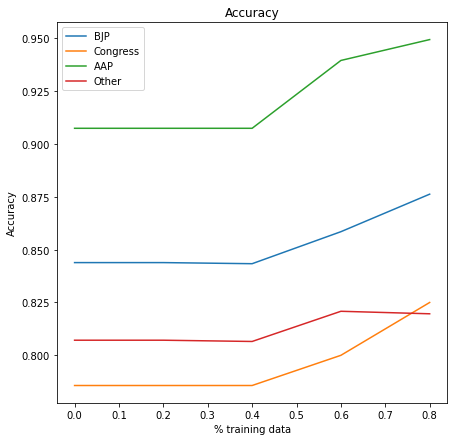

In [ ]:
plot_analysis_india_party_acc(bjp_dfs)

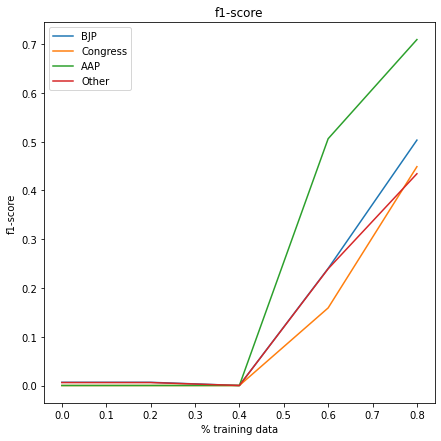

In [ ]:
plot_analysis_india_party_f1(bjp_dfs)

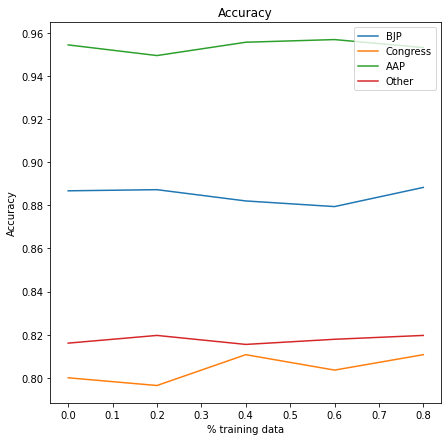

In [ ]:
plot_analysis_india_party_acc(cong_df)

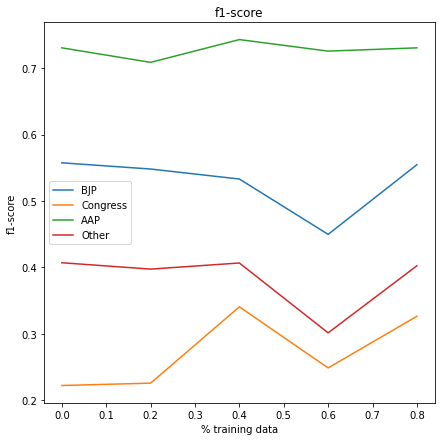

In [ ]:
plot_analysis_india_party_f1(cong_df)

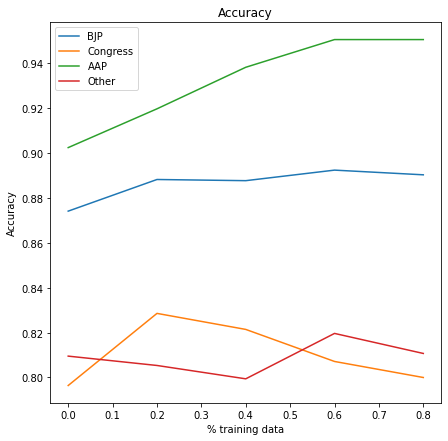

In [ ]:
plot_analysis_india_party_acc(aap_dfs)

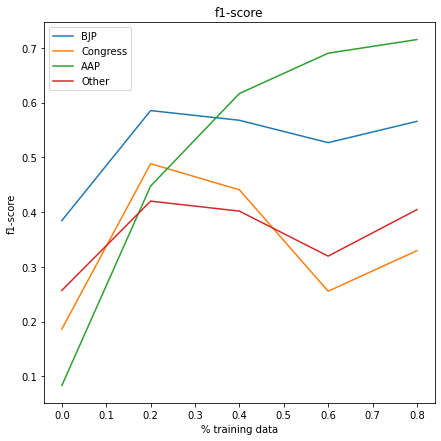

In [ ]:
plot_analysis_india_party_f1(aap_dfs)

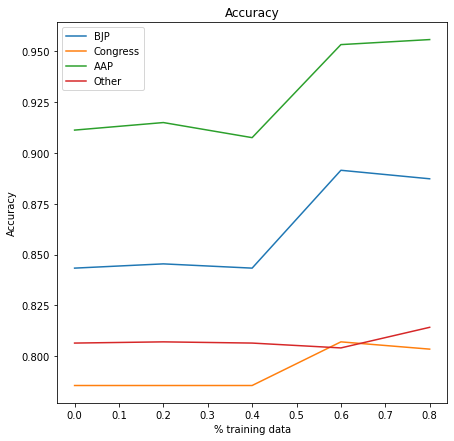

In [ ]:
plot_analysis_india_party_acc(other_dfs)

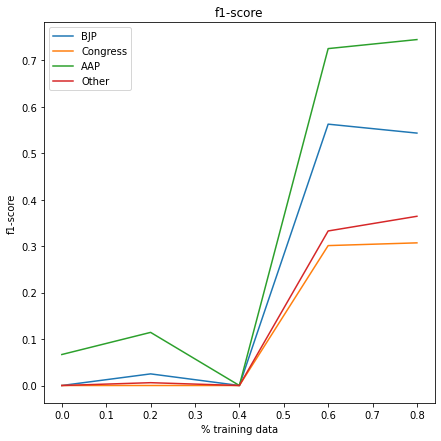

In [ ]:
plot_analysis_india_party_f1(other_dfs)

# Stance Variations

In [ ]:
anti_bjp_dfs = analysis_dfs_stance([0])

Shape (3230, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 890ms/step - loss: 0.6900 - acc: 0.6316
Epoch 2/15
4/4 [==============================] - 4s 890ms/step - loss: 0.6632 - acc: 0.8418
Epoch 3/15
4/4 [==============================] - 4s 878ms/step - loss: 0.6122 - acc: 0.8418
Epoch 4/15
4/4 [==============================] - 4s 892ms/step - loss: 0.5075 - acc: 0.8418
Epoch 5/15
4/4 [==============================] - 4s 885ms/step - loss: 0.4334 - acc: 0.8418
Epoch 6/15
4/4 [==============================] - 4s 888ms/step - loss: 0.4177 - acc: 0.8418
Epoch 7/15
4/4 [==============================] - 4s 883ms/step - loss: 0.3738 - acc: 0.8418
Epoch 8/15
4/4 [==============================] - 4s 878ms/step - loss: 0.3521 - acc: 0.8421
Epoch 9/15
4/4 [==============================] - 4s 893ms/step - loss: 0.3121 - acc: 0.8446
Epoch 10/15
4/4 [==============================] - 4s 897ms/step - loss: 0.2672 - acc: 0.8601
Epoch 11/15
4/4 [==============================] - 4s 877ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 882ms/step - loss: 0.6856 - acc: 0.7638
Epoch 2/15
4/4 [==============================] - 4s 883ms/step - loss: 0.6528 - acc: 0.8418
Epoch 3/15
4/4 [==============================] - 4s 877ms/step - loss: 0.5951 - acc: 0.8418
Epoch 4/15
4/4 [==============================] - 4s 881ms/step - loss: 0.4954 - acc: 0.8418
Epoch 5/15
4/4 [==============================] - 4s 886ms/step - loss: 0.4159 - acc: 0.8418
Epoch 6/15
4/4 [==============================] - 4s 885ms/step - loss: 0.4060 - acc: 0.8418
Epoch 7/15
4/4 [==============================] - 4s 873ms/step - loss: 0.3663 - acc: 0.8418
Epoch 8/15
4/4 [==============================] - 4s 885ms/step - loss: 0.3500 - acc: 0.8418
Epoch 9/15
4/4 [==============================] - 4s 888ms/step - loss: 0.3109 - acc: 0.8430
Epoch 10/15
4/4 [==============================] - 4s 895ms/step - loss: 0.2688 - acc: 0.8480
Epoch 11/15
4/4 [==============================] - 4s 877ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 884ms/step - loss: 0.6910 - acc: 0.5966
Epoch 2/15
4/4 [==============================] - 4s 881ms/step - loss: 0.6654 - acc: 0.8418
Epoch 3/15
4/4 [==============================] - 4s 900ms/step - loss: 0.6182 - acc: 0.8418
Epoch 4/15
4/4 [==============================] - 4s 866ms/step - loss: 0.5234 - acc: 0.8418
Epoch 5/15
4/4 [==============================] - 4s 870ms/step - loss: 0.4291 - acc: 0.8418
Epoch 6/15
4/4 [==============================] - 4s 872ms/step - loss: 0.4226 - acc: 0.8418
Epoch 7/15
4/4 [==============================] - 4s 881ms/step - loss: 0.3823 - acc: 0.8418
Epoch 8/15
4/4 [==============================] - 4s 890ms/step - loss: 0.3643 - acc: 0.8421
Epoch 9/15
4/4 [==============================] - 4s 878ms/step - loss: 0.3238 - acc: 0.8433
Epoch 10/15
4/4 [==============================] - 4s 886ms/step - loss: 0.2840 - acc: 0.8480
Epoch 11/15
4/4 [==============================] - 4s 877ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 886ms/step - loss: 0.6953 - acc: 0.3687
Epoch 2/15
4/4 [==============================] - 4s 874ms/step - loss: 0.6906 - acc: 0.8424
Epoch 3/15
4/4 [==============================] - 4s 882ms/step - loss: 0.6875 - acc: 0.8418
Epoch 4/15
4/4 [==============================] - 4s 878ms/step - loss: 0.6829 - acc: 0.8418
Epoch 5/15
4/4 [==============================] - 4s 885ms/step - loss: 0.6748 - acc: 0.8418
Epoch 6/15
4/4 [==============================] - 4s 877ms/step - loss: 0.6556 - acc: 0.8418
Epoch 7/15
4/4 [==============================] - 4s 884ms/step - loss: 0.6016 - acc: 0.8418
Epoch 8/15
4/4 [==============================] - 4s 883ms/step - loss: 0.5210 - acc: 0.8418
Epoch 9/15
4/4 [==============================] - 4s 888ms/step - loss: 0.4712 - acc: 0.8418
Epoch 10/15
4/4 [==============================] - 4s 890ms/step - loss: 0.4456 - acc: 0.8418
Epoch 11/15
4/4 [==============================] - 4s 880ms/step - l

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.84      1.00      0.91       785
           1       0.00      0.00      0.00       152

    accuracy                           0.84       937
   macro avg       0.42      0.50      0.46       937
weighted avg       0.70      0.84      0.76       937

Conf matrix [[785   0]
 [152   0]]
0: acc=0.8188976377952756
1: acc=0.85546875
2: acc=0.7843137254901961
3: acc=0.8
4: acc=0.7704918032786885
5: acc=0.9900990099009901
6: acc=0.8065476190476191
0: f1=0.0
1: f1=0.0
2: f1=0.0
3: f1=0.0
4: f1=0.0
5: f1=0.0
6: f1=0.0
Shape (3230, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 907ms/step - loss: 0.6893 - acc: 0.6737
Epoch 2/15
4/4 [==============================] - 4s 899ms/step - loss: 0.6628 - acc: 0.8418
Epoch 3/15
4/4 [==============================] - 4s 888ms/step - loss: 0.6113 - acc: 0.8418
Epoch 4/15
4/4 [==============================] - 4s 889ms/step - loss: 0.5081 - acc: 0.8418
Epoch 5/15
4/4 [==============================] - 4s 889ms/step - loss: 0.4356 - acc: 0.8418
Epoch 6/15
4/4 [==============================] - 4s 888ms/step - loss: 0.4192 - acc: 0.8418
Epoch 7/15
4/4 [==============================] - 4s 874ms/step - loss: 0.3847 - acc: 0.8418
Epoch 8/15
4/4 [==============================] - 4s 892ms/step - loss: 0.3695 - acc: 0.8421
Epoch 9/15
4/4 [==============================] - 4s 890ms/step - loss: 0.3263 - acc: 0.8443
Epoch 10/15
4/4 [==============================] - 4s 886ms/step - loss: 0.2850 - acc: 0.8529
Epoch 11/15
4/4 [==============================] - 4s 873ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 941ms/step - loss: 0.6908 - acc: 0.6575
Epoch 2/15
4/4 [==============================] - 4s 945ms/step - loss: 0.6726 - acc: 0.8415
Epoch 3/15
4/4 [==============================] - 4s 969ms/step - loss: 0.6401 - acc: 0.8415
Epoch 4/15
4/4 [==============================] - 4s 966ms/step - loss: 0.5761 - acc: 0.8415
Epoch 5/15
4/4 [==============================] - 4s 970ms/step - loss: 0.4527 - acc: 0.8415
Epoch 6/15
4/4 [==============================] - 4s 944ms/step - loss: 0.4479 - acc: 0.8415
Epoch 7/15
4/4 [==============================] - 4s 961ms/step - loss: 0.3928 - acc: 0.8415
Epoch 8/15
4/4 [==============================] - 4s 953ms/step - loss: 0.3788 - acc: 0.8418
Epoch 9/15
4/4 [==============================] - 4s 955ms/step - loss: 0.3503 - acc: 0.8421
Epoch 10/15
4/4 [==============================] - 4s 954ms/step - loss: 0.3075 - acc: 0.8457
Epoch 11/15
4/4 [==============================] - 4s 956ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 950ms/step - loss: 0.6877 - acc: 0.7175
Epoch 2/15
4/4 [==============================] - 4s 948ms/step - loss: 0.6597 - acc: 0.8424
Epoch 3/15
4/4 [==============================] - 4s 947ms/step - loss: 0.6069 - acc: 0.8424
Epoch 4/15
4/4 [==============================] - 4s 952ms/step - loss: 0.5029 - acc: 0.8424
Epoch 5/15
4/4 [==============================] - 4s 961ms/step - loss: 0.4250 - acc: 0.8424
Epoch 6/15
4/4 [==============================] - 4s 953ms/step - loss: 0.4054 - acc: 0.8424
Epoch 7/15
4/4 [==============================] - 4s 956ms/step - loss: 0.3703 - acc: 0.8424
Epoch 8/15
4/4 [==============================] - 4s 954ms/step - loss: 0.3498 - acc: 0.8427
Epoch 9/15
4/4 [==============================] - 4s 957ms/step - loss: 0.3038 - acc: 0.8451
Epoch 10/15
4/4 [==============================] - 4s 950ms/step - loss: 0.2597 - acc: 0.8586
Epoch 11/15
4/4 [==============================] - 4s 958ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 948ms/step - loss: 0.6903 - acc: 0.6295
Epoch 2/15
4/4 [==============================] - 4s 957ms/step - loss: 0.6671 - acc: 0.8403
Epoch 3/15
4/4 [==============================] - 4s 970ms/step - loss: 0.6264 - acc: 0.8403
Epoch 4/15
4/4 [==============================] - 4s 943ms/step - loss: 0.5406 - acc: 0.8403
Epoch 5/15
4/4 [==============================] - 4s 964ms/step - loss: 0.4297 - acc: 0.8403
Epoch 6/15
4/4 [==============================] - 4s 954ms/step - loss: 0.4320 - acc: 0.8403
Epoch 7/15
4/4 [==============================] - 4s 954ms/step - loss: 0.3795 - acc: 0.8403
Epoch 8/15
4/4 [==============================] - 4s 962ms/step - loss: 0.3634 - acc: 0.8406
Epoch 9/15
4/4 [==============================] - 4s 961ms/step - loss: 0.3238 - acc: 0.8418
Epoch 10/15
4/4 [==============================] - 4s 962ms/step - loss: 0.2792 - acc: 0.8538
Epoch 11/15
4/4 [==============================] - 4s 963ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 953ms/step - loss: 0.6858 - acc: 0.7511
Epoch 2/15
4/4 [==============================] - 4s 955ms/step - loss: 0.6485 - acc: 0.8412
Epoch 3/15
4/4 [==============================] - 4s 952ms/step - loss: 0.5788 - acc: 0.8412
Epoch 4/15
4/4 [==============================] - 4s 955ms/step - loss: 0.4566 - acc: 0.8412
Epoch 5/15
4/4 [==============================] - 4s 967ms/step - loss: 0.4313 - acc: 0.8412
Epoch 6/15
4/4 [==============================] - 4s 969ms/step - loss: 0.3808 - acc: 0.8412
Epoch 7/15
4/4 [==============================] - 4s 982ms/step - loss: 0.3621 - acc: 0.8412
Epoch 8/15
4/4 [==============================] - 4s 964ms/step - loss: 0.3295 - acc: 0.8421
Epoch 9/15
4/4 [==============================] - 4s 959ms/step - loss: 0.2834 - acc: 0.8472
Epoch 10/15
4/4 [==============================] - 4s 956ms/step - loss: 0.2414 - acc: 0.8634
Epoch 11/15
4/4 [==============================] - 4s 953ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 976ms/step - loss: 0.6846 - acc: 0.7454
Epoch 2/15
4/4 [==============================] - 4s 955ms/step - loss: 0.6399 - acc: 0.8412
Epoch 3/15
4/4 [==============================] - 4s 945ms/step - loss: 0.5520 - acc: 0.8412
Epoch 4/15
4/4 [==============================] - 4s 961ms/step - loss: 0.4351 - acc: 0.8412
Epoch 5/15
4/4 [==============================] - 4s 956ms/step - loss: 0.4271 - acc: 0.8412
Epoch 6/15
4/4 [==============================] - 4s 960ms/step - loss: 0.3806 - acc: 0.8412
Epoch 7/15
4/4 [==============================] - 4s 961ms/step - loss: 0.3625 - acc: 0.8412
Epoch 8/15
4/4 [==============================] - 4s 960ms/step - loss: 0.3213 - acc: 0.8415
Epoch 9/15
4/4 [==============================] - 4s 955ms/step - loss: 0.2752 - acc: 0.8445
Epoch 10/15
4/4 [==============================] - 4s 953ms/step - loss: 0.2279 - acc: 0.8670
Epoch 11/15
4/4 [==============================] - 4s 948ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 970ms/step - loss: 0.6881 - acc: 0.7107
Epoch 2/15
4/4 [==============================] - 4s 980ms/step - loss: 0.6622 - acc: 0.8409
Epoch 3/15
4/4 [==============================] - 4s 983ms/step - loss: 0.6140 - acc: 0.8409
Epoch 4/15
4/4 [==============================] - 4s 999ms/step - loss: 0.5188 - acc: 0.8409
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4268 - acc: 0.8409
Epoch 6/15
4/4 [==============================] - 4s 998ms/step - loss: 0.4166 - acc: 0.8409
Epoch 7/15
4/4 [==============================] - 4s 985ms/step - loss: 0.3759 - acc: 0.8409
Epoch 8/15
4/4 [==============================] - 4s 997ms/step - loss: 0.3585 - acc: 0.8412
Epoch 9/15
4/4 [==============================] - 4s 991ms/step - loss: 0.3192 - acc: 0.8429
Epoch 10/15
4/4 [==============================] - 4s 979ms/step - loss: 0.2812 - acc: 0.8497
Epoch 11/15
4/4 [==============================] - 4s 982ms/step - loss

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6874 - acc: 0.7456
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6593 - acc: 0.8429
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.6078 - acc: 0.8429
Epoch 4/15
4/4 [==============================] - 4s 985ms/step - loss: 0.5089 - acc: 0.8429
Epoch 5/15
4/4 [==============================] - 4s 986ms/step - loss: 0.4218 - acc: 0.8429
Epoch 6/15
4/4 [==============================] - 4s 977ms/step - loss: 0.4118 - acc: 0.8429
Epoch 7/15
4/4 [==============================] - 4s 991ms/step - loss: 0.3717 - acc: 0.8429
Epoch 8/15
4/4 [==============================] - 4s 970ms/step - loss: 0.3538 - acc: 0.8432
Epoch 9/15
4/4 [==============================] - 4s 973ms/step - loss: 0.3120 - acc: 0.8444
Epoch 10/15
4/4 [==============================] - 4s 981ms/step - loss: 0.2713 - acc: 0.8531
Epoch 11/15
4/4 [==============================] - 4s 979ms/step - loss: 0.22

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 981ms/step - loss: 0.6902 - acc: 0.6302
Epoch 2/15
4/4 [==============================] - 4s 989ms/step - loss: 0.6669 - acc: 0.8395
Epoch 3/15
4/4 [==============================] - 4s 979ms/step - loss: 0.6267 - acc: 0.8395
Epoch 4/15
4/4 [==============================] - 4s 996ms/step - loss: 0.5466 - acc: 0.8395
Epoch 5/15
4/4 [==============================] - 4s 982ms/step - loss: 0.4361 - acc: 0.8395
Epoch 6/15
4/4 [==============================] - 4s 980ms/step - loss: 0.4344 - acc: 0.8395
Epoch 7/15
4/4 [==============================] - 4s 973ms/step - loss: 0.3853 - acc: 0.8395
Epoch 8/15
4/4 [==============================] - 4s 978ms/step - loss: 0.3688 - acc: 0.8397
Epoch 9/15
4/4 [==============================] - 4s 984ms/step - loss: 0.3328 - acc: 0.8418
Epoch 10/15
4/4 [==============================] - 4s 985ms/step - loss: 0.2918 - acc: 0.8508
Epoch 11/15
4/4 [==============================] - 4s 988ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 993ms/step - loss: 0.6828 - acc: 0.8170
Epoch 2/15
4/4 [==============================] - 4s 991ms/step - loss: 0.6394 - acc: 0.8395
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5557 - acc: 0.8395
Epoch 4/15
4/4 [==============================] - 4s 978ms/step - loss: 0.4393 - acc: 0.8395
Epoch 5/15
4/4 [==============================] - 4s 988ms/step - loss: 0.4304 - acc: 0.8395
Epoch 6/15
4/4 [==============================] - 4s 981ms/step - loss: 0.3792 - acc: 0.8395
Epoch 7/15
4/4 [==============================] - 4s 993ms/step - loss: 0.3614 - acc: 0.8395
Epoch 8/15
4/4 [==============================] - 4s 984ms/step - loss: 0.3212 - acc: 0.8400
Epoch 9/15
4/4 [==============================] - 4s 992ms/step - loss: 0.2766 - acc: 0.8444
Epoch 10/15
4/4 [==============================] - 4s 981ms/step - loss: 0.2305 - acc: 0.8633
Epoch 11/15
4/4 [==============================] - 4s 984ms/step - loss

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 993ms/step - loss: 0.6851 - acc: 0.7733
Epoch 2/15
4/4 [==============================] - 4s 990ms/step - loss: 0.6470 - acc: 0.8397
Epoch 3/15
4/4 [==============================] - 4s 1000ms/step - loss: 0.5751 - acc: 0.8397
Epoch 4/15
4/4 [==============================] - 4s 999ms/step - loss: 0.4564 - acc: 0.8397
Epoch 5/15
4/4 [==============================] - 4s 976ms/step - loss: 0.4395 - acc: 0.8397
Epoch 6/15
4/4 [==============================] - 4s 984ms/step - loss: 0.3879 - acc: 0.8397
Epoch 7/15
4/4 [==============================] - 4s 994ms/step - loss: 0.3688 - acc: 0.8397
Epoch 8/15
4/4 [==============================] - 4s 1000ms/step - loss: 0.3330 - acc: 0.8397
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.2870 - acc: 0.8441
Epoch 10/15
4/4 [==============================] - 4s 994ms/step - loss: 0.2441 - acc: 0.8590
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6828 - acc: 0.7797
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6411 - acc: 0.8403
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5671 - acc: 0.8403
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4477 - acc: 0.8403
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4337 - acc: 0.8403
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3822 - acc: 0.8403
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3602 - acc: 0.8403
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3297 - acc: 0.8414
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.2845 - acc: 0.8471
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2415 - acc: 0.8652
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.1895 - acc: 0.9006
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6850 - acc: 0.7610
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6487 - acc: 0.8417
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5814 - acc: 0.8417
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4631 - acc: 0.8417
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4302 - acc: 0.8417
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3842 - acc: 0.8417
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3644 - acc: 0.8417
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3332 - acc: 0.8417
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.2881 - acc: 0.8443
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2441 - acc: 0.8604
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.1908 - acc: 0.8947
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6888 - acc: 0.6928
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6628 - acc: 0.8392
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.6106 - acc: 0.8392
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.5024 - acc: 0.8392
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4409 - acc: 0.8392
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.4150 - acc: 0.8392
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3821 - acc: 0.8392
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3620 - acc: 0.8392
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3158 - acc: 0.8417
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2773 - acc: 0.8531
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.2238 - acc: 0.8763
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6875 - acc: 0.6948
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6567 - acc: 0.8392
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5998 - acc: 0.8392
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4928 - acc: 0.8392
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4280 - acc: 0.8392
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.4040 - acc: 0.8392
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3758 - acc: 0.8392
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3459 - acc: 0.8400
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3019 - acc: 0.8443
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2533 - acc: 0.8641
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.1979 - acc: 0.8975
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6827 - acc: 0.8032
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6380 - acc: 0.8412
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5509 - acc: 0.8412
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4372 - acc: 0.8412
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4202 - acc: 0.8412
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3735 - acc: 0.8412
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3533 - acc: 0.8412
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3137 - acc: 0.8434
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.2683 - acc: 0.8511
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2145 - acc: 0.8766
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.1635 - acc: 0.9332
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6818 - acc: 0.8037
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6367 - acc: 0.8393
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5535 - acc: 0.8393
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4369 - acc: 0.8393
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4286 - acc: 0.8393
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3798 - acc: 0.8393
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3605 - acc: 0.8395
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3238 - acc: 0.8415
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.2786 - acc: 0.8486
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2325 - acc: 0.8715
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.1793 - acc: 0.9188
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6830 - acc: 0.8018
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6421 - acc: 0.8409
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5678 - acc: 0.8409
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4485 - acc: 0.8409
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4310 - acc: 0.8409
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3843 - acc: 0.8409
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3606 - acc: 0.8409
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3306 - acc: 0.8412
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.2853 - acc: 0.8434
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2405 - acc: 0.8569
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.1907 - acc: 0.8935
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6820 - acc: 0.7421
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6318 - acc: 0.8390
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5414 - acc: 0.8390
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4237 - acc: 0.8390
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4285 - acc: 0.8390
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3708 - acc: 0.8390
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3552 - acc: 0.8390
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3169 - acc: 0.8415
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.2714 - acc: 0.8544
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.2275 - acc: 0.8767
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.1724 - acc: 0.9216
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6874 - acc: 0.7179
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6574 - acc: 0.8395
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.6019 - acc: 0.8395
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.4948 - acc: 0.8395
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.4406 - acc: 0.8395
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.4063 - acc: 0.8395
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.3809 - acc: 0.8395
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3577 - acc: 0.8398
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.3120 - acc: 0.8406
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.2722 - acc: 0.8500
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.2198 - acc: 0.8745
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 14s 1s/step - loss: 0.6872 - acc: 0.6923


In [ ]:
for df in anti_bjp_dfs:
  print(df)

               Accuracy  f1-score
Anti-BJP       0.818898  0.206897
Pro-BJP        0.882812  0.531250
Anti-Congress  0.823529  0.400000
Pro-Congress   0.600000  0.000000
Anti-AAP       0.901639  0.750000
Pro-AAP        0.970297  0.000000
Other          0.830357  0.467290
               Accuracy  f1-score
Anti-BJP       0.842520  0.375000
Pro-BJP        0.914062  0.633333
Anti-Congress  0.784314  0.266667
Pro-Congress   0.600000  0.000000
Anti-AAP       0.918033  0.782609
Pro-AAP        0.970297  0.000000
Other          0.824405  0.391753
               Accuracy  f1-score
Anti-BJP       0.858268  0.357143
Pro-BJP        0.914062  0.592593
Anti-Congress  0.803922  0.166667
Pro-Congress   0.800000  0.000000
Anti-AAP       0.901639  0.750000
Pro-AAP        0.990099  0.000000
Other          0.833333  0.317073
               Accuracy  f1-score
Anti-BJP       0.834646  0.322581
Pro-BJP        0.921875  0.655172
Anti-Congress  0.803922  0.285714
Pro-Congress   0.800000  0.000000
Anti-AAP      

In [ ]:
pro_bjp_dfs = analysis_dfs_stance([1])

Shape (2711, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 12s 1s/step - loss: 0.6895 - acc: 0.6625
Epoch 2/15
3/3 [==============================] - 3s 1s/step - loss: 0.6682 - acc: 0.8318
Epoch 3/15
3/3 [==============================] - 3s 1s/step - loss: 0.6350 - acc: 0.8318
Epoch 4/15
3/3 [==============================] - 3s 1s/step - loss: 0.5810 - acc: 0.8318
Epoch 5/15
3/3 [==============================] - 3s 1s/step - loss: 0.4950 - acc: 0.8318
Epoch 6/15
3/3 [==============================] - 3s 1s/step - loss: 0.4291 - acc: 0.8318
Epoch 7/15
3/3 [==============================] - 3s 1s/step - loss: 0.4361 - acc: 0.8318
Epoch 8/15
3/3 [==============================] - 3s 1s/step - loss: 0.3875 - acc: 0.8318
Epoch 9/15
3/3 [==============================] - 3s 1s/step - loss: 0.3696 - acc: 0.8318
Epoch 10/15
3/3 [==============================] - 3s 1s/step - loss: 0.3473 - acc: 0.8333
Epoch 11/15
3/3 [==============================] - 3s 1s/step - loss: 0.3097 - acc: 0.8347
Epoch 1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.84      1.00      0.91       785
           1       0.00      0.00      0.00       152

    accuracy                           0.84       937
   macro avg       0.42      0.50      0.46       937
weighted avg       0.70      0.84      0.76       937

Conf matrix [[785   0]
 [152   0]]
0: acc=0.8188976377952756
1: acc=0.85546875
2: acc=0.7843137254901961
3: acc=0.8
4: acc=0.7704918032786885
5: acc=0.9900990099009901
6: acc=0.8065476190476191
0: f1=0.0
1: f1=0.0
2: f1=0.0
3: f1=0.0
4: f1=0.0
5: f1=0.0
6: f1=0.0
Shape (2711, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 12s 1s/step - loss: 0.6856 - acc: 0.7942
Epoch 2/15
3/3 [==============================] - 3s 1s/step - loss: 0.6598 - acc: 0.8318
Epoch 3/15
3/3 [==============================] - 3s 1s/step - loss: 0.6186 - acc: 0.8318
Epoch 4/15
3/3 [==============================] - 3s 1s/step - loss: 0.5541 - acc: 0.8318
Epoch 5/15
3/3 [==============================] - 3s 1s/step - loss: 0.4631 - acc: 0.8318
Epoch 6/15
3/3 [==============================] - 3s 1s/step - loss: 0.4321 - acc: 0.8318
Epoch 7/15
3/3 [==============================] - 3s 1s/step - loss: 0.4184 - acc: 0.8318
Epoch 8/15
3/3 [==============================] - 3s 1s/step - loss: 0.3766 - acc: 0.8318
Epoch 9/15
3/3 [==============================] - 3s 1s/step - loss: 0.3613 - acc: 0.8318
Epoch 10/15
3/3 [==============================] - 3s 1s/step - loss: 0.3382 - acc: 0.8336
Epoch 11/15
3/3 [==============================] - 3s 1s/step - loss: 0.3014 - acc: 0.8347
Epoch 1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.84      1.00      0.91       785
           1       0.00      0.00      0.00       152

    accuracy                           0.84       937
   macro avg       0.42      0.50      0.46       937
weighted avg       0.70      0.84      0.76       937

Conf matrix [[785   0]
 [152   0]]
0: acc=0.8188976377952756
1: acc=0.85546875
2: acc=0.7843137254901961
3: acc=0.8
4: acc=0.7704918032786885
5: acc=0.9900990099009901
6: acc=0.8065476190476191
0: f1=0.0
1: f1=0.0
2: f1=0.0
3: f1=0.0
4: f1=0.0
5: f1=0.0
6: f1=0.0
Shape (2711, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 12s 1s/step - loss: 0.6883 - acc: 0.7643
Epoch 2/15
3/3 [==============================] - 3s 1s/step - loss: 0.6709 - acc: 0.8318
Epoch 3/15
3/3 [==============================] - 3s 1s/step - loss: 0.6427 - acc: 0.8318
Epoch 4/15
3/3 [==============================] - 3s 1s/step - loss: 0.5970 - acc: 0.8318
Epoch 5/15
3/3 [==============================] - 3s 1s/step - loss: 0.5225 - acc: 0.8318
Epoch 6/15
3/3 [==============================] - 3s 1s/step - loss: 0.4334 - acc: 0.8318
Epoch 7/15
3/3 [==============================] - 3s 1s/step - loss: 0.4557 - acc: 0.8318
Epoch 8/15
3/3 [==============================] - 3s 1s/step - loss: 0.3988 - acc: 0.8318
Epoch 9/15
3/3 [==============================] - 3s 1s/step - loss: 0.3791 - acc: 0.8318
Epoch 10/15
3/3 [==============================] - 3s 1s/step - loss: 0.3643 - acc: 0.8318
Epoch 11/15
3/3 [==============================] - 3s 1s/step - loss: 0.3298 - acc: 0.8322
Epoch 1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.84      1.00      0.91       785
           1       0.00      0.00      0.00       152

    accuracy                           0.84       937
   macro avg       0.42      0.50      0.46       937
weighted avg       0.70      0.84      0.76       937

Conf matrix [[785   0]
 [152   0]]
0: acc=0.8188976377952756
1: acc=0.85546875
2: acc=0.7843137254901961
3: acc=0.8
4: acc=0.7704918032786885
5: acc=0.9900990099009901
6: acc=0.8065476190476191
0: f1=0.0
1: f1=0.0
2: f1=0.0
3: f1=0.0
4: f1=0.0
5: f1=0.0
6: f1=0.0
Shape (2711, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 12s 1s/step - loss: 0.6862 - acc: 0.7886
Epoch 2/15
3/3 [==============================] - 3s 1s/step - loss: 0.6610 - acc: 0.8318
Epoch 3/15
3/3 [==============================] - 3s 1s/step - loss: 0.6198 - acc: 0.8318
Epoch 4/15
3/3 [==============================] - 3s 1s/step - loss: 0.5555 - acc: 0.8318
Epoch 5/15
3/3 [==============================] - 3s 1s/step - loss: 0.4627 - acc: 0.8318
Epoch 6/15
3/3 [==============================] - 3s 1s/step - loss: 0.4291 - acc: 0.8318
Epoch 7/15
3/3 [==============================] - 3s 1s/step - loss: 0.4140 - acc: 0.8318
Epoch 8/15
3/3 [==============================] - 3s 1s/step - loss: 0.3749 - acc: 0.8318
Epoch 9/15
3/3 [==============================] - 3s 1s/step - loss: 0.3607 - acc: 0.8318
Epoch 10/15
3/3 [==============================] - 3s 1s/step - loss: 0.3336 - acc: 0.8336
Epoch 11/15
3/3 [==============================] - 3s 1s/step - loss: 0.2923 - acc: 0.8362
Epoch 1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.84      1.00      0.91       785
           1       0.00      0.00      0.00       152

    accuracy                           0.84       937
   macro avg       0.42      0.50      0.46       937
weighted avg       0.70      0.84      0.76       937

Conf matrix [[785   0]
 [152   0]]
0: acc=0.8188976377952756
1: acc=0.85546875
2: acc=0.7843137254901961
3: acc=0.8
4: acc=0.7704918032786885
5: acc=0.9900990099009901
6: acc=0.8065476190476191
0: f1=0.0
1: f1=0.0
2: f1=0.0
3: f1=0.0
4: f1=0.0
5: f1=0.0
6: f1=0.0
Shape (2711, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 11s 1s/step - loss: 0.6871 - acc: 0.7506
Epoch 2/15
3/3 [==============================] - 3s 1s/step - loss: 0.6638 - acc: 0.8318
Epoch 3/15
3/3 [==============================] - 3s 1s/step - loss: 0.6259 - acc: 0.8318
Epoch 4/15
3/3 [==============================] - 3s 1s/step - loss: 0.5650 - acc: 0.8318
Epoch 5/15
3/3 [==============================] - 3s 1s/step - loss: 0.4759 - acc: 0.8318
Epoch 6/15
3/3 [==============================] - 3s 1s/step - loss: 0.4272 - acc: 0.8318
Epoch 7/15
3/3 [==============================] - 3s 1s/step - loss: 0.4249 - acc: 0.8318
Epoch 8/15
3/3 [==============================] - 3s 1s/step - loss: 0.3798 - acc: 0.8318
Epoch 9/15
3/3 [==============================] - 3s 1s/step - loss: 0.3632 - acc: 0.8322
Epoch 10/15
3/3 [==============================] - 3s 1s/step - loss: 0.3378 - acc: 0.8329
Epoch 11/15
3/3 [==============================] - 3s 1s/step - loss: 0.2982 - acc: 0.8373
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 12s 1s/step - loss: 0.6873 - acc: 0.7184
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.6625 - acc: 0.8326
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.6248 - acc: 0.8326
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.5646 - acc: 0.8326
Epoch 5/15
3/3 [==============================] - 4s 1s/step - loss: 0.4757 - acc: 0.8326
Epoch 6/15
3/3 [==============================] - 3s 1s/step - loss: 0.4380 - acc: 0.8326
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.4240 - acc: 0.8326
Epoch 8/15
3/3 [==============================] - 3s 1s/step - loss: 0.3835 - acc: 0.8326
Epoch 9/15
3/3 [==============================] - 3s 1s/step - loss: 0.3674 - acc: 0.8326
Epoch 10/15
3/3 [==============================] - 3s 1s/step - loss: 0.3434 - acc: 0.8330
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss: 0.3066 - acc: 0.8354
Epoch 1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.84      1.00      0.91       785
           1       0.00      0.00      0.00       152

    accuracy                           0.84       937
   macro avg       0.42      0.50      0.46       937
weighted avg       0.70      0.84      0.76       937

Conf matrix [[785   0]
 [152   0]]
0: acc=0.8188976377952756
1: acc=0.85546875
2: acc=0.7843137254901961
3: acc=0.8
4: acc=0.7704918032786885
5: acc=0.9900990099009901
6: acc=0.8065476190476191
0: f1=0.0
1: f1=0.0
2: f1=0.0
3: f1=0.0
4: f1=0.0
5: f1=0.0
6: f1=0.0
Shape (2916, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 12s 1s/step - loss: 0.6886 - acc: 0.6900
Epoch 2/15
3/3 [==============================] - 3s 1s/step - loss: 0.6679 - acc: 0.8323
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.6341 - acc: 0.8323
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.5774 - acc: 0.8323
Epoch 5/15
3/3 [==============================] - 3s 1s/step - loss: 0.4892 - acc: 0.8323
Epoch 6/15
3/3 [==============================] - 3s 1s/step - loss: 0.4406 - acc: 0.8323
Epoch 7/15
3/3 [==============================] - 3s 1s/step - loss: 0.4325 - acc: 0.8323
Epoch 8/15
3/3 [==============================] - 4s 1s/step - loss: 0.3896 - acc: 0.8323
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.3732 - acc: 0.8323
Epoch 10/15
3/3 [==============================] - 3s 1s/step - loss: 0.3520 - acc: 0.8323
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss: 0.3147 - acc: 0.8354
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 12s 1s/step - loss: 0.6848 - acc: 0.7754
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.6552 - acc: 0.8361
Epoch 3/15
3/3 [==============================] - 3s 1s/step - loss: 0.6070 - acc: 0.8361
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.5304 - acc: 0.8361
Epoch 5/15
3/3 [==============================] - 4s 1s/step - loss: 0.4337 - acc: 0.8361
Epoch 6/15
3/3 [==============================] - 4s 1s/step - loss: 0.4333 - acc: 0.8361
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.3938 - acc: 0.8361
Epoch 8/15
3/3 [==============================] - 4s 1s/step - loss: 0.3616 - acc: 0.8361
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.3493 - acc: 0.8368
Epoch 10/15
3/3 [==============================] - 4s 1s/step - loss: 0.3195 - acc: 0.8378
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss: 0.2793 - acc: 0.8457
Epoch 1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.84      1.00      0.91       785
           1       0.00      0.00      0.00       152

    accuracy                           0.84       937
   macro avg       0.42      0.50      0.46       937
weighted avg       0.70      0.84      0.76       937

Conf matrix [[785   0]
 [152   0]]
0: acc=0.8188976377952756
1: acc=0.85546875
2: acc=0.7843137254901961
3: acc=0.8
4: acc=0.7704918032786885
5: acc=0.9900990099009901
6: acc=0.8065476190476191
0: f1=0.0
1: f1=0.0
2: f1=0.0
3: f1=0.0
4: f1=0.0
5: f1=0.0
6: f1=0.0
Shape (2916, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 12s 1s/step - loss: 0.6892 - acc: 0.6790
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.6694 - acc: 0.8347
Epoch 3/15
3/3 [==============================] - 3s 1s/step - loss: 0.6380 - acc: 0.8347
Epoch 4/15
3/3 [==============================] - 3s 1s/step - loss: 0.5869 - acc: 0.8347
Epoch 5/15
3/3 [==============================] - 3s 1s/step - loss: 0.5075 - acc: 0.8347
Epoch 6/15
3/3 [==============================] - 4s 1s/step - loss: 0.4264 - acc: 0.8347
Epoch 7/15
3/3 [==============================] - 3s 1s/step - loss: 0.4363 - acc: 0.8347
Epoch 8/15
3/3 [==============================] - 3s 1s/step - loss: 0.3906 - acc: 0.8347
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.3690 - acc: 0.8347
Epoch 10/15
3/3 [==============================] - 3s 1s/step - loss: 0.3536 - acc: 0.8347
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss: 0.3215 - acc: 0.8361
Epoch 1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.84      1.00      0.91       785
           1       0.00      0.00      0.00       152

    accuracy                           0.84       937
   macro avg       0.42      0.50      0.46       937
weighted avg       0.70      0.84      0.76       937

Conf matrix [[785   0]
 [152   0]]
0: acc=0.8188976377952756
1: acc=0.85546875
2: acc=0.7843137254901961
3: acc=0.8
4: acc=0.7704918032786885
5: acc=0.9900990099009901
6: acc=0.8065476190476191
0: f1=0.0
1: f1=0.0
2: f1=0.0
3: f1=0.0
4: f1=0.0
5: f1=0.0
6: f1=0.0
Shape (2916, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 12s 1s/step - loss: 0.6872 - acc: 0.7119
Epoch 2/15
3/3 [==============================] - 3s 1s/step - loss: 0.6627 - acc: 0.8340
Epoch 3/15
3/3 [==============================] - 3s 1s/step - loss: 0.6235 - acc: 0.8340
Epoch 4/15
3/3 [==============================] - 3s 1s/step - loss: 0.5620 - acc: 0.8340
Epoch 5/15
3/3 [==============================] - 3s 1s/step - loss: 0.4724 - acc: 0.8340
Epoch 6/15
3/3 [==============================] - 3s 1s/step - loss: 0.4240 - acc: 0.8340
Epoch 7/15
3/3 [==============================] - 3s 1s/step - loss: 0.4206 - acc: 0.8340
Epoch 8/15
3/3 [==============================] - 3s 1s/step - loss: 0.3771 - acc: 0.8344
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.3617 - acc: 0.8344
Epoch 10/15
3/3 [==============================] - 3s 1s/step - loss: 0.3378 - acc: 0.8354
Epoch 11/15
3/3 [==============================] - 3s 1s/step - loss: 0.2982 - acc: 0.8395
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 855ms/step - loss: 0.6895 - acc: 0.6933
Epoch 2/15
4/4 [==============================] - 4s 874ms/step - loss: 0.6665 - acc: 0.8346
Epoch 3/15
4/4 [==============================] - 4s 870ms/step - loss: 0.6220 - acc: 0.8346
Epoch 4/15
4/4 [==============================] - 4s 861ms/step - loss: 0.5334 - acc: 0.8346
Epoch 5/15
4/4 [==============================] - 4s 861ms/step - loss: 0.4384 - acc: 0.8346
Epoch 6/15
4/4 [==============================] - 4s 852ms/step - loss: 0.4244 - acc: 0.8346
Epoch 7/15
4/4 [==============================] - 4s 855ms/step - loss: 0.3915 - acc: 0.8346
Epoch 8/15
4/4 [==============================] - 4s 854ms/step - loss: 0.3735 - acc: 0.8349
Epoch 9/15
4/4 [==============================] - 4s 862ms/step - loss: 0.3381 - acc: 0.8365
Epoch 10/15
4/4 [==============================] - 4s 856ms/step - loss: 0.3033 - acc: 0.8394
Epoch 11/15
4/4 [==============================] - 4s 853ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 863ms/step - loss: 0.6918 - acc: 0.6010
Epoch 2/15
4/4 [==============================] - 4s 866ms/step - loss: 0.6744 - acc: 0.8343
Epoch 3/15
4/4 [==============================] - 4s 873ms/step - loss: 0.6431 - acc: 0.8343
Epoch 4/15
4/4 [==============================] - 4s 853ms/step - loss: 0.5759 - acc: 0.8343
Epoch 5/15
4/4 [==============================] - 4s 860ms/step - loss: 0.4575 - acc: 0.8343
Epoch 6/15
4/4 [==============================] - 4s 866ms/step - loss: 0.4506 - acc: 0.8343
Epoch 7/15
4/4 [==============================] - 4s 865ms/step - loss: 0.4175 - acc: 0.8343
Epoch 8/15
4/4 [==============================] - 4s 856ms/step - loss: 0.3937 - acc: 0.8346
Epoch 9/15
4/4 [==============================] - 4s 859ms/step - loss: 0.3663 - acc: 0.8356
Epoch 10/15
4/4 [==============================] - 4s 872ms/step - loss: 0.3260 - acc: 0.8391
Epoch 11/15
4/4 [==============================] - 4s 860ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 11s 866ms/step - loss: 0.6878 - acc: 0.6801
Epoch 2/15
4/4 [==============================] - 4s 868ms/step - loss: 0.6510 - acc: 0.8372
Epoch 3/15
4/4 [==============================] - 4s 863ms/step - loss: 0.5890 - acc: 0.8372
Epoch 4/15
4/4 [==============================] - 4s 877ms/step - loss: 0.4812 - acc: 0.8372
Epoch 5/15
4/4 [==============================] - 4s 859ms/step - loss: 0.4421 - acc: 0.8372
Epoch 6/15
4/4 [==============================] - 4s 871ms/step - loss: 0.4008 - acc: 0.8372
Epoch 7/15
4/4 [==============================] - 4s 881ms/step - loss: 0.3898 - acc: 0.8372
Epoch 8/15
4/4 [==============================] - 4s 873ms/step - loss: 0.3766 - acc: 0.8372
Epoch 9/15
4/4 [==============================] - 4s 860ms/step - loss: 0.3336 - acc: 0.8391
Epoch 10/15
4/4 [==============================] - 4s 867ms/step - loss: 0.2864 - acc: 0.8458
Epoch 11/15
4/4 [==============================] - 4s 869ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 876ms/step - loss: 0.6847 - acc: 0.7529
Epoch 2/15
4/4 [==============================] - 4s 874ms/step - loss: 0.6417 - acc: 0.8365
Epoch 3/15
4/4 [==============================] - 4s 868ms/step - loss: 0.5704 - acc: 0.8365
Epoch 4/15
4/4 [==============================] - 4s 878ms/step - loss: 0.4558 - acc: 0.8365
Epoch 5/15
4/4 [==============================] - 4s 879ms/step - loss: 0.4419 - acc: 0.8365
Epoch 6/15
4/4 [==============================] - 4s 869ms/step - loss: 0.3932 - acc: 0.8365
Epoch 7/15
4/4 [==============================] - 4s 870ms/step - loss: 0.3682 - acc: 0.8365
Epoch 8/15
4/4 [==============================] - 4s 864ms/step - loss: 0.3472 - acc: 0.8372
Epoch 9/15
4/4 [==============================] - 4s 876ms/step - loss: 0.3078 - acc: 0.8391
Epoch 10/15
4/4 [==============================] - 4s 859ms/step - loss: 0.2688 - acc: 0.8503
Epoch 11/15
4/4 [==============================] - 4s 864ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 883ms/step - loss: 0.6871 - acc: 0.7224
Epoch 2/15
4/4 [==============================] - 4s 858ms/step - loss: 0.6527 - acc: 0.8372
Epoch 3/15
4/4 [==============================] - 4s 866ms/step - loss: 0.5928 - acc: 0.8372
Epoch 4/15
4/4 [==============================] - 4s 872ms/step - loss: 0.4874 - acc: 0.8372
Epoch 5/15
4/4 [==============================] - 4s 864ms/step - loss: 0.4372 - acc: 0.8372
Epoch 6/15
4/4 [==============================] - 4s 868ms/step - loss: 0.4010 - acc: 0.8372
Epoch 7/15
4/4 [==============================] - 4s 882ms/step - loss: 0.3882 - acc: 0.8372
Epoch 8/15
4/4 [==============================] - 4s 871ms/step - loss: 0.3762 - acc: 0.8372
Epoch 9/15
4/4 [==============================] - 4s 867ms/step - loss: 0.3350 - acc: 0.8381
Epoch 10/15
4/4 [==============================] - 4s 868ms/step - loss: 0.2978 - acc: 0.8397
Epoch 11/15
4/4 [==============================] - 4s 847ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 11s 938ms/step - loss: 0.6854 - acc: 0.7597
Epoch 2/15
4/4 [==============================] - 4s 950ms/step - loss: 0.6508 - acc: 0.8364
Epoch 3/15
4/4 [==============================] - 4s 948ms/step - loss: 0.5885 - acc: 0.8364
Epoch 4/15
4/4 [==============================] - 4s 946ms/step - loss: 0.4787 - acc: 0.8364
Epoch 5/15
4/4 [==============================] - 4s 948ms/step - loss: 0.4401 - acc: 0.8364
Epoch 6/15
4/4 [==============================] - 4s 956ms/step - loss: 0.3922 - acc: 0.8364
Epoch 7/15
4/4 [==============================] - 4s 946ms/step - loss: 0.3748 - acc: 0.8364
Epoch 8/15
4/4 [==============================] - 4s 948ms/step - loss: 0.3487 - acc: 0.8367
Epoch 9/15
4/4 [==============================] - 4s 949ms/step - loss: 0.3028 - acc: 0.8394
Epoch 10/15
4/4 [==============================] - 4s 950ms/step - loss: 0.2632 - acc: 0.8517
Epoch 11/15
4/4 [==============================] - 4s 947ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 946ms/step - loss: 0.6879 - acc: 0.7095
Epoch 2/15
4/4 [==============================] - 4s 939ms/step - loss: 0.6591 - acc: 0.8376
Epoch 3/15
4/4 [==============================] - 4s 950ms/step - loss: 0.6042 - acc: 0.8376
Epoch 4/15
4/4 [==============================] - 4s 946ms/step - loss: 0.4922 - acc: 0.8376
Epoch 5/15
4/4 [==============================] - 4s 949ms/step - loss: 0.4482 - acc: 0.8376
Epoch 6/15
4/4 [==============================] - 4s 933ms/step - loss: 0.4103 - acc: 0.8376
Epoch 7/15
4/4 [==============================] - 4s 944ms/step - loss: 0.3873 - acc: 0.8376
Epoch 8/15
4/4 [==============================] - 4s 939ms/step - loss: 0.3647 - acc: 0.8379
Epoch 9/15
4/4 [==============================] - 4s 934ms/step - loss: 0.3217 - acc: 0.8391
Epoch 10/15
4/4 [==============================] - 4s 947ms/step - loss: 0.2814 - acc: 0.8493
Epoch 11/15
4/4 [==============================] - 4s 943ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 936ms/step - loss: 0.6861 - acc: 0.7642
Epoch 2/15
4/4 [==============================] - 4s 948ms/step - loss: 0.6538 - acc: 0.8379
Epoch 3/15
4/4 [==============================] - 4s 943ms/step - loss: 0.5909 - acc: 0.8379
Epoch 4/15
4/4 [==============================] - 4s 947ms/step - loss: 0.4739 - acc: 0.8379
Epoch 5/15
4/4 [==============================] - 4s 951ms/step - loss: 0.4381 - acc: 0.8379
Epoch 6/15
4/4 [==============================] - 4s 936ms/step - loss: 0.3944 - acc: 0.8379
Epoch 7/15
4/4 [==============================] - 4s 938ms/step - loss: 0.3760 - acc: 0.8379
Epoch 8/15
4/4 [==============================] - 4s 932ms/step - loss: 0.3475 - acc: 0.8385
Epoch 9/15
4/4 [==============================] - 4s 944ms/step - loss: 0.3024 - acc: 0.8409
Epoch 10/15
4/4 [==============================] - 4s 950ms/step - loss: 0.2615 - acc: 0.8556
Epoch 11/15
4/4 [==============================] - 4s 949ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 953ms/step - loss: 0.6846 - acc: 0.7320
Epoch 2/15
4/4 [==============================] - 4s 929ms/step - loss: 0.6424 - acc: 0.8370
Epoch 3/15
4/4 [==============================] - 4s 942ms/step - loss: 0.5651 - acc: 0.8370
Epoch 4/15
4/4 [==============================] - 4s 945ms/step - loss: 0.4479 - acc: 0.8370
Epoch 5/15
4/4 [==============================] - 4s 946ms/step - loss: 0.4419 - acc: 0.8370
Epoch 6/15
4/4 [==============================] - 4s 936ms/step - loss: 0.3870 - acc: 0.8370
Epoch 7/15
4/4 [==============================] - 4s 953ms/step - loss: 0.3730 - acc: 0.8370
Epoch 8/15
4/4 [==============================] - 4s 950ms/step - loss: 0.3385 - acc: 0.8385
Epoch 9/15
4/4 [==============================] - 4s 942ms/step - loss: 0.2920 - acc: 0.8436
Epoch 10/15
4/4 [==============================] - 4s 944ms/step - loss: 0.2450 - acc: 0.8653
Epoch 11/15
4/4 [==============================] - 4s 942ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 942ms/step - loss: 0.6856 - acc: 0.7579
Epoch 2/15
4/4 [==============================] - 4s 936ms/step - loss: 0.6499 - acc: 0.8367
Epoch 3/15
4/4 [==============================] - 4s 944ms/step - loss: 0.5814 - acc: 0.8367
Epoch 4/15
4/4 [==============================] - 4s 939ms/step - loss: 0.4641 - acc: 0.8367
Epoch 5/15
4/4 [==============================] - 4s 941ms/step - loss: 0.4367 - acc: 0.8367
Epoch 6/15
4/4 [==============================] - 4s 937ms/step - loss: 0.3920 - acc: 0.8367
Epoch 7/15
4/4 [==============================] - 4s 949ms/step - loss: 0.3715 - acc: 0.8367
Epoch 8/15
4/4 [==============================] - 4s 938ms/step - loss: 0.3380 - acc: 0.8370
Epoch 9/15
4/4 [==============================] - 4s 939ms/step - loss: 0.2940 - acc: 0.8418
Epoch 10/15
4/4 [==============================] - 4s 928ms/step - loss: 0.2478 - acc: 0.8592
Epoch 11/15
4/4 [==============================] - 4s 944ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6851 - acc: 0.7733
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6499 - acc: 0.8373
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5819 - acc: 0.8373
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4620 - acc: 0.8373
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4349 - acc: 0.8373
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3879 - acc: 0.8373
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3680 - acc: 0.8376
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3348 - acc: 0.8385
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.2884 - acc: 0.8427
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2425 - acc: 0.8651
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.1857 - acc: 0.9059
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6869 - acc: 0.6996
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6539 - acc: 0.8385
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5920 - acc: 0.8385
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4762 - acc: 0.8385
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4342 - acc: 0.8385
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3931 - acc: 0.8385
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3742 - acc: 0.8388
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3445 - acc: 0.8390
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.2998 - acc: 0.8447
Epoch 10/15
4/4 [==============================] - 4s 995ms/step - loss: 0.2560 - acc: 0.8617
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.2009 - acc: 0.8932
Epoc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6862 - acc: 0.7379
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6549 - acc: 0.8376
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5971 - acc: 0.8376
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4913 - acc: 0.8376
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4318 - acc: 0.8376
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.4046 - acc: 0.8376
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3777 - acc: 0.8376
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3550 - acc: 0.8379
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3114 - acc: 0.8393
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2718 - acc: 0.8467
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.2216 - acc: 0.8702
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6887 - acc: 0.6653
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6619 - acc: 0.8390
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.6129 - acc: 0.8390
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.5145 - acc: 0.8390
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4269 - acc: 0.8390
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.4246 - acc: 0.8390
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3842 - acc: 0.8390
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3643 - acc: 0.8390
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3225 - acc: 0.8402
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2824 - acc: 0.8509
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.2305 - acc: 0.8753
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6859 - acc: 0.7362
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6515 - acc: 0.8385
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5881 - acc: 0.8385
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4725 - acc: 0.8385
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4443 - acc: 0.8385
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3953 - acc: 0.8385
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3757 - acc: 0.8385
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3481 - acc: 0.8388
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3042 - acc: 0.8424
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2626 - acc: 0.8541
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.2086 - acc: 0.8858
Epoch 1

In [142]:
anti_cong_dfs = analysis_dfs_stance([2])

Shape (3531, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6861 - acc: 0.7545
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6542 - acc: 0.8414
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5927 - acc: 0.8414
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4774 - acc: 0.8414
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4279 - acc: 0.8414
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3947 - acc: 0.8414
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3695 - acc: 0.8414
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3467 - acc: 0.8414
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3016 - acc: 0.8431
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2590 - acc: 0.8510
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.2092 - acc: 0.8802
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6856 - acc: 0.7029
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6453 - acc: 0.8414
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5716 - acc: 0.8414
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4551 - acc: 0.8414
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4209 - acc: 0.8414
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3792 - acc: 0.8414
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3574 - acc: 0.8414
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3225 - acc: 0.8425
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.2761 - acc: 0.8510
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2298 - acc: 0.8774
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.1743 - acc: 0.9170
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6866 - acc: 0.7479
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6555 - acc: 0.8414
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5977 - acc: 0.8414
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4868 - acc: 0.8414
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4298 - acc: 0.8414
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3978 - acc: 0.8414
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3698 - acc: 0.8414
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3459 - acc: 0.8414
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3011 - acc: 0.8431
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2573 - acc: 0.8587
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.2056 - acc: 0.8887
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6835 - acc: 0.8046
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6448 - acc: 0.8414
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5698 - acc: 0.8414
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4501 - acc: 0.8414
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4370 - acc: 0.8414
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3848 - acc: 0.8414
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3652 - acc: 0.8414
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3315 - acc: 0.8414
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.2872 - acc: 0.8445
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2467 - acc: 0.8581
Epoch 11/15
4/4 [==============================] - 4s 998ms/step - loss: 0.1949 - acc: 0.8915
Epoc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6873 - acc: 0.7111
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6586 - acc: 0.8414
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.6063 - acc: 0.8414
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.5066 - acc: 0.8414
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4245 - acc: 0.8414
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.4105 - acc: 0.8414
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3740 - acc: 0.8414
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3539 - acc: 0.8414
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3110 - acc: 0.8425
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2699 - acc: 0.8516
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.2192 - acc: 0.8794
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6868 - acc: 0.7606
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6575 - acc: 0.8407
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5966 - acc: 0.8407
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4772 - acc: 0.8407
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4311 - acc: 0.8407
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3956 - acc: 0.8407
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3685 - acc: 0.8410
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3411 - acc: 0.8418
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.2934 - acc: 0.8480
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2501 - acc: 0.8687
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.1930 - acc: 0.9034
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6863 - acc: 0.7097
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6519 - acc: 0.8407
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5881 - acc: 0.8407
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4753 - acc: 0.8407
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4302 - acc: 0.8407
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3965 - acc: 0.8407
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3714 - acc: 0.8407
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3395 - acc: 0.8413
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.2970 - acc: 0.8443
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2501 - acc: 0.8611
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.1932 - acc: 0.8992
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6886 - acc: 0.7060
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6647 - acc: 0.8413
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.6193 - acc: 0.8413
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.5234 - acc: 0.8413
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4290 - acc: 0.8413
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.4196 - acc: 0.8413
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3817 - acc: 0.8413
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3630 - acc: 0.8415
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3172 - acc: 0.8424
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2758 - acc: 0.8505
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.2207 - acc: 0.8816
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6830 - acc: 0.7814
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6404 - acc: 0.8401
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5615 - acc: 0.8401
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4435 - acc: 0.8401
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4279 - acc: 0.8401
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3815 - acc: 0.8401
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3594 - acc: 0.8401
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3225 - acc: 0.8407
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.2781 - acc: 0.8474
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2319 - acc: 0.8681
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.1796 - acc: 0.9085
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6823 - acc: 0.8096
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6423 - acc: 0.8418
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5677 - acc: 0.8418
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4448 - acc: 0.8418
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4320 - acc: 0.8418
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3757 - acc: 0.8418
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3584 - acc: 0.8418
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3271 - acc: 0.8424
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.2809 - acc: 0.8441
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2399 - acc: 0.8589
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.1888 - acc: 0.8959
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6849 - acc: 0.7398
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6494 - acc: 0.8394
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5823 - acc: 0.8394
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4637 - acc: 0.8394
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4374 - acc: 0.8394
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3929 - acc: 0.8394
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3702 - acc: 0.8394
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3433 - acc: 0.8400
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.2962 - acc: 0.8444
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2535 - acc: 0.8635
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.1984 - acc: 0.8934
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6870 - acc: 0.6711
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6527 - acc: 0.8400
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5890 - acc: 0.8400
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4746 - acc: 0.8400
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4375 - acc: 0.8400
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3940 - acc: 0.8400
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3740 - acc: 0.8400
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3456 - acc: 0.8408
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.2996 - acc: 0.8439
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2569 - acc: 0.8577
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.2011 - acc: 0.8917
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6814 - acc: 0.8314
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6393 - acc: 0.8416
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5575 - acc: 0.8416
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4350 - acc: 0.8416
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4321 - acc: 0.8416
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3770 - acc: 0.8416
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3570 - acc: 0.8416
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3228 - acc: 0.8416
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.2768 - acc: 0.8427
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2329 - acc: 0.8569
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.1806 - acc: 0.8965
Epoch 1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.84      1.00      0.91       785
           1       0.00      0.00      0.00       152

    accuracy                           0.84       937
   macro avg       0.42      0.50      0.46       937
weighted avg       0.70      0.84      0.76       937

Conf matrix [[785   0]
 [152   0]]
0: acc=0.8188976377952756
1: acc=0.85546875
2: acc=0.7843137254901961
3: acc=0.8
4: acc=0.7704918032786885
5: acc=0.9900990099009901
6: acc=0.8065476190476191
0: f1=0.0
1: f1=0.0
2: f1=0.0
3: f1=0.0
4: f1=0.0
5: f1=0.0
6: f1=0.0
Shape (3612, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6857 - acc: 0.7644
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6554 - acc: 0.8394
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5968 - acc: 0.8394
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4878 - acc: 0.8394
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4303 - acc: 0.8394
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3997 - acc: 0.8394
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3733 - acc: 0.8394
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3451 - acc: 0.8408
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3004 - acc: 0.8439
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2557 - acc: 0.8649
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.1985 - acc: 0.8998
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6896 - acc: 0.6462
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6665 - acc: 0.8405
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.6236 - acc: 0.8405
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.5373 - acc: 0.8405
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4298 - acc: 0.8405
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.4321 - acc: 0.8405
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3837 - acc: 0.8405
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3701 - acc: 0.8411
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3314 - acc: 0.8425
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2872 - acc: 0.8527
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.2381 - acc: 0.8774
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6853 - acc: 0.7799
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6518 - acc: 0.8388
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5906 - acc: 0.8388
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4816 - acc: 0.8388
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4417 - acc: 0.8388
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3997 - acc: 0.8388
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3758 - acc: 0.8388
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3499 - acc: 0.8388
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3067 - acc: 0.8415
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2649 - acc: 0.8514
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.2148 - acc: 0.8809
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6822 - acc: 0.7840
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6400 - acc: 0.8388
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5676 - acc: 0.8388
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4533 - acc: 0.8388
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4242 - acc: 0.8388
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3838 - acc: 0.8388
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3593 - acc: 0.8388
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3301 - acc: 0.8390
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.2846 - acc: 0.8404
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2391 - acc: 0.8590
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.1868 - acc: 0.8976
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6839 - acc: 0.7909
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6469 - acc: 0.8404
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5765 - acc: 0.8404
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4571 - acc: 0.8404
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4317 - acc: 0.8404
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3868 - acc: 0.8404
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3642 - acc: 0.8404
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3331 - acc: 0.8412
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.2876 - acc: 0.8462
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2432 - acc: 0.8670
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.1886 - acc: 0.9039
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6856 - acc: 0.7372
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6497 - acc: 0.8388
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5825 - acc: 0.8388
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4663 - acc: 0.8388
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4300 - acc: 0.8388
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3920 - acc: 0.8388
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3679 - acc: 0.8388
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3380 - acc: 0.8388
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.2943 - acc: 0.8412
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2504 - acc: 0.8538
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.1992 - acc: 0.8908
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6873 - acc: 0.7167
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6582 - acc: 0.8404
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.6030 - acc: 0.8404
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4974 - acc: 0.8404
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4264 - acc: 0.8404
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.4022 - acc: 0.8404
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3737 - acc: 0.8404
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3507 - acc: 0.8404
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3071 - acc: 0.8418
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2653 - acc: 0.8503
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.2143 - acc: 0.8820
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6880 - acc: 0.7005
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6623 - acc: 0.8386
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.6137 - acc: 0.8386
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.5155 - acc: 0.8386
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4309 - acc: 0.8386
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.4131 - acc: 0.8386
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3748 - acc: 0.8386
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3546 - acc: 0.8389
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3110 - acc: 0.8416
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2698 - acc: 0.8513
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.2191 - acc: 0.8795
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6818 - acc: 0.8037
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6357 - acc: 0.8383
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5471 - acc: 0.8383
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4378 - acc: 0.8383
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4286 - acc: 0.8383
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3813 - acc: 0.8383
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3627 - acc: 0.8383
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3237 - acc: 0.8389
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.2798 - acc: 0.8424
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2342 - acc: 0.8652
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.1820 - acc: 0.9087
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6844 - acc: 0.7861
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6471 - acc: 0.8394
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5729 - acc: 0.8394
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4491 - acc: 0.8394
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4383 - acc: 0.8394
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3882 - acc: 0.8394
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3700 - acc: 0.8394
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3346 - acc: 0.8408
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.2881 - acc: 0.8457
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2424 - acc: 0.8657
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.1866 - acc: 0.9082
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6823 - acc: 0.7907
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6380 - acc: 0.8389
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5562 - acc: 0.8389
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4402 - acc: 0.8389
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4375 - acc: 0.8389
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3869 - acc: 0.8389
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3712 - acc: 0.8389
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3352 - acc: 0.8397
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.2896 - acc: 0.8435
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2451 - acc: 0.8643
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.1920 - acc: 0.9033
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6873 - acc: 0.6967
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6575 - acc: 0.8397
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.6012 - acc: 0.8397
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4926 - acc: 0.8397
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4391 - acc: 0.8397
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.4062 - acc: 0.8397
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3769 - acc: 0.8397
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3512 - acc: 0.8402
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3076 - acc: 0.8432
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2617 - acc: 0.8622
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.2025 - acc: 0.9012
Epoch 1

In [159]:
pro_cong_dfs =  analysis_dfs_stance([3])

Shape (3718, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 14s 1s/step - loss: 0.6898 - acc: 0.6423
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6663 - acc: 0.8389
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.6230 - acc: 0.8389
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.5302 - acc: 0.8389
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.4361 - acc: 0.8389
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.4275 - acc: 0.8389
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.3943 - acc: 0.8389
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3761 - acc: 0.8394
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3318 - acc: 0.8416
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2881 - acc: 0.8537
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.2312 - acc: 0.8830
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 14s 1s/step - loss: 0.6856 - acc: 0.7501
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6517 - acc: 0.8389
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.5883 - acc: 0.8389
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4730 - acc: 0.8389
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.4394 - acc: 0.8389
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.3952 - acc: 0.8389
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3735 - acc: 0.8392
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3463 - acc: 0.8392
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3017 - acc: 0.8408
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2621 - acc: 0.8529
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.2131 - acc: 0.8819
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6846 - acc: 0.7781
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6491 - acc: 0.8389
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.5787 - acc: 0.8389
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.4610 - acc: 0.8389
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.4363 - acc: 0.8389
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.3915 - acc: 0.8389
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.3731 - acc: 0.8389
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3371 - acc: 0.8392
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.2904 - acc: 0.8451
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.2427 - acc: 0.8631
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.1863 - acc: 0.9083
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6871 - acc: 0.6754
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6540 - acc: 0.8389
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.5907 - acc: 0.8389
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.4803 - acc: 0.8389
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.4363 - acc: 0.8389
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.4002 - acc: 0.8389
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3770 - acc: 0.8392
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3531 - acc: 0.8394
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.3069 - acc: 0.8459
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.2624 - acc: 0.8639
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.2015 - acc: 0.8905
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6838 - acc: 0.7579
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6447 - acc: 0.8389
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5738 - acc: 0.8389
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.4610 - acc: 0.8389
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4297 - acc: 0.8389
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.3897 - acc: 0.8389
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.3689 - acc: 0.8389
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3400 - acc: 0.8397
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.2956 - acc: 0.8435
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2523 - acc: 0.8607
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.1979 - acc: 0.8959
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6828 - acc: 0.8121
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6436 - acc: 0.8390
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5703 - acc: 0.8390
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.4551 - acc: 0.8390
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.4208 - acc: 0.8390
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.3816 - acc: 0.8390
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.3594 - acc: 0.8390
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3226 - acc: 0.8401
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.2786 - acc: 0.8463
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.2296 - acc: 0.8697
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.1795 - acc: 0.9148
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6860 - acc: 0.7659
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6550 - acc: 0.8388
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.5950 - acc: 0.8388
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.4833 - acc: 0.8388
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4316 - acc: 0.8388
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.4018 - acc: 0.8388
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.3737 - acc: 0.8388
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3450 - acc: 0.8396
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.2997 - acc: 0.8441
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2517 - acc: 0.8648
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.1961 - acc: 0.9006
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6910 - acc: 0.6205
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6747 - acc: 0.8385
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.6463 - acc: 0.8385
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.5892 - acc: 0.8385
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4770 - acc: 0.8385
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.4356 - acc: 0.8385
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.4067 - acc: 0.8385
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3817 - acc: 0.8388
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.3591 - acc: 0.8388
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.3166 - acc: 0.8433
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.2732 - acc: 0.8589
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6838 - acc: 0.7603
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6461 - acc: 0.8385
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.5795 - acc: 0.8385
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.4686 - acc: 0.8385
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4270 - acc: 0.8385
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.3906 - acc: 0.8385
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.3674 - acc: 0.8385
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3378 - acc: 0.8385
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.2936 - acc: 0.8420
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.2498 - acc: 0.8597
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.1981 - acc: 0.8955
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6874 - acc: 0.7100
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6589 - acc: 0.8390
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.6062 - acc: 0.8390
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.5055 - acc: 0.8390
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.4269 - acc: 0.8390
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.4173 - acc: 0.8390
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.3787 - acc: 0.8393
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3571 - acc: 0.8393
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.3145 - acc: 0.8414
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.2722 - acc: 0.8519
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.2179 - acc: 0.8818
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 14s 1s/step - loss: 0.6786 - acc: 0.8244
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6241 - acc: 0.8386
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5250 - acc: 0.8386
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.4237 - acc: 0.8386
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4200 - acc: 0.8386
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3710 - acc: 0.8386
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.3510 - acc: 0.8386
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3084 - acc: 0.8400
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.2628 - acc: 0.8488
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2142 - acc: 0.8754
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.1652 - acc: 0.9275
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6840 - acc: 0.7664
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6456 - acc: 0.8389
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5755 - acc: 0.8389
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.4600 - acc: 0.8389
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.4279 - acc: 0.8389
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3879 - acc: 0.8389
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.3630 - acc: 0.8389
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3288 - acc: 0.8397
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.2819 - acc: 0.8469
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2324 - acc: 0.8703
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.1765 - acc: 0.9189
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6850 - acc: 0.7567
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6499 - acc: 0.8386
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5855 - acc: 0.8386
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4711 - acc: 0.8386
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.4342 - acc: 0.8386
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.3972 - acc: 0.8386
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.3715 - acc: 0.8386
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3468 - acc: 0.8392
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.3034 - acc: 0.8424
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2617 - acc: 0.8582
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.2104 - acc: 0.8864
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6822 - acc: 0.7965
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6370 - acc: 0.8386
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.5515 - acc: 0.8386
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.4367 - acc: 0.8386
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4211 - acc: 0.8386
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3745 - acc: 0.8386
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3575 - acc: 0.8386
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3190 - acc: 0.8394
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.2738 - acc: 0.8477
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2280 - acc: 0.8716
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.1762 - acc: 0.9178
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6876 - acc: 0.7312
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6618 - acc: 0.8389
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.6117 - acc: 0.8389
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.5062 - acc: 0.8389
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4395 - acc: 0.8389
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.4159 - acc: 0.8389
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.3848 - acc: 0.8389
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3624 - acc: 0.8394
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3180 - acc: 0.8413
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2756 - acc: 0.8550
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.2195 - acc: 0.8835
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 14s 1s/step - loss: 0.6884 - acc: 0.7124
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6647 - acc: 0.8388
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.6176 - acc: 0.8388
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.5194 - acc: 0.8388
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4339 - acc: 0.8388
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.4259 - acc: 0.8388
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3845 - acc: 0.8388
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3678 - acc: 0.8388
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.3258 - acc: 0.8409
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.2839 - acc: 0.8535
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.2314 - acc: 0.8806
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6838 - acc: 0.7556
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6446 - acc: 0.8388
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.5732 - acc: 0.8388
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4557 - acc: 0.8388
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4400 - acc: 0.8388
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.3909 - acc: 0.8388
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.3726 - acc: 0.8388
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3402 - acc: 0.8399
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.2960 - acc: 0.8436
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2537 - acc: 0.8608
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.1993 - acc: 0.8954
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6861 - acc: 0.7629
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6544 - acc: 0.8388
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5908 - acc: 0.8388
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.4709 - acc: 0.8388
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.4389 - acc: 0.8388
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.3984 - acc: 0.8388
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.3779 - acc: 0.8388
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3438 - acc: 0.8391
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.2972 - acc: 0.8425
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.2493 - acc: 0.8648
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.1943 - acc: 0.9045
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6851 - acc: 0.7366
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6479 - acc: 0.8385
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.5761 - acc: 0.8385
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.4550 - acc: 0.8385
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4412 - acc: 0.8385
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3876 - acc: 0.8385
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3719 - acc: 0.8388
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3381 - acc: 0.8396
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.2906 - acc: 0.8458
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.2480 - acc: 0.8629
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.1941 - acc: 0.8989
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6863 - acc: 0.7060
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6521 - acc: 0.8388
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.5891 - acc: 0.8388
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.4804 - acc: 0.8388
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4308 - acc: 0.8388
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3986 - acc: 0.8388
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3739 - acc: 0.8388
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3440 - acc: 0.8396
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.2991 - acc: 0.8425
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.2515 - acc: 0.8605
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.1946 - acc: 0.9016
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6850 - acc: 0.7666
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6522 - acc: 0.8389
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.5909 - acc: 0.8389
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.4814 - acc: 0.8389
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4227 - acc: 0.8389
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.3938 - acc: 0.8389
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.3695 - acc: 0.8389
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3374 - acc: 0.8397
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.2926 - acc: 0.8435
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2459 - acc: 0.8617
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.1930 - acc: 0.9043
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6864 - acc: 0.7379
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6550 - acc: 0.8389
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.5952 - acc: 0.8389
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4846 - acc: 0.8389
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4408 - acc: 0.8389
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.4050 - acc: 0.8389
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.3764 - acc: 0.8389
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3544 - acc: 0.8392
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.3090 - acc: 0.8456
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.2637 - acc: 0.8673
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.2059 - acc: 0.8973
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6853 - acc: 0.7325
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6501 - acc: 0.8389
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.5890 - acc: 0.8389
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.4849 - acc: 0.8389
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.4288 - acc: 0.8389
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.4015 - acc: 0.8389
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.3705 - acc: 0.8389
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3469 - acc: 0.8395
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.3060 - acc: 0.8408
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2657 - acc: 0.8521
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.2184 - acc: 0.8762
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6885 - acc: 0.6703
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6615 - acc: 0.8386
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.6103 - acc: 0.8386
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.5095 - acc: 0.8386
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.4360 - acc: 0.8386
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.4173 - acc: 0.8386
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.3788 - acc: 0.8389
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3596 - acc: 0.8395
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3174 - acc: 0.8429
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2729 - acc: 0.8566
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.2168 - acc: 0.8882
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6882 - acc: 0.7100
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6633 - acc: 0.8386
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.6138 - acc: 0.8386
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.5121 - acc: 0.8386
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.4401 - acc: 0.8386
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.4164 - acc: 0.8386
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3842 - acc: 0.8386
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3629 - acc: 0.8392
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.3210 - acc: 0.8411
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.2804 - acc: 0.8510
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.2260 - acc: 0.8799
Epoch 1

In [161]:
anti_aap_dfs = analysis_dfs_stance([4])

Shape (3490, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6868 - acc: 0.7467
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6567 - acc: 0.8433
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.6019 - acc: 0.8433
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4991 - acc: 0.8433
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.4291 - acc: 0.8433
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.4078 - acc: 0.8433
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3724 - acc: 0.8433
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3526 - acc: 0.8436
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3108 - acc: 0.8453
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2716 - acc: 0.8553
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.2207 - acc: 0.8822
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6878 - acc: 0.7327
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6607 - acc: 0.8433
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.6106 - acc: 0.8433
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.5141 - acc: 0.8433
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4299 - acc: 0.8433
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.4116 - acc: 0.8433
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3743 - acc: 0.8433
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3575 - acc: 0.8436
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3179 - acc: 0.8450
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2772 - acc: 0.8519
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.2272 - acc: 0.8713
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6846 - acc: 0.7536
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6439 - acc: 0.8433
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5676 - acc: 0.8433
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4435 - acc: 0.8433
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4212 - acc: 0.8433
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3742 - acc: 0.8436
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3532 - acc: 0.8436
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3170 - acc: 0.8453
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.2735 - acc: 0.8521
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2244 - acc: 0.8777
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.1728 - acc: 0.9232
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6881 - acc: 0.7229
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6612 - acc: 0.8433
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.6087 - acc: 0.8433
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4990 - acc: 0.8433
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4289 - acc: 0.8433
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.4074 - acc: 0.8433
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3750 - acc: 0.8433
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3583 - acc: 0.8433
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3151 - acc: 0.8441
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2776 - acc: 0.8533
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.2276 - acc: 0.8754
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6889 - acc: 0.6685
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6616 - acc: 0.8433
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.6119 - acc: 0.8433
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.5119 - acc: 0.8433
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4304 - acc: 0.8433
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.4118 - acc: 0.8433
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3797 - acc: 0.8433
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3587 - acc: 0.8433
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3160 - acc: 0.8453
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2746 - acc: 0.8524
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.2204 - acc: 0.8808
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6849 - acc: 0.7276
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6479 - acc: 0.8426
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5840 - acc: 0.8426
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4727 - acc: 0.8426
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4248 - acc: 0.8426
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.3896 - acc: 0.8426
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.3672 - acc: 0.8426
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3432 - acc: 0.8437
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3012 - acc: 0.8452
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2653 - acc: 0.8556
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.2197 - acc: 0.8762
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6895 - acc: 0.6403
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6646 - acc: 0.8432
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.6177 - acc: 0.8432
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.5186 - acc: 0.8432
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4314 - acc: 0.8432
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.4238 - acc: 0.8432
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3790 - acc: 0.8432
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3651 - acc: 0.8435
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3285 - acc: 0.8452
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2858 - acc: 0.8542
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.2371 - acc: 0.8762
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6843 - acc: 0.7909
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6492 - acc: 0.8406
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5857 - acc: 0.8406
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4740 - acc: 0.8406
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4204 - acc: 0.8406
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3933 - acc: 0.8406
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3652 - acc: 0.8409
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3375 - acc: 0.8420
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.2923 - acc: 0.8474
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2487 - acc: 0.8652
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.1921 - acc: 0.9019
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6857 - acc: 0.7417
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6496 - acc: 0.8412
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5821 - acc: 0.8412
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4638 - acc: 0.8412
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4366 - acc: 0.8412
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3909 - acc: 0.8412
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.3667 - acc: 0.8412
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3404 - acc: 0.8418
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.2978 - acc: 0.8443
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.2599 - acc: 0.8587
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.2099 - acc: 0.8890
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 14s 1s/step - loss: 0.6818 - acc: 0.8197
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6372 - acc: 0.8432
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.5564 - acc: 0.8432
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.4353 - acc: 0.8432
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.4212 - acc: 0.8432
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.3694 - acc: 0.8432
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.3525 - acc: 0.8432
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3218 - acc: 0.8435
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.2763 - acc: 0.8457
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.2369 - acc: 0.8570
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.1876 - acc: 0.8912
Epoch 1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.84      1.00      0.91       785
           1       0.00      0.00      0.00       152

    accuracy                           0.84       937
   macro avg       0.42      0.50      0.46       937
weighted avg       0.70      0.84      0.76       937

Conf matrix [[785   0]
 [152   0]]
0: acc=0.8188976377952756
1: acc=0.85546875
2: acc=0.7843137254901961
3: acc=0.8
4: acc=0.7704918032786885
5: acc=0.9900990099009901
6: acc=0.8065476190476191
0: f1=0.0
1: f1=0.0
2: f1=0.0
3: f1=0.0
4: f1=0.0
5: f1=0.0
6: f1=0.0
Shape (3588, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 14s 1s/step - loss: 0.6840 - acc: 0.7469
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6419 - acc: 0.8417
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.5616 - acc: 0.8417
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.4401 - acc: 0.8417
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.4322 - acc: 0.8417
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.3797 - acc: 0.8417
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.3628 - acc: 0.8417
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3277 - acc: 0.8420
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.2840 - acc: 0.8484
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.2400 - acc: 0.8673
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.1866 - acc: 0.9058
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 15s 1s/step - loss: 0.6843 - acc: 0.7394
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6426 - acc: 0.8417
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.5650 - acc: 0.8417
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.4404 - acc: 0.8417
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.4316 - acc: 0.8417
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.3784 - acc: 0.8417
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.3591 - acc: 0.8420
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3251 - acc: 0.8428
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.2785 - acc: 0.8509
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.2303 - acc: 0.8737
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.1709 - acc: 0.9183
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 14s 1s/step - loss: 0.6851 - acc: 0.7748
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6522 - acc: 0.8392
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.5882 - acc: 0.8392
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.4741 - acc: 0.8392
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.4393 - acc: 0.8392
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.3918 - acc: 0.8392
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.3749 - acc: 0.8392
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3431 - acc: 0.8403
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.2978 - acc: 0.8425
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.2567 - acc: 0.8609
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.2027 - acc: 0.8885
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 15s 1s/step - loss: 0.6847 - acc: 0.7637
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6476 - acc: 0.8397
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.5842 - acc: 0.8397
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.4754 - acc: 0.8397
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.4259 - acc: 0.8397
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.3932 - acc: 0.8397
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.3667 - acc: 0.8397
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3425 - acc: 0.8400
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.3008 - acc: 0.8423
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.2610 - acc: 0.8498
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.2151 - acc: 0.8782
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 14s 1s/step - loss: 0.6855 - acc: 0.7352
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6514 - acc: 0.8431
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.5860 - acc: 0.8431
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.4638 - acc: 0.8431
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.4349 - acc: 0.8431
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.3915 - acc: 0.8431
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3691 - acc: 0.8431
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3473 - acc: 0.8434
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.3043 - acc: 0.8467
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.2678 - acc: 0.8556
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.2212 - acc: 0.8788
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 14s 1s/step - loss: 0.6779 - acc: 0.8372
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6221 - acc: 0.8419
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.5231 - acc: 0.8419
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.4248 - acc: 0.8419
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.4159 - acc: 0.8419
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.3700 - acc: 0.8419
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.3492 - acc: 0.8419
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3089 - acc: 0.8419
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.2639 - acc: 0.8419
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.2148 - acc: 0.8468
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.1689 - acc: 0.8991
Epoch 1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.84      1.00      0.91       785
           1       0.00      0.00      0.00       152

    accuracy                           0.84       937
   macro avg       0.42      0.50      0.46       937
weighted avg       0.70      0.84      0.76       937

Conf matrix [[785   0]
 [152   0]]
0: acc=0.8188976377952756
1: acc=0.85546875
2: acc=0.7843137254901961
3: acc=0.8
4: acc=0.7704918032786885
5: acc=0.9900990099009901
6: acc=0.8065476190476191
0: f1=0.0
1: f1=0.0
2: f1=0.0
3: f1=0.0
4: f1=0.0
5: f1=0.0
6: f1=0.0
Shape (3636, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 14s 1s/step - loss: 0.6876 - acc: 0.7145
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6616 - acc: 0.8399
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.6127 - acc: 0.8399
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.5161 - acc: 0.8399
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.4284 - acc: 0.8399
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.4132 - acc: 0.8399
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.3765 - acc: 0.8399
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3559 - acc: 0.8405
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.3135 - acc: 0.8421
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.2739 - acc: 0.8496
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.2242 - acc: 0.8727
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 14s 1s/step - loss: 0.6834 - acc: 0.8031
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6446 - acc: 0.8386
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.5744 - acc: 0.8386
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.4588 - acc: 0.8386
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.4399 - acc: 0.8386
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.3912 - acc: 0.8386
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.3708 - acc: 0.8386
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3416 - acc: 0.8391
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.2974 - acc: 0.8421
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.2545 - acc: 0.8578
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.2024 - acc: 0.8905
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 15s 1s/step - loss: 0.6833 - acc: 0.7924
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6421 - acc: 0.8399
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.5636 - acc: 0.8399
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.4450 - acc: 0.8399
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.4330 - acc: 0.8399
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.3862 - acc: 0.8399
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.3664 - acc: 0.8399
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3297 - acc: 0.8405
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.2864 - acc: 0.8432
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.2405 - acc: 0.8614
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.1872 - acc: 0.9021
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 15s 1s/step - loss: 0.6862 - acc: 0.7148
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6499 - acc: 0.8410
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.5824 - acc: 0.8410
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.4675 - acc: 0.8410
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.4318 - acc: 0.8410
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.3907 - acc: 0.8410
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.3694 - acc: 0.8410
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3430 - acc: 0.8421
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.2984 - acc: 0.8454
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.2549 - acc: 0.8608
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.2005 - acc: 0.8941
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 14s 1s/step - loss: 0.6884 - acc: 0.7012
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6624 - acc: 0.8402
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.6130 - acc: 0.8402
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.5138 - acc: 0.8402
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.4304 - acc: 0.8402
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.4151 - acc: 0.8402
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.3769 - acc: 0.8404
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3584 - acc: 0.8407
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.3178 - acc: 0.8423
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.2767 - acc: 0.8540
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.2247 - acc: 0.8809
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 14s 1s/step - loss: 0.6881 - acc: 0.7066
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6625 - acc: 0.8393
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.6137 - acc: 0.8393
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.5173 - acc: 0.8393
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.4351 - acc: 0.8393
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.4186 - acc: 0.8393
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.3836 - acc: 0.8393
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3648 - acc: 0.8393
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.3216 - acc: 0.8418
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.2799 - acc: 0.8551
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.2255 - acc: 0.8801
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 14s 1s/step - loss: 0.6803 - acc: 0.8274
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6360 - acc: 0.8383
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.5574 - acc: 0.8383
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.4416 - acc: 0.8383
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.4275 - acc: 0.8383
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.3818 - acc: 0.8383
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.3603 - acc: 0.8383
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3247 - acc: 0.8393
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.2805 - acc: 0.8445
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.2325 - acc: 0.8670
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.1807 - acc: 0.9113
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 15s 1s/step - loss: 0.6833 - acc: 0.7802
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6425 - acc: 0.8396
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.5667 - acc: 0.8396
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.4504 - acc: 0.8396
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.4368 - acc: 0.8396
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.3883 - acc: 0.8396
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.3702 - acc: 0.8396
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3362 - acc: 0.8399
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.2902 - acc: 0.8448
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.2449 - acc: 0.8627
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.1902 - acc: 0.9020
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 14s 1s/step - loss: 0.6867 - acc: 0.7563
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6570 - acc: 0.8391
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.5983 - acc: 0.8391
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.4876 - acc: 0.8391
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.4411 - acc: 0.8391
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.4077 - acc: 0.8391
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.3825 - acc: 0.8391
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3575 - acc: 0.8396
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3134 - acc: 0.8407
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2724 - acc: 0.8518
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.2192 - acc: 0.8798
Epoch 1

In [145]:
pro_aap_dfs = analysis_dfs_stance([5])

Shape (3332, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6897 - acc: 0.6351
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6640 - acc: 0.8211
Epoch 3/15
4/4 [==============================] - 4s 987ms/step - loss: 0.6191 - acc: 0.8211
Epoch 4/15
4/4 [==============================] - 4s 998ms/step - loss: 0.5356 - acc: 0.8211
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4544 - acc: 0.8211
Epoch 6/15
4/4 [==============================] - 4s 985ms/step - loss: 0.4389 - acc: 0.8211
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.4044 - acc: 0.8211
Epoch 8/15
4/4 [==============================] - 4s 978ms/step - loss: 0.3782 - acc: 0.8220
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3322 - acc: 0.8259
Epoch 10/15
4/4 [==============================] - 4s 993ms/step - loss: 0.2852 - acc: 0.8457
Epoch 11/15
4/4 [==============================] - 4s 996ms/step - loss: 0.2238 - a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6859 - acc: 0.7524
Epoch 2/15
4/4 [==============================] - 4s 998ms/step - loss: 0.6532 - acc: 0.8211
Epoch 3/15
4/4 [==============================] - 4s 983ms/step - loss: 0.5966 - acc: 0.8211
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4980 - acc: 0.8211
Epoch 5/15
4/4 [==============================] - 4s 983ms/step - loss: 0.4584 - acc: 0.8211
Epoch 6/15
4/4 [==============================] - 4s 972ms/step - loss: 0.4186 - acc: 0.8211
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3987 - acc: 0.8211
Epoch 8/15
4/4 [==============================] - 4s 984ms/step - loss: 0.3700 - acc: 0.8220
Epoch 9/15
4/4 [==============================] - 4s 979ms/step - loss: 0.3228 - acc: 0.8241
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2782 - acc: 0.8403
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.2225 - a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6875 - acc: 0.7293
Epoch 2/15
4/4 [==============================] - 4s 995ms/step - loss: 0.6610 - acc: 0.8211
Epoch 3/15
4/4 [==============================] - 4s 971ms/step - loss: 0.6121 - acc: 0.8211
Epoch 4/15
4/4 [==============================] - 4s 981ms/step - loss: 0.5199 - acc: 0.8211
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4542 - acc: 0.8211
Epoch 6/15
4/4 [==============================] - 4s 992ms/step - loss: 0.4295 - acc: 0.8211
Epoch 7/15
4/4 [==============================] - 4s 1000ms/step - loss: 0.4013 - acc: 0.8211
Epoch 8/15
4/4 [==============================] - 4s 993ms/step - loss: 0.3806 - acc: 0.8214
Epoch 9/15
4/4 [==============================] - 4s 977ms/step - loss: 0.3349 - acc: 0.8232
Epoch 10/15
4/4 [==============================] - 4s 970ms/step - loss: 0.2934 - acc: 0.8385
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 999ms/step - loss: 0.6870 - acc: 0.7329
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6577 - acc: 0.8211
Epoch 3/15
4/4 [==============================] - 4s 982ms/step - loss: 0.6008 - acc: 0.8211
Epoch 4/15
4/4 [==============================] - 4s 983ms/step - loss: 0.4965 - acc: 0.8211
Epoch 5/15
4/4 [==============================] - 4s 986ms/step - loss: 0.4500 - acc: 0.8211
Epoch 6/15
4/4 [==============================] - 4s 993ms/step - loss: 0.4221 - acc: 0.8211
Epoch 7/15
4/4 [==============================] - 4s 986ms/step - loss: 0.3935 - acc: 0.8211
Epoch 8/15
4/4 [==============================] - 4s 985ms/step - loss: 0.3578 - acc: 0.8217
Epoch 9/15
4/4 [==============================] - 4s 983ms/step - loss: 0.3114 - acc: 0.8268
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2535 - acc: 0.8544
Epoch 11/15
4/4 [==============================] - 4s 991ms/step - loss: 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 993ms/step - loss: 0.6870 - acc: 0.7689
Epoch 2/15
4/4 [==============================] - 4s 983ms/step - loss: 0.6596 - acc: 0.8211
Epoch 3/15
4/4 [==============================] - 4s 999ms/step - loss: 0.6108 - acc: 0.8211
Epoch 4/15
4/4 [==============================] - 4s 994ms/step - loss: 0.5174 - acc: 0.8211
Epoch 5/15
4/4 [==============================] - 4s 969ms/step - loss: 0.4580 - acc: 0.8211
Epoch 6/15
4/4 [==============================] - 4s 959ms/step - loss: 0.4344 - acc: 0.8211
Epoch 7/15
4/4 [==============================] - 4s 995ms/step - loss: 0.4034 - acc: 0.8211
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3793 - acc: 0.8217
Epoch 9/15
4/4 [==============================] - 4s 999ms/step - loss: 0.3352 - acc: 0.8241
Epoch 10/15
4/4 [==============================] - 4s 986ms/step - loss: 0.2871 - acc: 0.8394
Epoch 11/15
4/4 [==============================] - 4s 985ms/step - loss

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6852 - acc: 0.7667
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6497 - acc: 0.8247
Epoch 3/15
4/4 [==============================] - 4s 993ms/step - loss: 0.5852 - acc: 0.8247
Epoch 4/15
4/4 [==============================] - 4s 998ms/step - loss: 0.4747 - acc: 0.8247
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4480 - acc: 0.8247
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.4051 - acc: 0.8247
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3827 - acc: 0.8247
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3479 - acc: 0.8259
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3008 - acc: 0.8300
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2514 - acc: 0.8540
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.1932 - acc: 0.9021
E

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6889 - acc: 0.7195
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6667 - acc: 0.8247
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.6239 - acc: 0.8247
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.5339 - acc: 0.8247
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4637 - acc: 0.8247
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.4418 - acc: 0.8247
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.4096 - acc: 0.8247
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3875 - acc: 0.8247
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3437 - acc: 0.8253
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2996 - acc: 0.8324
Epoch 11/15
4/4 [==============================] - 4s 991ms/step - loss: 0.2428 - acc: 0.8605
Epoc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 985ms/step - loss: 0.6864 - acc: 0.7213
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6515 - acc: 0.8244
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5862 - acc: 0.8244
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4754 - acc: 0.8244
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4759 - acc: 0.8244
Epoch 6/15
4/4 [==============================] - 4s 997ms/step - loss: 0.4148 - acc: 0.8244
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.4019 - acc: 0.8244
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3743 - acc: 0.8247
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3296 - acc: 0.8274
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2877 - acc: 0.8450
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.2347 - acc: 0.8754
E

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6868 - acc: 0.7462
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6570 - acc: 0.8253
Epoch 3/15
4/4 [==============================] - 4s 999ms/step - loss: 0.6003 - acc: 0.8253
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4927 - acc: 0.8253
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4586 - acc: 0.8253
Epoch 6/15
4/4 [==============================] - 4s 988ms/step - loss: 0.4125 - acc: 0.8253
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3901 - acc: 0.8253
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3591 - acc: 0.8271
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3134 - acc: 0.8341
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2703 - acc: 0.8520
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.2117 - acc: 0.8863
E

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6866 - acc: 0.7022
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6517 - acc: 0.8250
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5897 - acc: 0.8250
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4816 - acc: 0.8250
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4392 - acc: 0.8250
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.4009 - acc: 0.8250
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3805 - acc: 0.8253
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3453 - acc: 0.8280
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.2973 - acc: 0.8388
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2456 - acc: 0.8617
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.1886 - acc: 0.9153
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6893 - acc: 0.6934
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6688 - acc: 0.8282
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.6320 - acc: 0.8282
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.5553 - acc: 0.8282
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.4527 - acc: 0.8282
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.4556 - acc: 0.8282
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.4060 - acc: 0.8282
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3923 - acc: 0.8282
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3538 - acc: 0.8297
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.3114 - acc: 0.8362
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.2606 - acc: 0.8629
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 14s 1s/step - loss: 0.6811 - acc: 0.8039
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6343 - acc: 0.8288
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.5468 - acc: 0.8288
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.4469 - acc: 0.8288
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4307 - acc: 0.8288
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3885 - acc: 0.8288
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3656 - acc: 0.8288
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3250 - acc: 0.8288
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.2800 - acc: 0.8360
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2285 - acc: 0.8674
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.1778 - acc: 0.9187
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 14s 1s/step - loss: 0.6880 - acc: 0.6450
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6567 - acc: 0.8285
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.6028 - acc: 0.8285
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.5083 - acc: 0.8285
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4392 - acc: 0.8285
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.4150 - acc: 0.8285
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3852 - acc: 0.8288
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3640 - acc: 0.8302
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3200 - acc: 0.8334
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2791 - acc: 0.8494
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.2281 - acc: 0.8717
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 14s 1s/step - loss: 0.6866 - acc: 0.6997
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6530 - acc: 0.8285
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5942 - acc: 0.8285
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4903 - acc: 0.8285
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4490 - acc: 0.8285
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.4092 - acc: 0.8285
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3818 - acc: 0.8285
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3529 - acc: 0.8297
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3083 - acc: 0.8351
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2628 - acc: 0.8543
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.2087 - acc: 0.8918
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 14s 1s/step - loss: 0.6859 - acc: 0.7266
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6498 - acc: 0.8291
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5839 - acc: 0.8291
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4721 - acc: 0.8291
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4388 - acc: 0.8291
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.4005 - acc: 0.8291
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3798 - acc: 0.8291
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3445 - acc: 0.8308
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3007 - acc: 0.8371
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2509 - acc: 0.8626
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.1909 - acc: 0.9090
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 14s 1s/step - loss: 0.6876 - acc: 0.6955
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6585 - acc: 0.8318
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.6041 - acc: 0.8318
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.4980 - acc: 0.8318
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.4475 - acc: 0.8318
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.4153 - acc: 0.8318
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.3887 - acc: 0.8318
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3674 - acc: 0.8318
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.3226 - acc: 0.8324
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.2850 - acc: 0.8410
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.2353 - acc: 0.8679
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6847 - acc: 0.7755
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6503 - acc: 0.8326
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5848 - acc: 0.8326
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.4716 - acc: 0.8326
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.4439 - acc: 0.8326
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.3976 - acc: 0.8326
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.3830 - acc: 0.8326
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3518 - acc: 0.8332
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.3069 - acc: 0.8352
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.2674 - acc: 0.8533
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.2151 - acc: 0.8836
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6829 - acc: 0.8069
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6405 - acc: 0.8324
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.5567 - acc: 0.8324
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.4520 - acc: 0.8324
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.4314 - acc: 0.8324
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.3902 - acc: 0.8324
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.3692 - acc: 0.8324
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3288 - acc: 0.8329
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.2827 - acc: 0.8416
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.2301 - acc: 0.8701
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.1778 - acc: 0.9275
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 14s 1s/step - loss: 0.6888 - acc: 0.7008
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6657 - acc: 0.8318
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.6213 - acc: 0.8318
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.5310 - acc: 0.8318
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.4430 - acc: 0.8318
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.4306 - acc: 0.8318
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.3969 - acc: 0.8318
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3760 - acc: 0.8324
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.3326 - acc: 0.8340
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.2899 - acc: 0.8461
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.2332 - acc: 0.8715
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 14s 1s/step - loss: 0.6887 - acc: 0.6697
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6617 - acc: 0.8324
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.6092 - acc: 0.8324
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.5068 - acc: 0.8324
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.4452 - acc: 0.8324
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.4179 - acc: 0.8324
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.3869 - acc: 0.8324
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3636 - acc: 0.8335
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.3201 - acc: 0.8385
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.2759 - acc: 0.8559
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.2194 - acc: 0.8833
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 14s 1s/step - loss: 0.6854 - acc: 0.7105
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6493 - acc: 0.8352
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.5784 - acc: 0.8352
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.4626 - acc: 0.8352
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.4357 - acc: 0.8352
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.3913 - acc: 0.8352
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.3699 - acc: 0.8355
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3341 - acc: 0.8361
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.2871 - acc: 0.8443
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.2346 - acc: 0.8697
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.1773 - acc: 0.9201
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 14s 1s/step - loss: 0.6886 - acc: 0.6883
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6645 - acc: 0.8355
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.6160 - acc: 0.8355
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.5147 - acc: 0.8355
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.4396 - acc: 0.8355
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.4193 - acc: 0.8355
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.3884 - acc: 0.8355
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3632 - acc: 0.8355
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.3184 - acc: 0.8374
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.2734 - acc: 0.8519
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.2160 - acc: 0.8856
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 14s 1s/step - loss: 0.6833 - acc: 0.7882
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6421 - acc: 0.8358
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.5586 - acc: 0.8358
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.4487 - acc: 0.8358
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.4333 - acc: 0.8358
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.3882 - acc: 0.8358
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3700 - acc: 0.8358
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3282 - acc: 0.8363
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.2819 - acc: 0.8410
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.2311 - acc: 0.8662
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.1782 - acc: 0.9146
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6840 - acc: 0.7531
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6450 - acc: 0.8355
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5715 - acc: 0.8355
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4562 - acc: 0.8355
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4321 - acc: 0.8355
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3885 - acc: 0.8355
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3709 - acc: 0.8355
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3337 - acc: 0.8366
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.2921 - acc: 0.8435
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2460 - acc: 0.8664
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.1922 - acc: 0.9059
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6843 - acc: 0.7649
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6473 - acc: 0.8361
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.5741 - acc: 0.8361
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.4553 - acc: 0.8361
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.4368 - acc: 0.8361
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.3877 - acc: 0.8361
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.3705 - acc: 0.8363
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3333 - acc: 0.8369
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.2890 - acc: 0.8446
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.2397 - acc: 0.8695
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.1844 - acc: 0.9132
Epoch 1

In [ ]:
hhhddd

# Stance plots

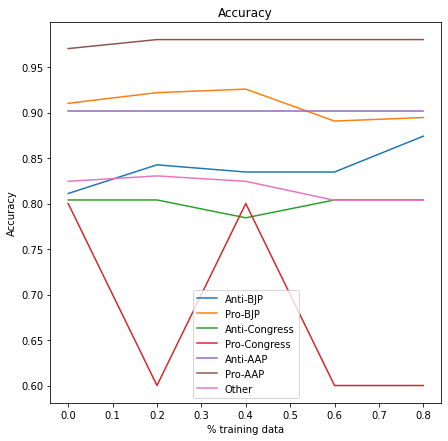

In [162]:
plot_analysis_india_stance_acc(anti_bjp_dfs)

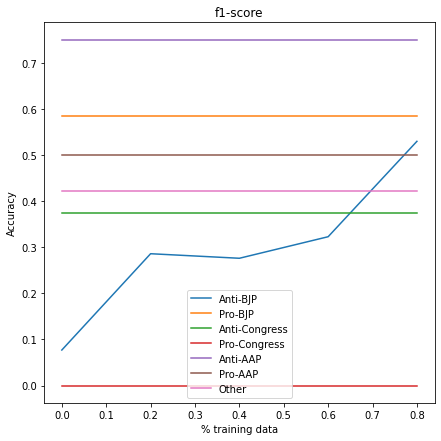

In [163]:
plot_analysis_india_stance_f1(anti_bjp_dfs)


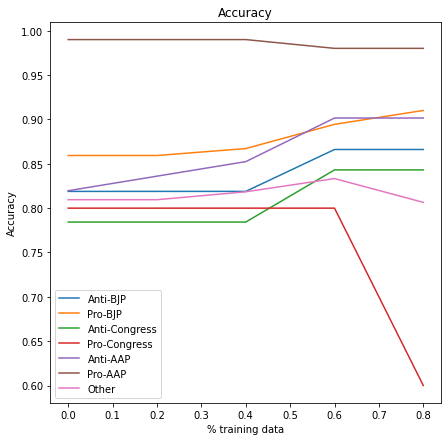

In [164]:
plot_analysis_india_stance_acc(pro_bjp_dfs)

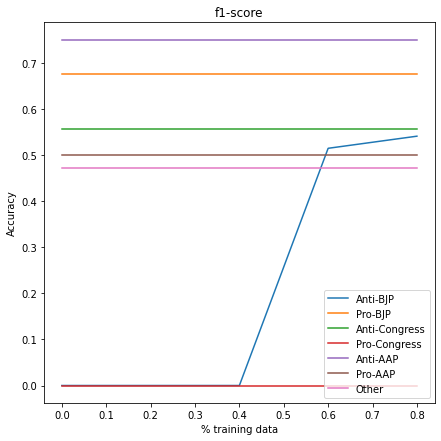

In [165]:
plot_analysis_india_stance_f1(pro_bjp_dfs)

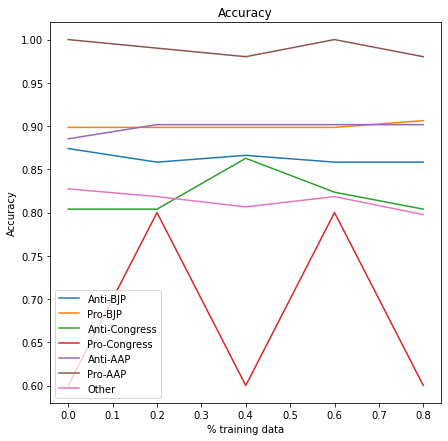

In [166]:
plot_analysis_india_stance_acc(anti_cong_dfs)

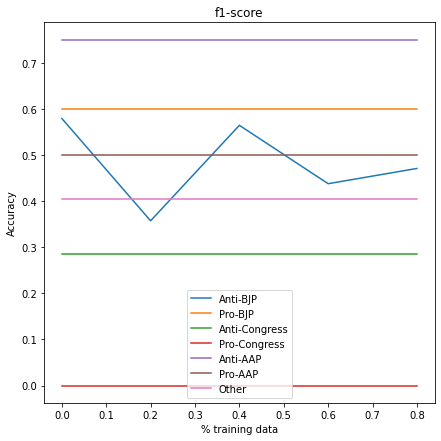

In [167]:
plot_analysis_india_stance_f1(anti_cong_dfs)

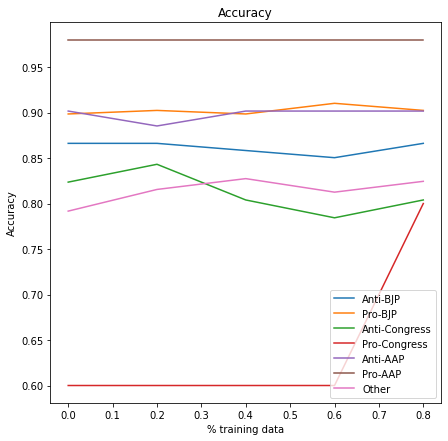

In [168]:
plot_analysis_india_stance_acc(pro_cong_dfs)

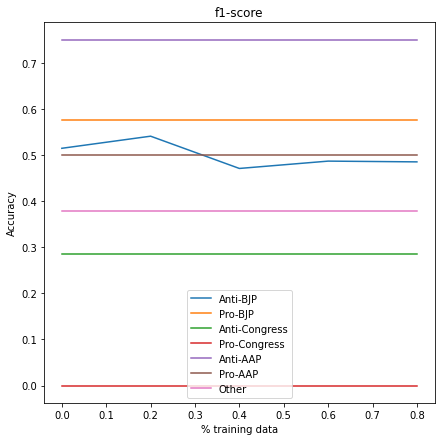

In [169]:
plot_analysis_india_stance_f1(pro_cong_dfs)

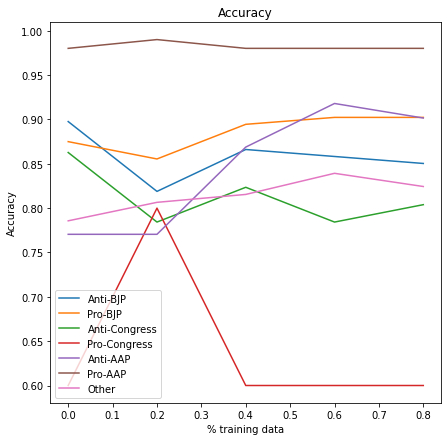

In [170]:
plot_analysis_india_stance_acc(anti_aap_dfs)

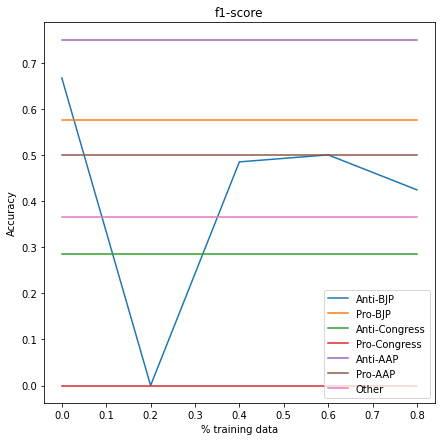

In [171]:
plot_analysis_india_stance_f1(anti_aap_dfs)

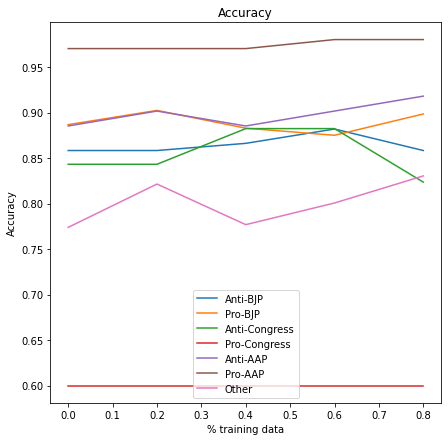

In [172]:
plot_analysis_india_stance_acc(pro_aap_dfs)

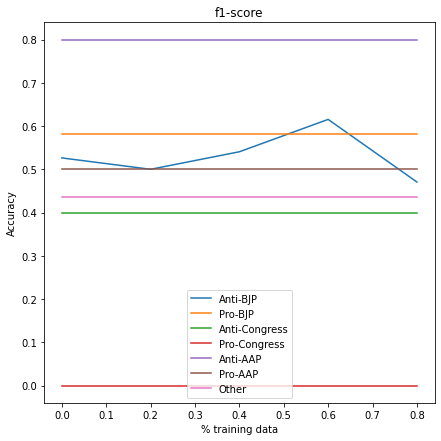

In [173]:
plot_analysis_india_stance_f1(pro_aap_dfs)

----